In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Filtering_pyComBat.csv', index_col=0)
df.head()

,A2M,AACS,AAK1,AASDHPPT,ABAT,ABCA1,ABCC1,ABCC10,ABCC4,ABCC5,...,ZRSR2,ZSCAN12,ZSCAN16,ZSCAN18,ZWILCH,ZXDB,ZXDC,ZZZ3,batch,group
GSM139377,99.152034,50.095113,209.587472,162.544744,52.459726,147.336736,105.638862,88.340647,86.599407,85.985578,...,120.135860,64.976337,41.031369,116.682689,78.829395,87.683601,169.912066,84.665391,1.0,1.0
GSM139378,98.666024,43.246793,210.472307,147.232029,46.072905,141.641894,93.775965,63.219097,114.391719,108.472303,...,99.546704,73.974618,42.909032,112.542541,67.195099,82.351583,145.467548,95.691556,1.0,1.0
GSM139379,120.331133,34.453846,241.713427,103.382908,88.077294,162.708893,84.677501,81.903234,94.441715,103.086678,...,115.717846,77.065084,42.786549,100.608487,64.008956,75.926995,148.299822,89.562210,1.0,1.0
GSM139380,82.197843,46.049648,205.982617,54.269872,135.553444,132.901535,96.860455,113.051162,102.305271,125.035792,...,91.157764,62.792377,42.481296,107.368978,65.236812,105.679289,183.129678,83.889369,1.0,1.0
GSM139381,66.492239,65.609343,263.837017,98.359611,148.375663,157.703631,92.576492,93.367013,122.592700,156.220879,...,101.883430,71.798672,31.438388,115.176686,55.446641,85.894759,157.504720,91.352250,1.0,1.0


In [64]:
X = df.iloc[:,0:-2]
y = df.iloc[:,-1]

## Cleansing data

In [65]:
pd.isnull(df).any()

A2M         False
AACS        False
AAK1        False
AASDHPPT    False
ABAT        False
            ...  
ZXDB        False
ZXDC        False
ZZZ3        False
batch       False
group       False
Length: 4181, dtype: bool

In [66]:
df.isnull().sum()

A2M         0
AACS        0
AAK1        0
AASDHPPT    0
ABAT        0
           ..
ZXDB        0
ZXDC        0
ZZZ3        0
batch       0
group       0
Length: 4181, dtype: int64

In [67]:
#no missing data :D ^

## Removing outliers

In [68]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
numeric_cols

['A2M',
 'AACS',
 'AAK1',
 'AASDHPPT',
 'ABAT',
 'ABCA1',
 'ABCC1',
 'ABCC10',
 'ABCC4',
 'ABCC5',
 'ABCD3',
 'ABCE1',
 'ABCF2',
 'ABCG1',
 'ABHD10',
 'ABHD2',
 'ABHD6',
 'ABI1',
 'ABI2',
 'ABL2',
 'ABLIM1',
 'ABR',
 'ACAA1',
 'ACACB',
 'ACADM',
 'ACAP2',
 'ACAT1',
 'ACBD3',
 'ACLY',
 'ACO1',
 'ACOT9',
 'ACOX1',
 'ACP1',
 'ACP6',
 'ACSL1',
 'ACSL3',
 'ACTA2',
 'ACTB',
 'ACTG1',
 'ACTL6A',
 'ACTN1',
 'ACTR10',
 'ACTR2',
 'ACTR3',
 'ACTR5',
 'ACTR6',
 'ACTR8',
 'ACVR1B',
 'ACVR2A',
 'ACVR2B',
 'ADAM10',
 'ADAM12',
 'ADAM17',
 'ADAM22',
 'ADAM9',
 'ADAR',
 'ADARB1',
 'ADCK2',
 'ADD1',
 'ADD3',
 'ADH5',
 'ADI1',
 'ADM',
 'ADNP',
 'ADNP2',
 'ADO',
 'ADPGK',
 'ADSL',
 'AFF1',
 'AFF4',
 'AFG3L2',
 'AFTPH',
 'AGA',
 'AGAP1',
 'AGFG1',
 'AGFG2',
 'AGGF1',
 'AGK',
 'AGL',
 'AGPAT1',
 'AGPAT3',
 'AGPS',
 'AGRN',
 'AGTPBP1',
 'AHCTF1',
 'AHCY',
 'AHCYL1',
 'AHCYL2',
 'AHI1',
 'AHNAK',
 'AHSA1',
 'AIDA',
 'AIMP1',
 'AIMP2',
 'AK2',
 'AK4',
 'AKAP1',
 'AKAP10',
 'AKAP11',
 'AKAP12',
 'AKAP13',
 'AKA

In [69]:
len(numeric_cols)

4181

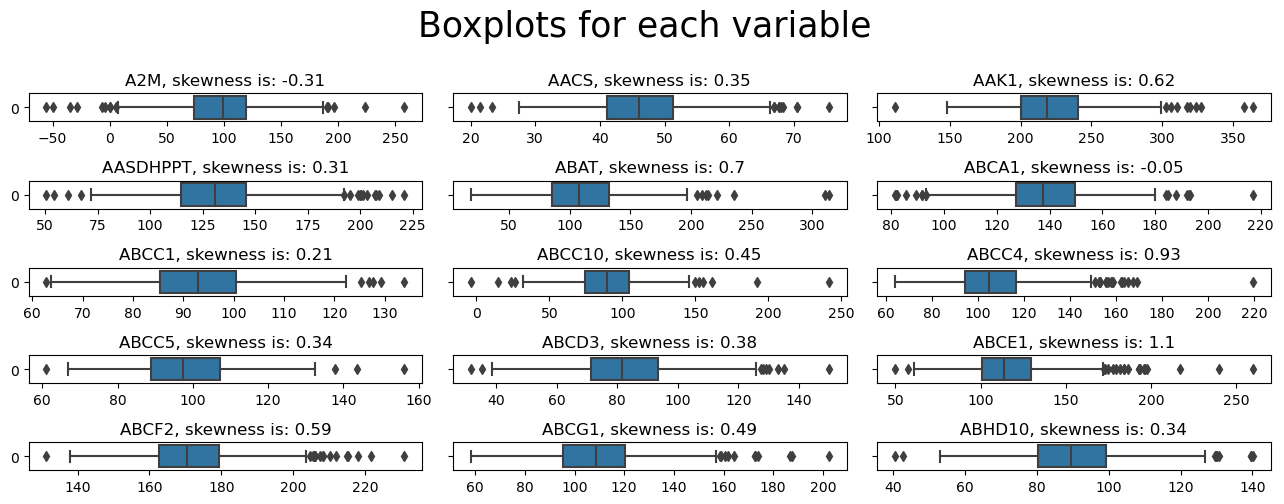

In [70]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list= numeric_cols[:15], rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()
# a limitation to be revisited

In [71]:
def replace_outliers(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        whisker_width = 1.5
        lower_whisker = Q1 - (whisker_width * IQR)
        upper_whisker = Q3 + (whisker_width * IQR)
        median_value = df[col].median()
        print("\x1b[1;30;47mAnalyzing column:", col,"\x1b[m")
        print("lower_whisker", lower_whisker)
        print("upper_whisker", upper_whisker)
        print("median", median_value)
        print("Looking for outliers lower than lower_whisker:")
        print("\x1b[1;30;47m", df[df[col]<lower_whisker][col],"\x1b[m")
        print("Looking for outliers higher than upper_whisker:")
        print("\x1b[1;30;47m", df[df[col]>upper_whisker][col],"\x1b[m")
        # Replacing with the median
        df[col]=np.where(df[col]>upper_whisker, median_value, np.where(df[col]<lower_whisker, median_value, df[col]))
        print("---------------")
        

In [72]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        #print(outlier_list)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)    
    #print(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [73]:
replace_outliers(df, numeric_cols)


Analyzing column: A2M 
lower_whisker 6.084962263484016
upper_whisker 187.94689211508452
median 99.16483985296207
Looking for outliers lower than lower_whisker:
 GSM139393    -34.922242
GSM249786      5.268228
GSM249850    -28.323686
GSM249864      0.411326
GSM249995     -0.082965
GSM249999     -4.424406
GSM1634931   -49.273617
GSM1634933    -6.415317
GSM1634935   -55.332853
Name: A2M, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139397    190.410108
GSM249875    258.231327
GSM462645    196.540859
GSM947290    190.905883
GSM947298    223.408622
Name: A2M, dtype: float64 
---------------
Analyzing column: AACS 
lower_whisker 25.764596196481573
upper_whisker 66.54320193551014
median 46.0721956289768
Looking for outliers lower than lower_whisker:
 GSM249950     23.372270
GSM1634925    20.005710
GSM1634928    21.387251
Name: AACS, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249745     66.952698
GSM249811     67.947665
GSM249847     66.976068
GS

 GSM249739     46.133490
GSM249820     49.273675
GSM249960     42.242585
GSM1634926    24.878591
GSM1634927    39.464957
GSM1634933    36.216000
Name: ABLIM1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461359    240.744018
GSM461379    230.016027
GSM947273    230.377224
GSM947275    241.987511
Name: ABLIM1, dtype: float64 
---------------
Analyzing column: ABR 
lower_whisker 41.46910168508153
upper_whisker 98.35507206120249
median 70.04645836581375
Looking for outliers lower than lower_whisker:
 GSM1634960    41.19053
Name: ABR, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249790     106.460485
GSM249901      98.613854
GSM249970     108.057126
GSM249995     104.320007
GSM461399      98.795083
GSM1634926    102.730836
Name: ABR, dtype: float64 
---------------
Analyzing column: ACAA1 
lower_whisker 44.69621348898075
upper_whisker 155.7523983024171
median 99.45566177306989
Looking for outliers lower than lower_whisker:
 GSM249812    38.1467

Analyzing column: ACTN1 
lower_whisker 123.20355864544108
upper_whisker 309.92191055158077
median 216.93843765807586
Looking for outliers lower than lower_whisker:
 GSM249864     107.697642
GSM249995     111.809929
GSM1634925     58.636031
GSM1634928     98.345674
GSM1634936     98.798923
Name: ACTN1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249797    328.585157
GSM249909    311.675609
GSM461398    310.493560
Name: ACTN1, dtype: float64 
---------------
Analyzing column: ACTR10 
lower_whisker 14.171139031484913
upper_whisker 151.57801303205497
median 84.42231088410401
Looking for outliers lower than lower_whisker:
 GSM249861    -29.310176
GSM249968    -15.888627
GSM1701038   -12.631329
Name: ACTR10, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139472     155.943953
GSM139476     155.079561
GSM249754     158.521891
GSM249824     154.440970
GSM249841     160.472060
GSM461392     178.021284
GSM947284     176.497914
GSM947285     196.307290

Analyzing column: ADD3 
lower_whisker 67.40854391572412
upper_whisker 480.1752234916274
median 267.38874656336424
Looking for outliers lower than lower_whisker:
 GSM139384    61.734354
GSM139403    29.666877
GSM249797    41.293087
GSM249973    57.479592
Name: ADD3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139417    480.404551
GSM249732    484.461037
GSM249803    579.493233
GSM249804    480.992590
GSM249974    495.059578
GSM249995    486.821868
GSM947303    556.679497
Name: ADD3, dtype: float64 
---------------
Analyzing column: ADH5 
lower_whisker 12.995616936292649
upper_whisker 303.9516504121258
median 159.64655885861578
Looking for outliers lower than lower_whisker:
 GSM249796    12.666652
GSM249968     0.636592
Name: ADH5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249892     314.369005
GSM1634934    313.388858
Name: ADH5, dtype: float64 
---------------
Analyzing column: ADI1 
lower_whisker 65.96482580697926
upper_whisker 248.740

 GSM249968    99.01128
Name: AGGF1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249875    208.321291
Name: AGGF1, dtype: float64 
---------------
Analyzing column: AGK 
lower_whisker 80.21853219891659
upper_whisker 130.130576298388
median 105.11482201972677
Looking for outliers lower than lower_whisker:
 GSM1634936    77.202891
GSM1701038    73.303281
Name: AGK, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139399     142.984430
GSM249788     133.188222
GSM461356     138.819068
GSM947306     130.430175
GSM947308     136.335262
GSM1634926    133.730437
Name: AGK, dtype: float64 
---------------
Analyzing column: AGL 
lower_whisker 18.07114733911292
upper_whisker 107.4755193324118
median 62.29604800816212
Looking for outliers lower than lower_whisker:
 GSM139477    8.148361
Name: AGL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139389    117.029286
GSM249854    131.501600
GSM461392    120.471717
Name: AGL, dtype: float

 GSM249892    58.650447
Name: AK4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249967    253.823876
GSM249990    261.730078
GSM461390    251.777997
GSM947309    259.916074
Name: AK4, dtype: float64 
---------------
Analyzing column: AKAP1 
lower_whisker 102.13554087534249
upper_whisker 209.0125401751086
median 155.7912862205735
Looking for outliers lower than lower_whisker:
 GSM249773     89.573076
GSM249855    101.024309
Name: AKAP1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139423     211.908504
GSM139427     211.672456
GSM139431     211.340452
GSM139433     223.619390
GSM249790     220.544913
GSM249847     216.939404
GSM249901     234.770117
GSM249959     210.274451
GSM1634935    212.820485
Name: AKAP1, dtype: float64 
---------------
Analyzing column: AKAP10 
lower_whisker 92.3392387610226
upper_whisker 154.14161813683705
median 122.3234967400424
Looking for outliers lower than lower_whisker:
 GSM139416     86.779178
GSM139468     8

 GSM139380    -18.690777
GSM249881    -16.020754
GSM1634993   -29.604420
Name: ALCAM, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249758    330.528812
GSM249875    352.259206
GSM461398    366.326098
GSM947298    423.805412
Name: ALCAM, dtype: float64 
---------------
Analyzing column: ALDH18A1 
lower_whisker 59.2881522862506
upper_whisker 137.53713722560448
median 98.37882299973887
Looking for outliers lower than lower_whisker:
 GSM139472     48.875532
GSM249754     56.875405
GSM249822     48.360439
GSM249884     52.833317
GSM249916     44.846183
GSM249959     52.138129
GSM1634925    45.174277
GSM1634928    42.643978
GSM1634936    45.827622
Name: ALDH18A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139384     141.484758
GSM139409     143.825149
GSM249790     142.160793
GSM249880     142.728797
GSM249955     143.620841
GSM249975     145.307649
GSM461395     139.790053
GSM461398     139.848256
GSM947311     140.345488
GSM947312     146.703

---------------
Analyzing column: ANAPC13 
lower_whisker 30.267038442116416
upper_whisker 175.92649527245538
median 104.41452098368615
Looking for outliers lower than lower_whisker:
 GSM139401     28.672325
GSM249756     28.218014
GSM249838     28.115968
GSM947293     21.603748
GSM1634925    30.242359
GSM1634928    -9.729183
GSM1634936    11.700534
GSM1701038     6.376277
Name: ANAPC13, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139396    184.039074
GSM139399    178.846347
GSM249861    191.865870
GSM249864    194.182814
GSM249892    176.271434
GSM249933    176.490657
GSM249942    210.022228
GSM461395    190.525783
GSM462644    191.286411
GSM462645    210.853745
GSM462646    178.351388
GSM947285    184.484832
GSM947286    185.024062
Name: ANAPC13, dtype: float64 
---------------
Analyzing column: ANAPC5 
lower_whisker 153.5932045445413
upper_whisker 381.64947591827195
median 265.02066984270095
Looking for outliers lower than lower_whisker:
 GSM249793    141.8950

 GSM249804    31.281377
Name: ANKS1A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139380      90.779666
GSM139400      84.059293
GSM249767      84.463690
GSM249785      83.441277
GSM249903      84.923114
GSM249916      83.865339
GSM249937      94.358154
GSM249976      88.058576
GSM249995     107.040558
GSM461361      83.590218
GSM461400      87.779614
GSM947272      86.749449
GSM947289      89.165171
GSM1634926     86.797884
Name: ANKS1A, dtype: float64 
---------------
Analyzing column: ANP32A 
lower_whisker 101.13147096102192
upper_whisker 226.55445997200957
median 164.39355544349587
Looking for outliers lower than lower_whisker:
 GSM139382     94.142625
GSM1634925    66.597983
Name: ANP32A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139412     243.311224
GSM249741     230.590561
GSM249776     237.186985
GSM249819     236.658425
GSM249861     239.268012
GSM249916     232.208495
GSM461363     236.719283
GSM461393     238.819738
GSM94729

---------------
Analyzing column: APC 
lower_whisker 109.84051666248162
upper_whisker 223.7140854782989
median 167.3689320846991
Looking for outliers lower than lower_whisker:
 GSM139472     108.884546
GSM1634976    108.677890
Name: APC, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139477    224.270748
GSM139478    228.360729
GSM249785    228.906202
GSM249913    236.395844
GSM249967    251.610932
GSM947293    246.828517
Name: APC, dtype: float64 
---------------
Analyzing column: APEX1 
lower_whisker 20.419792756830972
upper_whisker 131.70335894540762
median 75.55937239665275
Looking for outliers lower than lower_whisker:
 GSM139415     18.053939
GSM139432      9.122943
GSM249967      4.354664
GSM249996     15.648006
GSM1634925     2.222346
GSM1634928     6.879537
GSM1701038     8.953226
Name: APEX1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139393    147.973810
GSM139396    135.688016
GSM249735    135.344294
GSM249830    155.368435
GSM2

Analyzing column: ARFGEF1 
lower_whisker 100.40086246918301
upper_whisker 186.44071849454528
median 142.2119380825635
Looking for outliers lower than lower_whisker:
 Series([], Name: ARFGEF1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249841    190.072887
GSM249954    189.451940
GSM249996    192.150690
GSM461357    201.855224
Name: ARFGEF1, dtype: float64 
---------------
Analyzing column: ARFGEF2 
lower_whisker 115.24100560838136
upper_whisker 210.41868870733063
median 161.78188722183637
Looking for outliers lower than lower_whisker:
 GSM249928     105.346925
GSM1634925    110.881526
GSM1634928    106.197077
GSM1634929    113.731741
GSM1634936    111.771945
GSM1701038     95.817950
Name: ARFGEF2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249790    238.546752
GSM249856    238.855892
GSM249976    226.062057
Name: ARFGEF2, dtype: float64 
---------------
Analyzing column: ARFIP1 
lower_whisker 39.319314899009115
upper_whisker 150.423838

---------------
Analyzing column: ARIH2 
lower_whisker 143.0753453297956
upper_whisker 214.819918337407
median 178.07640235048305
Looking for outliers lower than lower_whisker:
 GSM139378     138.345825
GSM139425     137.556938
GSM249901     131.394370
GSM249981     140.500669
GSM1634928    132.788880
GSM1634936    129.784589
Name: ARIH2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249861    215.599083
GSM249922    235.634221
GSM947293    232.166280
GSM947313    221.384804
Name: ARIH2, dtype: float64 
---------------
Analyzing column: ARL1 
lower_whisker 98.25011446382912
upper_whisker 264.3397040505076
median 180.09196130909936
Looking for outliers lower than lower_whisker:
 GSM139444     91.014092
GSM249949     88.349199
GSM249968     26.619715
GSM249973     88.597962
GSM250000     87.634681
GSM1634925     2.764427
GSM1634928    62.994752
GSM1634936    46.768222
GSM1701038    85.700270
Name: ARL1, dtype: float64 
Looking for outliers higher than upper_whisker:

---------------
Analyzing column: ARPC5 
lower_whisker 61.549427460240025
upper_whisker 236.8505134040698
median 148.20348672724617
Looking for outliers lower than lower_whisker:
 GSM139380     50.969611
GSM249905     59.402720
GSM249972     60.002935
GSM1634925    12.350049
GSM1634928    19.744070
Name: ARPC5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249775    252.493605
GSM249815    256.128359
GSM249981    256.119172
GSM249982    241.197412
GSM250000    243.078291
GSM462647    245.623642
Name: ARPC5, dtype: float64 
---------------
Analyzing column: ARPC5L 
lower_whisker 80.5166162500989
upper_whisker 244.93148302666467
median 164.29789395211571
Looking for outliers lower than lower_whisker:
 GSM139454     73.006016
GSM1634925    71.636182
GSM1634928    37.785585
GSM1634936    72.731667
Name: ARPC5L, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249789    265.316305
GSM249793    269.466737
GSM249886    247.709069
GSM249938    250.02114

 GSM139405    -4.063703
GSM249881     5.651941
GSM249991    20.344710
GSM249999    13.373329
GSM462643     9.931578
GSM462644    19.180419
GSM462645    10.530557
GSM462646    10.761117
GSM462647    18.236374
GSM462648    22.520597
GSM462649    24.145067
GSM462650    23.975379
Name: ATF4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139414    181.711015
GSM249778    190.703753
GSM249874    184.471919
GSM249875    180.333045
GSM249957    208.759161
GSM461352    182.773355
GSM461355    189.774366
GSM947291    215.504531
GSM947297    275.771850
Name: ATF4, dtype: float64 
---------------
Analyzing column: ATF6 
lower_whisker 110.9466058551738
upper_whisker 181.78909854962325
median 147.15359010740593
Looking for outliers lower than lower_whisker:
 GSM139454     106.090403
GSM249765     105.292354
GSM249804      98.409515
GSM249901      97.732643
GSM1634934    110.271240
Name: ATF6, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139427    189.3900

 GSM249769     76.576795
GSM249913     75.044249
GSM249959     51.662064
GSM249970     81.967938
GSM249991     69.437999
GSM1634993    80.531502
GSM1701038    55.271870
Name: ATP2B1, dtype: float64 
Looking for outliers higher than upper_whisker:
 Series([], Name: ATP2B1, dtype: float64) 
---------------
Analyzing column: ATP2B4 
lower_whisker 101.15397692752711
upper_whisker 190.89655399465258
median 146.6598614944028
Looking for outliers lower than lower_whisker:
 GSM249736      98.617301
GSM249892     100.126424
GSM249901      89.120239
GSM249922      88.760959
GSM461399      97.743084
GSM1634925     83.942029
GSM1634931     62.234653
GSM1634935     84.365457
Name: ATP2B4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139449    197.240397
GSM249818    196.207211
GSM461397    205.074218
GSM947293    193.724087
Name: ATP2B4, dtype: float64 
---------------
Analyzing column: ATP2C1 
lower_whisker 88.48115234878352
upper_whisker 273.0297938838735
median 178.2806743

 GSM249737    137.853521
GSM249901    137.342695
Name: ATXN3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249755     224.418976
GSM249953     224.516091
GSM947306     223.556520
GSM1634925    229.073513
Name: ATXN3, dtype: float64 
---------------
Analyzing column: ATXN7 
lower_whisker 81.87904312956933
upper_whisker 148.2131419253373
median 114.93028061377905
Looking for outliers lower than lower_whisker:
 GSM249790    76.195706
GSM249959    73.499051
GSM249972    78.663973
Name: ATXN7, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139379     148.726949
GSM139382     165.410523
GSM249774     157.887414
GSM249852     161.960796
GSM249936     150.829446
GSM947293     160.092930
GSM1634985    149.102638
GSM1701035    154.625444
Name: ATXN7, dtype: float64 
---------------
Analyzing column: ATXN7L3B 
lower_whisker 38.20004147162724
upper_whisker 156.44199974209107
median 96.95676983320186
Looking for outliers lower than lower_whisker:
 Series(

---------------
Analyzing column: BACH1 
lower_whisker 52.09100476706354
upper_whisker 118.93335154120908
median 85.06109555070724
Looking for outliers lower than lower_whisker:
 GSM249744     43.644633
GSM249765     41.776823
GSM249930     48.502658
GSM1634976    50.983191
Name: BACH1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249823     120.869730
GSM947281     127.914223
GSM947293     135.514051
GSM1634933    128.816728
GSM1634936    134.153937
Name: BACH1, dtype: float64 
---------------
Analyzing column: BAG1 
lower_whisker 59.24506516427941
upper_whisker 181.55823700060222
median 119.53118273493203
Looking for outliers lower than lower_whisker:
 GSM1634933    58.015811
Name: BAG1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249745     182.442881
GSM249783     207.011696
GSM249791     187.542931
GSM461398     299.786378
GSM947300     195.229880
GSM947303     188.165231
GSM1701053    181.574678
Name: BAG1, dtype: float64 
----------

Analyzing column: BCAP29 
lower_whisker 114.75046153455528
upper_whisker 262.09759497160746
median 189.06348397295835
Looking for outliers lower than lower_whisker:
 GSM1634925    111.962626
Name: BCAP29, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249754     263.501132
GSM249905     276.856479
GSM249965     263.571355
GSM249967     295.171180
GSM947303     278.079414
GSM1634926    271.571692
GSM1634927    264.815456
Name: BCAP29, dtype: float64 
---------------
Analyzing column: BCAS2 
lower_whisker 20.89022378035242
upper_whisker 133.23616671488958
median 77.28249534466991
Looking for outliers lower than lower_whisker:
 GSM139459    18.624759
GSM249780    18.081382
GSM249973     8.936779
GSM249998    -8.816772
GSM947301    20.701577
Name: BCAS2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249777     176.390161
GSM249967     136.740768
GSM461392     152.257774
GSM461394     154.934200
GSM947300     148.095550
GSM947303     135.064884
GSM

 Series([], Name: BGN, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139424    327.605977
GSM139458    315.422061
GSM139459    306.799678
GSM249868    418.956453
GSM249909    317.409808
GSM249918    328.632858
GSM461400    312.709472
GSM947290    567.165232
Name: BGN, dtype: float64 
---------------
Analyzing column: BHLHE41 
lower_whisker -43.42398326126825
upper_whisker 412.99921303730105
median 191.60450655252663
Looking for outliers lower than lower_whisker:
 GSM139401     -51.607528
GSM249786     -46.959284
GSM249789     -71.320805
GSM249839     -70.742844
GSM249850    -101.799880
GSM249856     -54.762014
GSM249868    -110.871269
GSM249892     -44.386540
GSM1634929    -59.169717
GSM1634931    -88.251680
GSM1634935    -72.178757
Name: BHLHE41, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249794    428.419684
GSM249965    441.091854
GSM947302    535.327692
GSM947308    496.862910
Name: BHLHE41, dtype: float64 
---------------
Analyzing c

 GSM250001     82.702831
GSM1634929    73.999211
Name: BRCC3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139414     189.552952
GSM139448     214.596549
GSM139475     198.320699
GSM249749     189.134517
GSM249751     203.920733
GSM249791     189.490514
GSM249794     191.046194
GSM249865     198.231132
GSM249884     188.271524
GSM249905     201.849303
GSM249964     192.377266
GSM249976     185.008372
GSM461348     233.397045
GSM461373     183.863956
GSM461376     200.790669
GSM461397     196.888629
GSM461399     185.194393
GSM947298     204.296184
GSM1634992    188.031030
Name: BRCC3, dtype: float64 
---------------
Analyzing column: BRD1 
lower_whisker 57.74812515843571
upper_whisker 108.84756748221646
median 82.79418310781435
Looking for outliers lower than lower_whisker:
 GSM139387     55.934743
GSM139396     53.730186
GSM139475     51.754259
GSM249901     46.286146
GSM249935     44.241768
GSM249967     42.363804
GSM1634925    52.088929
GSM1634928    38.633871

---------------
Analyzing column: BTN2A2 
lower_whisker 57.32806798120178
upper_whisker 109.72057484617201
median 82.9393136704578
Looking for outliers lower than lower_whisker:
 GSM139443     56.731341
GSM1634976    51.559922
Name: BTN2A2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139409    110.472390
GSM139477    111.414697
GSM249854    117.725831
GSM947293    119.997647
Name: BTN2A2, dtype: float64 
---------------
Analyzing column: BTN3A1 
lower_whisker 56.31871110103097
upper_whisker 122.15414619660746
median 88.63508746825761
Looking for outliers lower than lower_whisker:
 GSM139418    53.764149
GSM249754    47.571366
GSM249922    54.334994
GSM249969    55.746628
Name: BTN3A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139413    122.566915
GSM249758    122.305223
GSM249774    128.604848
GSM249788    122.931192
GSM249889    130.466389
GSM249891    129.001635
GSM249904    129.456042
GSM249926    132.293353
GSM249963    122.172103
G

---------------
Analyzing column: C1orf21 
lower_whisker 77.64527223341085
upper_whisker 171.26109023069827
median 124.70387090487384
Looking for outliers lower than lower_whisker:
 GSM139419    77.147956
GSM139458    77.364119
GSM139459    69.956709
Name: C1orf21, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139477     180.238361
GSM139478     179.451023
GSM249768     180.927527
GSM249775     189.632279
GSM249839     174.546395
GSM249864     186.660445
GSM249901     180.367146
GSM249959     186.218991
GSM249960     181.184233
GSM249987     176.019699
GSM947272     171.739811
GSM1634959    171.659147
Name: C1orf21, dtype: float64 
---------------
Analyzing column: C1orf50 
lower_whisker 60.404175993359225
upper_whisker 110.94155529169592
median 85.20071943371599
Looking for outliers lower than lower_whisker:
 GSM461376     53.461891
GSM1634928    57.116556
GSM1634936    52.925682
GSM1701038    48.137562
Name: C1orf50, dtype: float64 
Looking for outliers higher t

---------------
Analyzing column: CALM1 
lower_whisker 162.21891523265623
upper_whisker 756.5729581049293
median 454.199230718845
Looking for outliers lower than lower_whisker:
 GSM249794     126.018963
GSM1634925     14.110298
Name: CALM1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139428    867.996970
GSM139438    765.648357
GSM249781    805.594471
GSM249897    757.657784
GSM249922    779.020791
GSM249991    764.440176
GSM461390    797.485123
GSM461394    796.469504
GSM461395    872.853594
GSM947297    876.220033
GSM947299    954.743468
Name: CALM1, dtype: float64 
---------------
Analyzing column: CALM2 
lower_whisker 109.28454627423665
upper_whisker 488.2191128659021
median 294.3658816522275
Looking for outliers lower than lower_whisker:
 GSM249783     92.858806
GSM249976     70.332250
GSM461386    102.031939
GSM461387     96.273521
GSM461388    101.704718
GSM462645    108.685851
GSM947293    -33.264147
GSM947307     72.856963
GSM947311    104.628938
Name: 

 GSM139470     19.591252
GSM1634976    -5.897896
Name: CAPZA2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249728     250.432196
GSM249897     267.240439
GSM461379     248.897516
GSM947303     291.132336
GSM1634931    245.364407
Name: CAPZA2, dtype: float64 
---------------
Analyzing column: CAPZB 
lower_whisker 126.57807841054615
upper_whisker 283.5915630321746
median 205.58814790854584
Looking for outliers lower than lower_whisker:
 GSM249902     118.722038
GSM249918     112.235493
GSM249976     111.184369
GSM1634925    113.214553
Name: CAPZB, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461376    288.397816
GSM947313    287.613772
Name: CAPZB, dtype: float64 
---------------
Analyzing column: CARD8 
lower_whisker 78.90167037957988
upper_whisker 133.8827448066156
median 106.64027424240267
Looking for outliers lower than lower_whisker:
 GSM249908     69.587188
GSM249983     72.661959
GSM1701038    77.481725
Name: CARD8, dtype: float64 
Lo

---------------
Analyzing column: CBL 
lower_whisker 86.12608650401481
upper_whisker 186.71245441498715
median 136.77830430861331
Looking for outliers lower than lower_whisker:
 GSM139380    49.835731
GSM139422    63.632410
Name: CBL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249749    195.511585
GSM249775    194.838329
Name: CBL, dtype: float64 
---------------
Analyzing column: CBLB 
lower_whisker 64.00250704113651
upper_whisker 134.46198725903642
median 99.77525875386104
Looking for outliers lower than lower_whisker:
 GSM249799     63.514939
GSM1634925    61.910941
GSM1634935    40.158493
Name: CBLB, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249728    144.739575
GSM249844    137.652906
GSM249954    145.835655
GSM249984    136.962319
GSM461359    136.038371
GSM461376    166.899220
GSM947301    137.149226
Name: CBLB, dtype: float64 
---------------
Analyzing column: CBR4 
lower_whisker 58.29579698484965
upper_whisker 144.069192685593

---------------
Analyzing column: CCDC91 
lower_whisker 45.00270470384919
upper_whisker 97.78244863609405
median 71.01177003870168
Looking for outliers lower than lower_whisker:
 GSM249743     42.961116
GSM249765     40.214365
GSM249874     40.902149
GSM1634936    33.141997
GSM1701029    40.292756
Name: CCDC91, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139425    112.568094
GSM139445    125.091562
GSM249736    116.687311
GSM249759    105.534138
GSM249920     99.352137
GSM461392    100.256222
GSM461397    102.129480
GSM461400     99.114962
GSM947284     99.773907
Name: CCDC91, dtype: float64 
---------------
Analyzing column: CCDC93 
lower_whisker 98.07936260997405
upper_whisker 157.0063753155918
median 127.54442271154939
Looking for outliers lower than lower_whisker:
 GSM1634925    87.718258
GSM1634928    76.850473
GSM1634929    96.390226
GSM1634936    96.774718
Name: CCDC93, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139392     159.763

Analyzing column: CD164 
lower_whisker 53.72619832042673
upper_whisker 372.0664751426551
median 208.32814033712333
Looking for outliers lower than lower_whisker:
 GSM139461     44.289553
GSM1634928    39.218227
Name: CD164, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139401    394.818143
GSM249736    385.837892
GSM249901    438.853968
GSM249937    434.925449
GSM461394    381.573776
GSM947286    377.946366
Name: CD164, dtype: float64 
---------------
Analyzing column: CD200 
lower_whisker 27.7963493226805
upper_whisker 157.03705082669876
median 93.86766786729615
Looking for outliers lower than lower_whisker:
 Series([], Name: CD200, dtype: float64) 
Looking for outliers higher than upper_whisker:
 Series([], Name: CD200, dtype: float64) 
---------------
Analyzing column: CD2AP 
lower_whisker 41.210434485541235
upper_whisker 159.12509805977876
median 99.70993749857884
Looking for outliers lower than lower_whisker:
 GSM249799     15.243440
GSM1701038    20.478286
N

---------------
Analyzing column: CDC25B 
lower_whisker 34.167016341906624
upper_whisker 85.81146140437556
median 59.942626318310104
Looking for outliers lower than lower_whisker:
 Series([], Name: CDC25B, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139381    92.371329
GSM139382    90.575207
GSM139458    89.081975
GSM250000    88.734007
GSM461391    89.680557
GSM461393    95.464323
GSM947306    90.996182
Name: CDC25B, dtype: float64 
---------------
Analyzing column: CDC27 
lower_whisker 136.15833955595747
upper_whisker 251.89950262226898
median 192.9912263255939
Looking for outliers lower than lower_whisker:
 GSM139447    128.807739
GSM249786    135.550799
GSM249861    116.620242
GSM249924    135.527090
Name: CDC27, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249747     255.082040
GSM249782     269.186562
GSM249852     261.344991
GSM1634925    259.608439
GSM1634928    262.061717
GSM1634936    260.266950
Name: CDC27, dtype: float64 
----

---------------
Analyzing column: CDK5RAP1 
lower_whisker 32.55559935532815
upper_whisker 61.454336421977324
median 46.90986143515369
Looking for outliers lower than lower_whisker:
 GSM139404     32.022734
GSM1634925    28.267947
GSM1634928    29.923240
GSM1634936    32.235722
Name: CDK5RAP1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249778     67.684313
GSM249929     64.584897
GSM249930     62.058988
GSM250001     62.571906
GSM461399     61.492857
GSM947291     63.073219
GSM947305     61.774473
GSM947306     62.660617
GSM1634976    62.673569
GSM1701031    61.550518
Name: CDK5RAP1, dtype: float64 
---------------
Analyzing column: CDK5RAP2 
lower_whisker 59.43534778056459
upper_whisker 170.7629908701354
median 115.60313557548416
Looking for outliers lower than lower_whisker:
 GSM139454    46.803795
GSM249791    59.336548
Name: CDK5RAP2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139468     181.535228
GSM249732     178.346002
GSM249755 

 GSM1634934    85.581571
Name: CEP41, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249715     205.863043
GSM249799     195.880104
GSM249980     192.824909
GSM947303     194.296350
GSM947308     203.736982
GSM1701038    200.948328
Name: CEP41, dtype: float64 
---------------
Analyzing column: CEP57 
lower_whisker 164.84701640025963
upper_whisker 303.42573169015253
median 234.34577782068033
Looking for outliers lower than lower_whisker:
 GSM249929     146.622863
GSM249939     163.302037
GSM249985     155.534953
GSM1634925    154.436123
GSM1634928    161.008855
GSM1634976    150.843380
GSM1701038    160.689618
Name: CEP57, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139453    312.653328
GSM139467    322.964138
GSM139476    322.713408
GSM139478    314.948012
GSM249833    316.086709
GSM249850    313.318830
GSM249889    315.125647
GSM249993    303.554642
GSM461396    311.537602
GSM947303    314.113134
Name: CEP57, dtype: float64 
---------------

 GSM249752     51.046467
GSM249851     44.511596
GSM249924     25.663485
GSM249943     48.942690
GSM1634925    43.959521
GSM1634928    39.761196
GSM1634936    24.003972
Name: CHCHD7, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139399     162.048470
GSM249816     151.198323
GSM249864     169.165029
GSM249897     143.577411
GSM249996     146.042843
GSM461382     153.547890
GSM461392     159.111411
GSM461397     145.827079
GSM947306     147.227280
GSM947309     147.740046
GSM1701028    138.699748
Name: CHCHD7, dtype: float64 
---------------
Analyzing column: CHD1 
lower_whisker 33.01974572566046
upper_whisker 137.32984063236694
median 85.03011459297815
Looking for outliers lower than lower_whisker:
 GSM249738    32.605750
GSM249802    19.345137
GSM249968    22.936556
Name: CHD1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249936     142.936630
GSM947312     224.179034
GSM1634932    145.799869
Name: CHD1, dtype: float64 
---------------
Anal

 Series([], Name: CHTOP, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249769     369.413974
GSM249819     423.211424
GSM249855     318.834916
GSM249891     299.813388
GSM249928     306.190598
GSM249936     311.522560
GSM947293     384.886538
GSM1634967    295.895371
Name: CHTOP, dtype: float64 
---------------
Analyzing column: CIAO1 
lower_whisker 96.00977458489508
upper_whisker 152.90984935690875
median 124.41665811447402
Looking for outliers lower than lower_whisker:
 GSM249736     83.457744
GSM249737     94.407489
GSM249985     93.752090
GSM1634925    85.663111
GSM1634928    73.097577
GSM1634936    77.410247
Name: CIAO1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139440    179.300373
GSM139443    165.729712
GSM249820    157.048724
GSM249913    169.498732
GSM249930    162.527623
GSM249967    165.174944
GSM947293    160.577292
Name: CIAO1, dtype: float64 
---------------
Analyzing column: CIAPIN1 
lower_whisker 83.55649253748462
upper_

 GSM139405     -4.877483
GSM249789      9.390334
GSM1634925   -47.669488
GSM1634928    -0.315194
Name: CLIC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139432    178.185097
GSM249856    188.804183
GSM249862    166.278079
GSM461396    158.104607
GSM461398    199.072631
GSM461400    162.694678
GSM947278    228.294572
Name: CLIC1, dtype: float64 
---------------
Analyzing column: CLIC4 
lower_whisker 64.92532997430355
upper_whisker 247.5447500741132
median 154.6679182918275
Looking for outliers lower than lower_whisker:
 GSM249717     61.183102
GSM249722     64.903459
GSM1634931    23.226118
Name: CLIC4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249747     269.917798
GSM249982     250.437826
GSM461392     249.426428
GSM947282     258.075818
GSM947284     275.455350
GSM1634927    258.562536
GSM1634933    282.800179
Name: CLIC4, dtype: float64 
---------------
Analyzing column: CLINT1 
lower_whisker 37.09325372207556
upper_whisker 302.6616

Analyzing column: CNDP2 
lower_whisker 16.112132168125058
upper_whisker 248.59737967951088
median 132.36534172194774
Looking for outliers lower than lower_whisker:
 GSM249864     -1.125522
GSM249916    -12.608280
GSM1634925    -1.865183
Name: CNDP2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249967    259.312427
GSM947280    285.276594
GSM947298    316.162011
Name: CNDP2, dtype: float64 
---------------
Analyzing column: CNIH4 
lower_whisker 114.25838094137978
upper_whisker 317.11300303785583
median 212.63147407770415
Looking for outliers lower than lower_whisker:
 GSM249746     113.292909
GSM249861      99.622967
GSM1634928     94.324617
GSM1634936     63.754521
GSM1701038    113.629365
Name: CNIH4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249786    330.064105
GSM249790    318.195914
GSM249850    336.784823
GSM249928    330.204456
GSM461397    320.819212
GSM947300    354.267106
GSM947303    368.027246
Name: CNIH4, dtype: float64 
---

 GSM249754    -393.683248
GSM249786    -360.166646
GSM249841    -437.587673
GSM249905    -511.689603
GSM249968    -319.507253
GSM249973    -338.652558
GSM249981    -339.769934
GSM249995    -500.430851
GSM1634926   -486.735601
GSM1634931   -740.232216
GSM1634935   -649.333755
Name: COL1A2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461354    1208.119499
GSM461362    1271.103533
GSM461393    1010.432226
GSM461400    1159.312727
GSM947290    1716.196542
GSM947291    1305.716454
GSM947292    1052.737689
Name: COL1A2, dtype: float64 
---------------
Analyzing column: COL3A1 
lower_whisker -360.67713719219483
upper_whisker 1104.37475034907
median 385.40988227159096
Looking for outliers lower than lower_whisker:
 GSM249754    -478.077681
GSM249905    -534.795382
GSM249922    -517.670774
GSM249968    -427.817060
GSM249973    -509.427813
GSM1634931   -425.188392
GSM1634935   -368.001561
Name: COL3A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM46

---------------
Analyzing column: COX11 
lower_whisker 89.21446974807182
upper_whisker 157.2974692600259
median 123.77509771316154
Looking for outliers lower than lower_whisker:
 GSM249773    88.604679
Name: COX11, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139473     166.102243
GSM249739     159.504023
GSM249754     172.971441
GSM249785     159.892496
GSM249941     176.670377
GSM249972     157.326040
GSM461373     159.694919
GSM461397     158.758629
GSM1634935    165.937487
Name: COX11, dtype: float64 
---------------
Analyzing column: COX15 
lower_whisker 106.76510834275778
upper_whisker 172.2866639691938
median 139.89820696525317
Looking for outliers lower than lower_whisker:
 GSM139437     103.066120
GSM249802     104.637511
GSM249856     102.189934
GSM1701038    104.350904
Name: COX15, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139380    177.776157
GSM249866    176.594209
Name: COX15, dtype: float64 
---------------
Analyzing colum

 GSM139435     57.987633
GSM139472     59.510355
GSM249791     63.766999
GSM249849     61.147321
GSM249892     62.550064
GSM249903     61.349718
GSM249905     63.200689
GSM1634967    56.322215
Name: CPPED1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249937     129.081278
GSM249981     135.440620
GSM461399     135.783040
GSM462647     125.735316
GSM462649     123.737325
GSM947304     135.833019
GSM947311     124.060729
GSM1634948    124.416920
GSM1701052    125.929183
Name: CPPED1, dtype: float64 
---------------
Analyzing column: CPSF6 
lower_whisker 112.55998211770378
upper_whisker 204.25383020301382
median 159.11286399162844
Looking for outliers lower than lower_whisker:
 GSM139400     108.296671
GSM139458      97.672210
GSM139470     112.359743
GSM249994     102.865495
GSM1634925     85.387206
GSM1634928    107.480930
GSM1701038    103.715316
Name: CPSF6, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249881    206.476340
GSM249900    21

---------------
Analyzing column: CRTAP 
lower_whisker 74.2728228228354
upper_whisker 362.9847706258799
median 216.6235521998422
Looking for outliers lower than lower_whisker:
 GSM249928      4.133317
GSM249953     63.014887
GSM1634976   -40.948536
Name: CRTAP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249737    397.370044
GSM249786    391.385482
GSM249868    377.581277
GSM249918    404.064460
GSM249971    363.578013
GSM249998    379.517848
GSM462644    403.950222
GSM462645    400.790965
GSM947313    503.133965
Name: CRTAP, dtype: float64 
---------------
Analyzing column: CRTC3 
lower_whisker 19.166470267141925
upper_whisker 134.88965443044728
median 74.82765461306835
Looking for outliers lower than lower_whisker:
 GSM249812     7.526882
GSM249929    -1.511280
GSM249944    16.902265
Name: CRTC3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139478     144.108637
GSM249763     136.572822
GSM249808     160.367264
GSM249837     154.883046
G

Analyzing column: CSTF1 
lower_whisker 65.64133403889147
upper_whisker 107.72936658011704
median 85.93984186623796
Looking for outliers lower than lower_whisker:
 GSM139427     64.405050
GSM1634925    60.574821
GSM1634928    57.246239
Name: CSTF1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249754     114.936192
GSM249855     108.780103
GSM249941     108.018364
GSM461376     111.796351
GSM947306     110.380554
GSM1634926    107.965017
Name: CSTF1, dtype: float64 
---------------
Analyzing column: CSTF2T 
lower_whisker 58.4235943101067
upper_whisker 122.6290434546546
median 90.51333647584153
Looking for outliers lower than lower_whisker:
 GSM139381     54.321860
GSM139408     53.662950
GSM249768     55.883679
GSM249808     54.226719
GSM249847     51.664267
GSM249861     54.264023
GSM249894     57.037867
GSM249930     53.981544
GSM249967     48.729078
GSM249968     54.187538
GSM249970     47.494692
GSM1634928    52.279101
Name: CSTF2T, dtype: float64 
Looking for 

 GSM249855    117.412764
Name: CUL4B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139476     203.296996
GSM139478     208.700874
GSM249754     210.628361
GSM249794     215.179785
GSM249844     205.529242
GSM249976     237.749102
GSM462648     205.762433
GSM947284     208.972699
GSM1634927    239.045663
GSM1634933    216.443647
Name: CUL4B, dtype: float64 
---------------
Analyzing column: CUL5 
lower_whisker 119.22954945485729
upper_whisker 207.96501927445513
median 165.05549218904127
Looking for outliers lower than lower_whisker:
 GSM249744    117.928166
GSM249788    117.739350
GSM249929    110.217797
GSM461354    116.703683
Name: CUL5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139467     209.820873
GSM249833     211.839298
GSM249990     222.339574
GSM1634976    216.844564
Name: CUL5, dtype: float64 
---------------
Analyzing column: CUTA 
lower_whisker 23.82752564621893
upper_whisker 225.76597950307615
median 126.27929000921037
Lookin

---------------
Analyzing column: DAG1 
lower_whisker 39.368130536616675
upper_whisker 182.21680557445558
median 111.85131234644311
Looking for outliers lower than lower_whisker:
 GSM249814     24.948689
GSM249816     39.004380
GSM249830     38.056621
GSM249880     38.540664
GSM249959     -0.151537
GSM1634925     3.004677
GSM1634928    38.178578
GSM1634981     3.528481
Name: DAG1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139412    187.290307
GSM139442    183.645880
GSM139460    188.763832
GSM139469    192.979602
GSM249739    195.637544
GSM249743    200.602728
GSM249751    196.949642
GSM249770    195.843624
GSM249862    184.723078
GSM461376    192.029410
GSM947299    214.511776
Name: DAG1, dtype: float64 
---------------
Analyzing column: DALRD3 
lower_whisker 59.20372776159137
upper_whisker 102.57563620795314
median 80.05331752877905
Looking for outliers lower than lower_whisker:
 GSM139448     54.908929
GSM249957     58.695320
GSM1634925    54.778322
GSM1634

 GSM139400     317.242063
GSM249777     308.073183
GSM249855     326.202614
GSM249881     303.845695
GSM249954     325.991463
GSM947311     321.097183
GSM1634985    313.379683
GSM1634993    306.296238
GSM1701025    327.112174
Name: DCAF8, dtype: float64 
---------------
Analyzing column: DCLK1 
lower_whisker 33.60240029276542
upper_whisker 135.23430601771707
median 82.06773841348041
Looking for outliers lower than lower_whisker:
 Series([], Name: DCLK1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139394     150.989104
GSM139397     162.508673
GSM139399     161.960655
GSM139411     138.101814
GSM139477     146.657640
GSM139478     150.534317
GSM249722     150.546920
GSM249725     136.654107
GSM249785     199.414560
GSM249823     135.340095
GSM249843     141.683938
GSM249854     174.370886
GSM249855     153.090462
GSM249858     146.041749
GSM249868     179.162364
GSM249916     154.965530
GSM249920     160.726692
GSM249957     135.987604
GSM249984     153.834330
G

---------------
Analyzing column: DDR2 
lower_whisker 43.84266559914175
upper_whisker 194.01278347128067
median 119.70053336154362
Looking for outliers lower than lower_whisker:
 GSM249850    40.140516
Name: DDR2, dtype: float64 
Looking for outliers higher than upper_whisker:
 Series([], Name: DDR2, dtype: float64) 
---------------
Analyzing column: DDX1 
lower_whisker 23.986783063833542
upper_whisker 115.85018086696678
median 69.05604142380571
Looking for outliers lower than lower_whisker:
 GSM139475     19.265235
GSM249933     21.770392
GSM249943     10.924925
GSM249949     18.147457
GSM249971     23.859229
GSM1634925   -23.960930
GSM1634928    16.001816
GSM1701038     5.421984
Name: DDX1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139408    125.548241
GSM139418    120.018487
GSM249777    127.304291
GSM249875    123.737739
GSM461348    123.669655
GSM461363    133.822243
GSM947284    126.475960
GSM947285    122.820662
Name: DDX1, dtype: float64 
-------------

Analyzing column: DECR1 
lower_whisker 31.766055219084095
upper_whisker 104.85933318731232
median 67.97875818821521
Looking for outliers lower than lower_whisker:
 GSM139401     31.196973
GSM139412     27.930867
GSM249864      8.168476
GSM249894     26.925385
GSM249916     27.998604
GSM249999     25.158984
GSM1634990    27.659248
GSM1701038    29.030741
Name: DECR1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139389    124.867751
GSM249875    106.714327
GSM249908    105.922617
GSM249922    105.591019
GSM249926    106.135221
GSM249990    105.077971
GSM461375    112.695479
GSM461396    114.098429
Name: DECR1, dtype: float64 
---------------
Analyzing column: DECR2 
lower_whisker 27.945320385383017
upper_whisker 64.37737209024547
median 46.17333732604954
Looking for outliers lower than lower_whisker:
 GSM139442    27.623461
GSM139467    26.362037
GSM249849    22.995322
Name: DECR2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139431    66.538

 GSM139456     68.412255
GSM249832     64.401111
GSM249991     58.767027
GSM1634925    36.975710
GSM1634936    62.889732
Name: DHX15, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249916    315.971504
GSM462643    305.952643
GSM947312    298.045345
Name: DHX15, dtype: float64 
---------------
Analyzing column: DHX30 
lower_whisker 121.34709293884995
upper_whisker 212.371165735454
median 166.82498450218944
Looking for outliers lower than lower_whisker:
 GSM1634925    116.222865
GSM1634936    117.602015
Name: DHX30, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249855    238.148714
GSM947304    228.304622
GSM947311    214.637180
Name: DHX30, dtype: float64 
---------------
Analyzing column: DHX32 
lower_whisker 40.152358976948065
upper_whisker 81.87895755768032
median 60.819721675033435
Looking for outliers lower than lower_whisker:
 GSM249901     38.736668
GSM1634936    30.237852
Name: DHX32, dtype: float64 
Looking for outliers higher than up

 GSM249735     161.483544
GSM249745     159.781434
GSM249808     168.851275
GSM1634925    160.337549
GSM1634936    168.527439
GSM1634948    162.018637
Name: DLG1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249937     382.469147
GSM250000     376.053318
GSM947303     365.714948
GSM1634933    348.244061
GSM1701046    346.615403
Name: DLG1, dtype: float64 
---------------
Analyzing column: DLG3 
lower_whisker 118.05531569912671
upper_whisker 199.84532874380045
median 159.27358848836082
Looking for outliers lower than lower_whisker:
 GSM1634927     77.364367
GSM1634933    118.028347
Name: DLG3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139395    218.835291
GSM249794    222.395106
GSM249799    227.229847
GSM249984    203.176511
GSM249985    199.941155
GSM461386    202.455544
GSM947293    205.142931
Name: DLG3, dtype: float64 
---------------
Analyzing column: DLG5 
lower_whisker 15.914248406871252
upper_whisker 216.61529533380997
median 116

---------------
Analyzing column: DNAJB9 
lower_whisker 34.59155367739868
upper_whisker 213.65192785179966
median 122.92014928799074
Looking for outliers lower than lower_whisker:
 GSM249781     34.062432
GSM249996     11.378230
GSM1634976    19.124797
Name: DNAJB9, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139390     218.008114
GSM139399     270.556925
GSM139477     245.995689
GSM249788     215.718260
GSM249800     214.036840
GSM249842     245.811392
GSM249856     284.282710
GSM249868     240.716775
GSM249877     239.843396
GSM249918     240.577761
GSM249943     214.544557
GSM249948     249.365640
GSM249957     224.592136
GSM249967     223.560839
GSM462648     214.888400
GSM462650     241.166695
GSM462651     227.916395
GSM947284     231.647270
GSM947285     228.399808
GSM947287     224.169770
GSM1701036    215.136473
Name: DNAJB9, dtype: float64 
---------------
Analyzing column: DNAJC1 
lower_whisker 43.01619439501077
upper_whisker 237.23989308251475
median

---------------
Analyzing column: DOK1 
lower_whisker 47.235992394709506
upper_whisker 98.50834892278613
median 72.91967999027574
Looking for outliers lower than lower_whisker:
 Series([], Name: DOK1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139390    100.571157
GSM139428    105.327123
GSM249734    103.922067
GSM249882    102.505947
GSM947304     98.779633
Name: DOK1, dtype: float64 
---------------
Analyzing column: DOK5 
lower_whisker -74.05817622743892
upper_whisker 264.2956336316892
median 94.58007407917718
Looking for outliers lower than lower_whisker:
 GSM249785   -74.853964
GSM249922   -77.088154
Name: DOK5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461357     300.683656
GSM461396     511.738997
GSM947299     482.479668
GSM1701029    264.662522
Name: DOK5, dtype: float64 
---------------
Analyzing column: DPH5 
lower_whisker 24.095924983425107
upper_whisker 450.09482878702613
median 237.93522749830942
Looking for outliers low

---------------
Analyzing column: DTX3 
lower_whisker 91.02437324192665
upper_whisker 195.7681861211634
median 142.90815155094225
Looking for outliers lower than lower_whisker:
 GSM139430     77.539888
GSM1634931    86.758556
Name: DTX3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249786     196.865571
GSM249855     198.356796
GSM249881     292.890334
GSM947291     254.191919
GSM1701038    219.041255
Name: DTX3, dtype: float64 
---------------
Analyzing column: DTYMK 
lower_whisker 67.01249990828227
upper_whisker 184.41768832047285
median 125.20996945804899
Looking for outliers lower than lower_whisker:
 GSM139379    54.591061
Name: DTYMK, dtype: float64 
Looking for outliers higher than upper_whisker:
 Series([], Name: DTYMK, dtype: float64) 
---------------
Analyzing column: DUSP1 
lower_whisker -7.662915098361239
upper_whisker 264.76675035756347
median 122.65762822458433
Looking for outliers lower than lower_whisker:
 Series([], Name: DUSP1, dtype: float64) 


 Series([], Name: DZIP3, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139428     162.633638
GSM249800     170.879472
GSM249844     161.791232
GSM249936     160.646021
GSM461392     175.141396
GSM947280     160.479512
GSM1634975    166.440485
Name: DZIP3, dtype: float64 
---------------
Analyzing column: E2F6 
lower_whisker 39.893965232690604
upper_whisker 78.3912832082021
median 58.59235927270444
Looking for outliers lower than lower_whisker:
 GSM139425     34.324528
GSM249847     38.246860
GSM249865     38.625366
GSM249996     36.354542
GSM1701029    37.340765
Name: E2F6, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139418     78.664332
GSM249902     86.144436
GSM249950     81.573600
GSM947306     84.905431
GSM947311     78.622270
GSM1634965    84.634283
Name: E2F6, dtype: float64 
---------------
Analyzing column: EBAG9 
lower_whisker 1.7405355706797394
upper_whisker 261.6551181673569
median 134.28265555662915
Looking for outliers lower 

---------------
Analyzing column: EEF1B2 
lower_whisker 6.533971717637627
upper_whisker 312.9065863576976
median 159.58524971201922
Looking for outliers lower than lower_whisker:
 GSM249799    -0.973660
GSM249933    -5.845825
GSM461389    -2.659242
GSM947291   -10.159731
GSM947293   -52.870077
GSM947305     0.818360
GSM947306     1.017836
GSM947311   -50.613326
GSM947313     1.722747
Name: EEF1B2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461360     386.754484
GSM461376     508.663515
GSM461390     370.619500
GSM461392     336.562854
GSM947270     344.543916
GSM947271     386.659585
GSM947273     352.130599
GSM947275     336.870626
GSM947296     326.818591
GSM947302     354.595031
GSM1634925    324.720782
GSM1634928    332.045741
GSM1634936    338.647683
Name: EEF1B2, dtype: float64 
---------------
Analyzing column: EEF1D 
lower_whisker 33.657161785704844
upper_whisker 283.6659477718059
median 157.24797789817393
Looking for outliers lower than lower_whisker:


 GSM249785     94.121103
GSM249942    124.202043
Name: EHD1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139467     274.306287
GSM249786     268.832511
GSM249853     292.354870
GSM249928     276.710859
GSM1701038    294.985003
Name: EHD1, dtype: float64 
---------------
Analyzing column: EHD4 
lower_whisker 98.27977241528829
upper_whisker 192.39850209060734
median 146.1962416277758
Looking for outliers lower than lower_whisker:
 GSM139412     96.010994
GSM1634925    48.688870
GSM1634928    95.324468
GSM1634936    91.441044
Name: EHD4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139464     195.450582
GSM249751     198.516025
GSM249765     193.846386
GSM249880     202.801356
GSM249907     202.006321
GSM249958     194.751874
GSM947290     201.280909
GSM1701035    198.280062
Name: EHD4, dtype: float64 
---------------
Analyzing column: EHMT1 
lower_whisker 63.22973980722013
upper_whisker 103.28542078913908
median 82.62617204829107
Looking for

 GSM249773    -4.021870
GSM249799   -70.122950
GSM249831   -23.129825
GSM249864    -4.561807
GSM249884     2.532234
GSM249933   -42.114635
GSM249967   -59.346396
Name: EIF3H, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249727    302.872414
GSM249906    304.587877
GSM249918    315.103572
GSM249944    311.425714
GSM249959    316.462840
GSM461376    385.421055
GSM461379    320.481149
GSM461392    316.403367
GSM947300    314.808700
Name: EIF3H, dtype: float64 
---------------
Analyzing column: EIF3I 
lower_whisker 33.40484086759032
upper_whisker 118.51836878102414
median 76.93538812789619
Looking for outliers lower than lower_whisker:
 GSM139447     30.925220
GSM139455     27.490455
GSM249755     31.594374
GSM462648     30.786446
GSM1634925    -7.123273
GSM1634928    30.370203
Name: EIF3I, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249732    143.877831
GSM249808    121.097091
GSM249861    129.494469
GSM249880    141.984634
GSM947278    138.1

 GSM139441     39.225272
GSM249769     37.590470
GSM249904     36.850650
GSM249922     29.844401
GSM1634935    37.562868
Name: ELK3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461392    117.671643
GSM461399    128.521276
Name: ELK3, dtype: float64 
---------------
Analyzing column: ELK4 
lower_whisker 135.9115714850907
upper_whisker 187.5891212350781
median 161.05200365379318
Looking for outliers lower than lower_whisker:
 GSM139470    134.212828
GSM249743    130.805128
GSM249972    131.082656
Name: ELK4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139379     196.877761
GSM139381     201.714783
GSM139383     207.030832
GSM139384     199.925512
GSM249763     189.888713
GSM249786     197.116248
GSM249893     194.872480
GSM249913     200.400869
GSM249959     193.176417
GSM461387     188.359012
GSM1634925    208.093795
GSM1634928    206.910897
GSM1634936    191.253306
GSM1634976    189.432722
GSM1701038    201.232500
Name: ELK4, dtype: float

---------------
Analyzing column: ENTPD6 
lower_whisker 21.348012938030358
upper_whisker 130.30115226927845
median 76.50577048885093
Looking for outliers lower than lower_whisker:
 GSM139399     17.842856
GSM249796     18.849551
GSM249854     12.490864
GSM249884      8.729042
GSM249920     20.910612
GSM249970      2.842008
GSM1634928    -3.792456
Name: ENTPD6, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139431    136.124553
GSM249744    146.047681
GSM249847    141.517779
GSM249901    131.854259
GSM461383    131.055140
Name: ENTPD6, dtype: float64 
---------------
Analyzing column: ENY2 
lower_whisker 63.71728906406675
upper_whisker 191.5077178220434
median 126.89520767491224
Looking for outliers lower than lower_whisker:
 GSM249864     55.977438
GSM1634936    62.665815
Name: ENY2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249744    213.310934
GSM249879    195.500465
GSM461396    193.815935
GSM461399    198.931981
GSM947310    194.315016

 GSM139476     107.288389
GSM249878     118.213211
GSM1634985     87.360768
Name: ERICH1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249786    273.143005
GSM249850    274.038287
GSM249910    254.627718
GSM249918    269.325971
GSM249946    256.989156
GSM947275    266.433997
Name: ERICH1, dtype: float64 
---------------
Analyzing column: ERLIN1 
lower_whisker 58.97178895464057
upper_whisker 122.07283514108005
median 90.79285767716061
Looking for outliers lower than lower_whisker:
 GSM139472     57.052741
GSM249738     41.346839
GSM249933     58.035854
GSM249959     46.768738
GSM1634925    43.601276
GSM1634928    37.505745
Name: ERLIN1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249775    126.809617
GSM249901    131.040360
GSM461394    135.083964
Name: ERLIN1, dtype: float64 
---------------
Analyzing column: ERLIN2 
lower_whisker 66.15639801121225
upper_whisker 167.56808251130937
median 117.34325612728547
Looking for outliers lower than l

---------------
Analyzing column: EXOC7 
lower_whisker 135.57455321144184
upper_whisker 256.64718503608503
median 197.2586555726221
Looking for outliers lower than lower_whisker:
 GSM139426     113.901049
GSM1634925    116.866238
GSM1634928    126.030281
GSM1634936    125.582087
Name: EXOC7, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249741    273.494897
GSM249837    264.091889
GSM249905    263.704983
GSM249916    260.307853
Name: EXOC7, dtype: float64 
---------------
Analyzing column: EXOSC1 
lower_whisker 48.66933745589357
upper_whisker 108.76471677130563
median 78.55299431693714
Looking for outliers lower than lower_whisker:
 GSM249973     46.394739
GSM1634925    41.980714
GSM1634928    40.824224
GSM1634936    46.890008
Name: EXOSC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249785    120.190952
GSM249951    110.176544
GSM249995    109.440019
GSM947293    112.163771
Name: EXOSC1, dtype: float64 
---------------
Analyzing column: EX

---------------
Analyzing column: FAM120A 
lower_whisker 181.3016204287852
upper_whisker 417.06575805439945
median 301.3907617333996
Looking for outliers lower than lower_whisker:
 GSM139476     166.733625
GSM249864     127.685501
GSM249902     148.081716
GSM249937     164.651632
GSM1634925    148.751720
GSM1634928    119.449659
Name: FAM120A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249897    424.230532
GSM249901    483.059279
GSM249955    430.353736
GSM249981    452.167182
GSM461373    417.101033
GSM461376    497.957836
Name: FAM120A, dtype: float64 
---------------
Analyzing column: FAM131A 
lower_whisker 56.53311359670639
upper_whisker 100.00806628829898
median 77.897300623603
Looking for outliers lower than lower_whisker:
 GSM139393     55.658277
GSM1634926    39.087492
GSM1634927    55.430540
GSM1634935    53.207081
Name: FAM131A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139419     106.011661
GSM249799     110.342097
GSM249900

---------------
Analyzing column: FANCG 
lower_whisker 19.839772289016324
upper_whisker 70.73115052659206
median 44.81519696717358
Looking for outliers lower than lower_whisker:
 GSM249901     18.060867
GSM249945     19.038984
GSM1634928    15.131028
GSM1634929    19.276229
GSM1634936    17.604346
Name: FANCG, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249938    74.624428
GSM249965    71.711761
GSM249991    77.620982
GSM461376    76.110667
GSM947304    71.719162
GSM947305    74.246242
Name: FANCG, dtype: float64 
---------------
Analyzing column: FANCL 
lower_whisker 28.362660164923593
upper_whisker 93.8358506421718
median 60.68794210991993
Looking for outliers lower than lower_whisker:
 GSM1634928    23.926729
GSM1701038    27.564784
Name: FANCL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444     99.339753
GSM139447     96.450631
GSM249752    132.219433
GSM249822    105.211772
GSM249905    105.702745
GSM249915     96.336132
GSM46137

---------------
Analyzing column: FBXO3 
lower_whisker 81.16217121677855
upper_whisker 179.37519343226208
median 129.55630055595407
Looking for outliers lower than lower_whisker:
 GSM139437     75.383261
GSM1701038    57.814808
Name: FBXO3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139476    180.717861
GSM249750    225.830879
GSM249880    215.048998
GSM249938    180.588623
GSM249980    179.942341
GSM462643    190.407691
GSM462644    209.037602
GSM462645    188.992087
GSM462646    193.496517
GSM947285    184.516500
Name: FBXO3, dtype: float64 
---------------
Analyzing column: FBXO34 
lower_whisker 23.07471022660885
upper_whisker 101.22128210648864
median 61.03909487212522
Looking for outliers lower than lower_whisker:
 GSM249959     15.013115
GSM249970     19.216219
GSM1634925    12.691630
GSM1634928    12.237039
GSM1701038    10.722732
Name: FBXO34, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249746    104.092010
GSM249998    102.35019

---------------
Analyzing column: FEZ2 
lower_whisker 52.87639115488683
upper_whisker 296.96714381379957
median 170.39430917051726
Looking for outliers lower than lower_whisker:
 GSM249736      13.967775
GSM249904       7.485562
GSM249930      15.343800
GSM249959       6.900229
GSM249981    -171.010318
GSM249996      52.226401
GSM1701038      3.998061
Name: FEZ2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139414     311.021207
GSM249797     326.704074
GSM249847     302.169174
GSM249874     313.273603
GSM462651     315.572824
GSM947277     338.481537
GSM1634925    306.790086
GSM1634928    319.081008
GSM1634936    313.349584
Name: FEZ2, dtype: float64 
---------------
Analyzing column: FGD2 
lower_whisker 85.02610581771596
upper_whisker 241.1008096000309
median 164.18579997466406
Looking for outliers lower than lower_whisker:
 GSM139384     77.268900
GSM1634926    81.241110
GSM1634927    78.221199
Name: FGD2, dtype: float64 
Looking for outliers higher than upper

 GSM249790     31.223293
GSM249829     31.214699
GSM1634948   -35.204685
GSM1701038     1.694301
Name: FMR1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139414    256.712203
GSM139438    239.008160
GSM249865    249.186513
GSM249905    266.032738
GSM249949    241.713778
GSM249966    238.185130
GSM249976    244.323047
GSM461348    247.687282
GSM461376    241.521349
GSM461395    247.280617
GSM947298    284.712973
GSM947303    245.928160
Name: FMR1, dtype: float64 
---------------
Analyzing column: FN1 
lower_whisker -517.8341538224811
upper_whisker 1488.2597917335602
median 433.2550218386091
Looking for outliers lower than lower_whisker:
 Series([], Name: FN1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM461400    1617.829801
GSM462647    1569.618951
GSM947290    2089.157896
GSM947292    1547.225069
Name: FN1, dtype: float64 
---------------
Analyzing column: FN3KRP 
lower_whisker 30.344391401438727
upper_whisker 68.92396463365567
median 49.

 GSM1634926    31.07941
Name: FRY, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139429     189.047786
GSM139432     189.526948
GSM249714     189.624336
GSM249726     189.191361
GSM249754     185.944166
GSM249786     230.713424
GSM249794     217.078090
GSM249841     184.122696
GSM249924     177.373670
GSM249966     215.253968
GSM461390     184.370587
GSM462650     185.009686
GSM462651     191.224105
GSM462652     179.674509
GSM947278     179.211428
GSM1634964    180.749257
Name: FRY, dtype: float64 
---------------
Analyzing column: FRYL 
lower_whisker 132.38757554462632
upper_whisker 204.04269117412503
median 168.26389603662068
Looking for outliers lower than lower_whisker:
 Series([], Name: FRYL, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139383     208.221848
GSM139436     218.991720
GSM249803     211.836143
GSM249901     233.087226
GSM249916     214.120236
GSM249934     207.620468
GSM461399     206.640061
GSM947298     214.733535
GSM1

 GSM139426    21.748639
GSM139440     2.472388
GSM139447    19.680399
GSM139468     9.385099
GSM249786    25.582147
Name: G6PC3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139401    149.781539
GSM249773    170.211309
GSM249799    156.954327
GSM249875    152.550139
GSM249884    179.007876
GSM249949    153.129299
GSM249969    154.509379
GSM947305    148.953941
GSM947306    157.800366
Name: G6PC3, dtype: float64 
---------------
Analyzing column: GAB1 
lower_whisker 93.82275693337408
upper_whisker 223.13266524374615
median 159.60673204157652
Looking for outliers lower than lower_whisker:
 GSM139405     91.742712
GSM249796     92.506074
GSM249973     83.860974
GSM1634935    77.918536
Name: GAB1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139476     230.064344
GSM139477     242.632491
GSM139478     227.278137
GSM249726     227.953293
GSM249855     226.458471
GSM249916     239.598291
GSM249976     260.979886
GSM947269     254.080042
GSM947274

 GSM249763    129.709362
GSM249778     44.372722
GSM249926    -59.460207
GSM249933    182.885502
GSM249962    -53.769084
GSM461368    113.859300
GSM461383     65.774620
GSM461385    156.026920
GSM461387     89.649425
GSM461388    105.083569
GSM461389    115.820644
GSM462645    123.179400
GSM462646     58.727280
Name: GAPDH, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461361    1299.962163
GSM461363    1208.871086
GSM461373    1182.035967
GSM461390    1199.727256
GSM461394    1249.613420
GSM461400    1260.133004
GSM947293    1181.755332
GSM947304    1474.233635
GSM947308    1374.878361
GSM947311    1411.569057
GSM947313    1243.620277
Name: GAPDH, dtype: float64 
---------------
Analyzing column: GAPVD1 
lower_whisker 105.62053711261376
upper_whisker 208.19372064787729
median 157.05562013437253
Looking for outliers lower than lower_whisker:
 GSM1634936    104.491419
GSM1701038     91.655369
Name: GAPVD1, dtype: float64 
Looking for outliers higher than upper_whis

 GSM139382    59.094138
GSM139461    61.731015
GSM249732    64.430116
GSM249752    58.032545
GSM249789    58.946548
GSM947298    55.485713
Name: GDI2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461351    235.921410
GSM461390    239.835098
Name: GDI2, dtype: float64 
---------------
Analyzing column: GEMIN6 
lower_whisker 46.35015157069866
upper_whisker 90.89543705653226
median 68.54490782070597
Looking for outliers lower than lower_whisker:
 GSM249736     41.816833
GSM249859     45.661261
GSM1634925    37.952232
GSM1634928    37.557876
GSM1634936    35.005158
GSM1701038    39.096396
Name: GEMIN6, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139393     97.602325
GSM139466     95.222144
GSM249806     91.069041
GSM249810     91.700643
GSM249871     92.809472
GSM249929     92.820383
GSM249950     93.580083
GSM249980     95.056869
GSM947305     94.587188
GSM947311    106.752786
Name: GEMIN6, dtype: float64 
---------------
Analyzing column: GE

Analyzing column: GLI2 
lower_whisker 50.94542656342712
upper_whisker 112.72479530403591
median 81.86524516734687
Looking for outliers lower than lower_whisker:
 Series([], Name: GLI2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139446    118.352149
GSM249755    130.054697
GSM249827    115.497289
GSM249855    123.467100
GSM249940    112.885997
GSM249999    119.411706
GSM947291    113.690417
Name: GLI2, dtype: float64 
---------------
Analyzing column: GLIPR1 
lower_whisker 76.15558044918157
upper_whisker 228.5102932193363
median 151.88556352412775
Looking for outliers lower than lower_whisker:
 Series([], Name: GLIPR1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM462643     260.583338
GSM462649     228.796992
GSM947289     266.646050
GSM1634933    234.101813
Name: GLIPR1, dtype: float64 
---------------
Analyzing column: GLO1 
lower_whisker 16.64724577128849
upper_whisker 170.01459038888785
median 92.45341957479842
Looking for outliers l

Analyzing column: GNA12 
lower_whisker 54.14543371453706
upper_whisker 102.53588848348014
median 78.76926473986475
Looking for outliers lower than lower_whisker:
 GSM139393     45.272791
GSM1634925    44.636992
GSM1634936    48.091425
GSM1634976    50.489796
Name: GNA12, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139399    106.048759
GSM249798    102.795047
GSM249864    106.262490
GSM249868    106.954781
GSM249972    128.244700
GSM947269    103.769264
Name: GNA12, dtype: float64 
---------------
Analyzing column: GNA13 
lower_whisker 16.027193950607938
upper_whisker 229.0359004197231
median 121.87587283728513
Looking for outliers lower than lower_whisker:
 GSM1634976    6.247599
Name: GNA13, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249741    243.499734
GSM249747    229.988325
GSM249754    289.352827
GSM249785    239.106646
GSM249849    283.933699
GSM249873    281.019782
GSM461392    269.286995
GSM461393    229.215616
GSM947269    273.

---------------
Analyzing column: GOLGA7 
lower_whisker 40.319960635678584
upper_whisker 196.58107583513817
median 119.44997057769999
Looking for outliers lower than lower_whisker:
 GSM249844     31.909016
GSM249883     39.725104
GSM249993     29.743580
GSM1634976    23.798044
Name: GOLGA7, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444     226.115646
GSM249732     198.283585
GSM249754     212.084070
GSM249766     217.316756
GSM249782     198.965998
GSM249800     206.600486
GSM249991     203.945737
GSM461375     217.800040
GSM1634958    206.643789
Name: GOLGA7, dtype: float64 
---------------
Analyzing column: GOLGA8A 
lower_whisker 49.656180002111114
upper_whisker 422.9004468839496
median 234.71908405720916
Looking for outliers lower than lower_whisker:
 GSM139465     39.575529
GSM139469     34.233923
GSM249793     24.989754
GSM249811     33.855832
GSM249856     34.126228
GSM249908    -86.747162
GSM249977    -37.126786
GSM249978     -6.361840
GSM1634927    

---------------
Analyzing column: GPN1 
lower_whisker 39.012135514899946
upper_whisker 100.44388445229353
median 69.42650580013223
Looking for outliers lower than lower_whisker:
 GSM249996     32.735937
GSM1634928    32.945789
Name: GPN1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444    100.946579
GSM249777    100.972909
GSM249929    103.353992
GSM947299    113.707098
Name: GPN1, dtype: float64 
---------------
Analyzing column: GPN3 
lower_whisker 31.892464495154826
upper_whisker 82.86789807104029
median 57.07201222418631
Looking for outliers lower than lower_whisker:
 GSM139456     31.710044
GSM249781     31.743855
GSM249797     31.201748
GSM249911     31.391731
GSM461376     29.651882
GSM1634925    26.069473
GSM1701038    27.027236
Name: GPN3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249855    86.659778
GSM249875    84.979010
GSM947309    89.229285
Name: GPN3, dtype: float64 
---------------
Analyzing column: GPNMB 
lower_whisk

 Series([], Name: GSTA4, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249970     138.941403
GSM947269     146.351427
GSM1634929    151.365508
Name: GSTA4, dtype: float64 
---------------
Analyzing column: GSTO1 
lower_whisker 34.599777371628264
upper_whisker 209.70980912850166
median 122.82314505797234
Looking for outliers lower than lower_whisker:
 GSM249738     -5.928144
GSM249794     30.799141
GSM249880      9.101720
GSM249953     23.427970
GSM1634925   -33.642337
GSM1634928    18.359211
Name: GSTO1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249790    230.701462
GSM249850    211.371123
GSM249866    209.939165
GSM461390    222.843334
GSM461399    220.487198
GSM462647    222.159504
GSM947278    239.525948
GSM947281    255.187769
Name: GSTO1, dtype: float64 
---------------
Analyzing column: GTDC1 
lower_whisker 89.21235144411187
upper_whisker 160.58140379298217
median 124.04731183440431
Looking for outliers lower than lower_whisker:
 G

---------------
Analyzing column: GYG1 
lower_whisker 28.88030952179362
upper_whisker 231.03193687182346
median 127.687730010121
Looking for outliers lower than lower_whisker:
 GSM139400    26.467473
GSM139447   -11.752587
GSM249785   -25.491067
GSM249798    28.085177
GSM249850     8.488092
GSM249881     0.691207
GSM249892   -21.260822
GSM249999    26.908518
Name: GYG1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249888    249.627489
GSM249897    244.545676
GSM461398    234.623620
GSM947303    237.263440
Name: GYG1, dtype: float64 
---------------
Analyzing column: GYG2 
lower_whisker 57.605892069492526
upper_whisker 129.67354869046534
median 93.23540881629087
Looking for outliers lower than lower_whisker:
 GSM139390     47.911816
GSM1634933    53.018394
Name: GYG2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139396     133.407119
GSM139462     136.675697
GSM249737     134.213331
GSM249754     130.307246
GSM249790     145.428503
GSM249799

 GSM139404    46.360994
GSM139419    35.621417
Name: HDAC4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM462648     122.146003
GSM1634935    133.368570
Name: HDAC4, dtype: float64 
---------------
Analyzing column: HDAC9 
lower_whisker 53.38061375273947
upper_whisker 163.39075892096486
median 108.59238247035124
Looking for outliers lower than lower_whisker:
 GSM1634969    50.767296
Name: HDAC9, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249788    169.217616
GSM249861    173.910914
GSM249873    177.819679
GSM249945    191.639147
GSM947293    171.849630
Name: HDAC9, dtype: float64 
---------------
Analyzing column: HDDC2 
lower_whisker 38.28432954771716
upper_whisker 156.09016431010104
median 95.38081773489004
Looking for outliers lower than lower_whisker:
 GSM139455     29.638299
GSM249968     23.828279
GSM1634925    31.703263
GSM1634928    23.640441
GSM1634936    29.403797
Name: HDDC2, dtype: float64 
Looking for outliers higher than uppe

 GSM139401      84.375486
GSM139408      95.009262
GSM249864      84.356424
GSM249870      96.889270
GSM249886     102.487144
GSM1634925    102.210894
GSM1634926    101.924141
GSM1634935     69.295301
Name: HGSNAT, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139379    197.857989
GSM139380    182.817614
GSM249754    207.977446
GSM249766    188.067561
GSM249800    207.689746
GSM249918    194.728091
GSM249924    197.227473
GSM461397    204.071151
GSM947306    184.941029
Name: HGSNAT, dtype: float64 
---------------
Analyzing column: HIBCH 
lower_whisker 48.538768598110615
upper_whisker 155.13424436451237
median 101.15321575347588
Looking for outliers lower than lower_whisker:
 GSM139430     42.153349
GSM249775     39.643589
GSM249788     46.360072
GSM249857     40.829092
GSM249926     46.988609
GSM249968     46.637664
GSM249984     35.862667
GSM1634925    46.501023
GSM1634928    26.509389
GSM1634936    26.069512
GSM1701038    21.009602
Name: HIBCH, dtype: float64 


---------------
Analyzing column: HLTF 
lower_whisker 4.007691746258082
upper_whisker 129.39901352596084
median 65.8971888055102
Looking for outliers lower than lower_whisker:
 GSM139427    -38.004780
GSM249892    -10.205104
GSM1634935   -54.299909
GSM1701038   -40.455986
Name: HLTF, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249789    133.714201
GSM461375    140.558000
GSM461392    146.351307
GSM461395    142.566361
GSM947303    166.421642
GSM947309    152.663899
Name: HLTF, dtype: float64 
---------------
Analyzing column: HMGB1 
lower_whisker 173.97092678364643
upper_whisker 787.0994201643972
median 472.6861452125987
Looking for outliers lower than lower_whisker:
 GSM139384    164.055797
GSM249911    165.115737
GSM461381    145.075654
GSM462645    125.672364
GSM462646    140.916068
GSM947293    114.489548
GSM947311     96.770820
Name: HMGB1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249754     903.383254
GSM249839     796.416070
GSM

 GSM139461      89.760595
GSM249893     156.164416
GSM1634925    142.042525
Name: HNRNPD, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249828    611.180173
GSM249916    652.840638
GSM249980    657.514486
GSM461374    656.878944
GSM947309    674.606793
Name: HNRNPD, dtype: float64 
---------------
Analyzing column: HNRNPH1 
lower_whisker 24.526970819874307
upper_whisker 277.3183021544411
median 145.87924496454463
Looking for outliers lower than lower_whisker:
 GSM249908    22.047335
Name: HNRNPH1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249740    292.560713
GSM249747    293.791648
GSM249849    328.374645
GSM249898    295.868166
GSM249936    328.415827
GSM461376    282.760107
GSM947312    409.947229
Name: HNRNPH1, dtype: float64 
---------------
Analyzing column: HNRNPH3 
lower_whisker 107.99546684712348
upper_whisker 361.7137034741081
median 232.9686443117099
Looking for outliers lower than lower_whisker:
 GSM249753    85.670190
GSM2498

---------------
Analyzing column: HSD17B14 
lower_whisker 58.198700984730806
upper_whisker 141.3636244400314
median 98.33106497913269
Looking for outliers lower than lower_whisker:
 Series([], Name: HSD17B14, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139445    141.803973
GSM139461    145.444764
GSM249759    142.019890
GSM249765    150.399711
GSM249794    145.663033
GSM461381    147.951588
GSM947291    143.334240
GSM947311    150.358008
Name: HSD17B14, dtype: float64 
---------------
Analyzing column: HSD17B4 
lower_whisker 31.82003904576957
upper_whisker 132.95885715109333
median 80.97468875664592
Looking for outliers lower than lower_whisker:
 GSM139456    17.40393
Name: HSD17B4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249754     135.148298
GSM461397     147.209584
GSM947293     143.947196
GSM1634931    143.748997
GSM1634935    135.002847
Name: HSD17B4, dtype: float64 
---------------
Analyzing column: HSDL2 
lower_whisker 69.4988

 GSM139433     61.577741
GSM249774     58.362184
GSM249901     64.103594
GSM249966     60.504362
GSM1634925    57.316801
GSM1634928    47.919563
GSM1634936    60.532589
Name: HTRA2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249784     133.389988
GSM249798     139.669338
GSM249855     133.498904
GSM249874     135.395909
GSM1634927    136.876802
GSM1634933    139.315885
Name: HTRA2, dtype: float64 
---------------
Analyzing column: HUS1 
lower_whisker 32.32078618508736
upper_whisker 187.43283273492176
median 108.65451770781408
Looking for outliers lower than lower_whisker:
 GSM139468    27.876820
GSM249866    31.061335
GSM249937    18.008647
GSM249959    23.301921
Name: HUS1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139435    197.492916
GSM139464    193.861288
GSM139473    215.524572
GSM249783    196.142306
GSM249886    237.299970
GSM249955    203.815575
GSM249961    190.104494
Name: HUS1, dtype: float64 
---------------
Analyzing colu

 GSM139401     29.370941
GSM139418     57.700751
GSM139425     56.907279
GSM249812     56.404614
GSM249855     56.783702
GSM1634969    56.601750
GSM1634984    56.106820
Name: IFIT5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249873     141.468098
GSM947275     135.419367
GSM947281     159.189403
GSM1701047    140.262138
GSM1701048    138.082844
Name: IFIT5, dtype: float64 
---------------
Analyzing column: IFITM1 
lower_whisker -34.95600343134329
upper_whisker 264.21955959388015
median 125.07327374246353
Looking for outliers lower than lower_whisker:
 GSM139401    -120.795290
GSM139405    -126.580288
GSM139432     -69.142775
GSM139449     -63.933136
GSM249769     -57.555083
GSM249785    -102.896847
GSM249812    -148.523789
GSM249864    -204.746276
GSM249901    -106.719176
GSM249902     -76.974318
GSM249937     -55.872669
GSM249942     -87.239605
GSM249995     -51.789199
GSM1634926    -53.684371
GSM1634927    -56.242264
GSM1634933    -65.811468
GSM1634935    -87

---------------
Analyzing column: IK 
lower_whisker 55.07677840110719
upper_whisker 136.8470231217066
median 96.32171945037854
Looking for outliers lower than lower_whisker:
 GSM139456     43.753728
GSM1634925    50.666120
Name: IK, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461392    160.146112
GSM947280    138.586912
Name: IK, dtype: float64 
---------------
Analyzing column: IKBKB 
lower_whisker 92.15110707516405
upper_whisker 165.36714114051043
median 128.92570294845194
Looking for outliers lower than lower_whisker:
 GSM139435     64.081601
GSM249864     78.315407
GSM1634925    91.432562
Name: IKBKB, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444    194.834827
GSM249766    196.006166
GSM249800    179.024642
GSM249891    223.018069
GSM249979    192.139682
GSM461391    187.074830
GSM947293    190.004289
GSM947307    187.529944
Name: IKBKB, dtype: float64 
---------------
Analyzing column: IKZF4 
lower_whisker 66.97408461444354
uppe

---------------
Analyzing column: INPP4A 
lower_whisker 136.43779443043138
upper_whisker 221.27535563141544
median 178.98877852928973
Looking for outliers lower than lower_whisker:
 GSM139458    130.910558
GSM249996    133.091772
Name: INPP4A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139377     229.218439
GSM139408     238.358805
GSM249738     231.906789
GSM249769     268.095009
GSM249785     223.482485
GSM249789     224.316823
GSM249818     224.628276
GSM249864     226.082062
GSM249867     237.194792
GSM947293     233.891975
GSM1634967    229.205038
Name: INPP4A, dtype: float64 
---------------
Analyzing column: INPP5A 
lower_whisker 56.57129600540305
upper_whisker 116.09694824960008
median 85.74492236192336
Looking for outliers lower than lower_whisker:
 GSM249936     54.523626
GSM1634928    49.216561
GSM1701038    47.083841
Name: INPP5A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249743     135.289701
GSM249789     145.340802
GSM24

 GSM139472     66.424296
GSM249908     64.969662
GSM249960     64.752870
GSM1634931    63.592047
GSM1634935    62.779452
Name: IQSEC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139415    120.384563
GSM139444    122.381306
GSM249785    143.833096
GSM249918    120.711232
Name: IQSEC1, dtype: float64 
---------------
Analyzing column: IRAK1 
lower_whisker -79.11526953862145
upper_whisker 348.7817582029289
median 140.61389564643812
Looking for outliers lower than lower_whisker:
 GSM249850   -94.425611
Name: IRAK1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139414    392.748064
GSM139448    393.698994
GSM249751    369.156920
GSM249789    354.837082
GSM249865    379.743788
GSM249905    596.538409
GSM249943    476.918943
GSM249965    362.239983
GSM249981    396.055188
GSM461376    439.340827
GSM461399    349.161029
GSM947298    609.937423
GSM947300    350.780783
GSM947303    496.724333
Name: IRAK1, dtype: float64 
---------------
Analyzing co

 GSM249995     17.576319
GSM1634928   -12.967615
Name: ITGB5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461397    423.320262
GSM947292    418.724947
Name: ITGB5, dtype: float64 
---------------
Analyzing column: ITGB8 
lower_whisker 19.63780533704184
upper_whisker 318.6430959865078
median 167.24679971314535
Looking for outliers lower than lower_whisker:
 GSM1634933    7.049561
GSM1634935    6.698947
Name: ITGB8, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249943    348.594797
GSM461373    379.551703
GSM461395    340.583996
GSM947303    322.384524
GSM947309    417.507489
Name: ITGB8, dtype: float64 
---------------
Analyzing column: ITM2B 
lower_whisker 61.5555761162245
upper_whisker 550.6296998841314
median 313.21354610406104
Looking for outliers lower than lower_whisker:
 GSM249894     54.801713
GSM249916     38.687478
GSM249980    -38.018596
GSM461364     37.538110
GSM461368     45.395986
GSM461381     16.857387
GSM461383     13.51056

---------------
Analyzing column: KANK2 
lower_whisker 35.97118476332744
upper_whisker 188.18179990920308
median 110.38392178401031
Looking for outliers lower than lower_whisker:
 GSM1634935    7.628727
Name: KANK2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139477    192.252906
GSM249898    221.703165
GSM461395    193.147336
GSM462652    202.011676
GSM947269    204.609695
GSM947275    202.791853
Name: KANK2, dtype: float64 
---------------
Analyzing column: KANSL3 
lower_whisker 61.7058289859779
upper_whisker 149.94312388796328
median 103.88787612642062
Looking for outliers lower than lower_whisker:
 GSM139428     29.926905
GSM249737     59.489259
GSM249970     59.421316
GSM249976     58.419599
GSM249992     58.272222
GSM1634925    25.889571
GSM1634928    37.764422
GSM1634936    48.868709
Name: KANSL3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249738     163.661129
GSM249744     153.431911
GSM249777     163.429857
GSM249926     155.55

 GSM249754     -5.215851
GSM249774      1.333190
GSM249778      3.185476
GSM249891      3.172468
GSM249905     -0.673423
GSM249936     10.690149
GSM249941   -127.436895
GSM249980    -10.282235
Name: KDELR1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139401    250.437038
GSM249875    208.075113
GSM461376    220.620778
GSM461398    217.953022
GSM462645    251.390890
GSM947306    234.568211
GSM947308    203.243615
GSM947313    301.761837
Name: KDELR1, dtype: float64 
---------------
Analyzing column: KDELR2 
lower_whisker 64.46320521894216
upper_whisker 325.2567889892834
median 192.74207463786263
Looking for outliers lower than lower_whisker:
 GSM249959     52.056271
GSM1701038    58.705161
Name: KDELR2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139429    328.279039
GSM249739    349.104577
GSM249921    331.232260
GSM461394    354.959953
GSM461395    361.992488
GSM461398    403.140438
Name: KDELR2, dtype: float64 
---------------
Analyzing

 GSM139476     23.514292
GSM1634964    16.396189
Name: KIAA1549, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139472     174.542966
GSM249769     172.611915
GSM249785     185.892688
GSM249798     172.811360
GSM249824     171.266373
GSM249831     178.329813
GSM249851     174.156806
GSM249855     171.824396
GSM249856     176.934465
GSM249857     173.518098
GSM249868     173.360642
GSM249916     171.288699
GSM249980     189.367868
GSM1634966    176.138344
Name: KIAA1549, dtype: float64 
---------------
Analyzing column: KIDINS220 
lower_whisker 98.48221110787792
upper_whisker 234.53679108813242
median 166.7122676716665
Looking for outliers lower than lower_whisker:
 GSM139395     94.012813
GSM1634939    96.174191
Name: KIDINS220, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139449    252.681235
GSM139477    250.234798
GSM249777    237.903622
GSM249812    250.928755
GSM461363    252.184963
GSM947269    236.960736
GSM947270    234.888675
Name: K

Analyzing column: KLHL11 
lower_whisker 6.451539148340544
upper_whisker 150.2016677072005
median 77.97884168801504
Looking for outliers lower than lower_whisker:
 GSM249955    0.893851
Name: KLHL11, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139425    175.090805
GSM139430    153.866322
GSM249784    225.144130
GSM249884    158.974089
GSM249916    155.872915
GSM249929    178.969425
GSM249995    150.247588
GSM462645    159.992533
GSM947269    160.975865
Name: KLHL11, dtype: float64 
---------------
Analyzing column: KLHL12 
lower_whisker 57.92535856249343
upper_whisker 105.77279984020616
median 80.68233968446079
Looking for outliers lower than lower_whisker:
 GSM139425     55.987061
GSM1634938    46.501705
Name: KLHL12, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249800    105.946555
GSM249864    106.067694
GSM249980    108.875012
GSM461397    127.945603
GSM947285    105.895942
Name: KLHL12, dtype: float64 
---------------
Analyzing column:

Analyzing column: KSR1 
lower_whisker 63.95363047620678
upper_whisker 151.99821551894314
median 107.48974247171225
Looking for outliers lower than lower_whisker:
 GSM139405    63.526200
GSM249875    63.532856
GSM249908    55.473860
GSM249943    61.918648
GSM249944    59.974814
Name: KSR1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139383     165.397623
GSM249719     153.897736
GSM249725     159.338854
GSM249778     154.944466
GSM249783     155.055287
GSM249804     165.321936
GSM249812     152.523060
GSM249850     152.203080
GSM462643     156.998089
GSM462644     152.276001
GSM462645     165.105355
GSM462646     163.614865
GSM947291     204.654648
GSM947308     155.128589
GSM1634925    184.074266
GSM1634928    196.631362
GSM1634936    162.763966
GSM1701038    171.491637
Name: KSR1, dtype: float64 
---------------
Analyzing column: KTN1 
lower_whisker 65.78429901007135
upper_whisker 424.65360950269314
median 242.29912264466768
Looking for outliers lower than lowe

---------------
Analyzing column: LARS2 
lower_whisker 45.035184891648655
upper_whisker 114.8668234202538
median 79.7703064311821
Looking for outliers lower than lower_whisker:
 GSM249901    44.442764
GSM249959    42.664092
Name: LARS2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139467    122.197420
GSM947299    117.673638
Name: LARS2, dtype: float64 
---------------
Analyzing column: LATS1 
lower_whisker 14.211806782264645
upper_whisker 230.35962237682492
median 118.71033977338612
Looking for outliers lower than lower_whisker:
 GSM249799    10.841241
GSM249874    13.809342
GSM249905     8.429746
GSM461376   -26.650958
Name: LATS1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249732    233.626707
GSM249738    323.475077
GSM249775    243.659939
GSM249785    241.054129
GSM249850    261.421633
GSM249970    240.367640
GSM249980    251.613427
GSM249995    235.841749
GSM462645    309.939629
GSM947269    238.935919
Name: LATS1, dtype: float64 
-

 GSM1634925    16.823055
Name: LGR4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139467    158.753805
GSM249861    179.760701
GSM461376    168.221738
GSM947303    165.995512
GSM947312    166.924229
Name: LGR4, dtype: float64 
---------------
Analyzing column: LHFPL2 
lower_whisker 30.493293537262417
upper_whisker 90.811187090971
median 60.76663421022333
Looking for outliers lower than lower_whisker:
 GSM139408     30.355528
GSM139447     26.575354
GSM249738     29.916902
GSM249850     28.173098
GSM1634976    27.833566
Name: LHFPL2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM947281    93.133422
Name: LHFPL2, dtype: float64 
---------------
Analyzing column: LIFR 
lower_whisker 36.50283954957233
upper_whisker 229.13332075694348
median 130.78981691811063
Looking for outliers lower than lower_whisker:
 GSM249901     32.918876
GSM249913     23.911276
GSM1634931    35.698697
Name: LIFR, dtype: float64 
Looking for outliers higher than upper_wh

 GSM139473    223.399512
GSM249754    201.159607
GSM249980    224.837884
Name: LOC100506403, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139390     417.702202
GSM139400     419.192729
GSM139408     471.198217
GSM139427     448.572479
GSM139461     431.059031
GSM139468     459.213864
GSM249745     421.198069
GSM249746     432.589932
GSM249797     458.416477
GSM249802     449.251741
GSM249843     416.383066
GSM249847     575.193535
GSM249856     442.228682
GSM249880     566.270669
GSM249933     420.737579
GSM249971     429.557385
GSM249996     458.756384
GSM250000     419.438693
GSM461376     699.405407
GSM947311     422.890057
GSM947313     503.609695
GSM1634925    441.282536
GSM1701025    419.699048
GSM1701038    496.816457
Name: LOC100506403, dtype: float64 
---------------
Analyzing column: LOC145783 
lower_whisker 79.12552596619888
upper_whisker 152.90569480938382
median 116.10488783388331
Looking for outliers lower than lower_whisker:
 GSM139396     73.96303

---------------
Analyzing column: LRRC1 
lower_whisker 60.298642280449215
upper_whisker 110.8249139463472
median 85.36605534439849
Looking for outliers lower than lower_whisker:
 Series([], Name: LRRC1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249724     117.816069
GSM249736     112.996061
GSM249901     113.387274
GSM461394     120.889948
GSM462650     112.467333
GSM1634925    113.524045
GSM1634931    114.015265
GSM1634935    120.670882
GSM1701038    112.535163
Name: LRRC1, dtype: float64 
---------------
Analyzing column: LRRC40 
lower_whisker 47.59738081079009
upper_whisker 129.1937426803278
median 86.74423751285902
Looking for outliers lower than lower_whisker:
 GSM139432     47.072804
GSM139476     45.419370
GSM139479     39.239900
GSM249719     29.759116
GSM249720     41.699996
GSM249745     47.252766
GSM249892     22.108889
GSM249981     47.534804
GSM249983     20.255175
GSM249998     29.849711
GSM1701038    34.336565
Name: LRRC40, dtype: float64 
Look

 Series([], Name: LYRM1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139454    123.848761
GSM249820    124.528889
GSM461396    171.053287
GSM947310    147.891263
Name: LYRM1, dtype: float64 
---------------
Analyzing column: LYRM2 
lower_whisker 94.44293663201407
upper_whisker 185.75453128071004
median 139.46788442112148
Looking for outliers lower than lower_whisker:
 GSM1634969    87.17749
Name: LYRM2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139442     218.830368
GSM249880     186.949130
GSM249937     204.564969
GSM249967     191.138881
GSM461395     185.999237
GSM947293     191.663556
GSM1634925    187.629827
Name: LYRM2, dtype: float64 
---------------
Analyzing column: LYRM4 
lower_whisker 43.899029707595915
upper_whisker 118.27218193805687
median 79.5753860888907
Looking for outliers lower than lower_whisker:
 GSM249901     38.903367
GSM249973     39.781789
GSM1634925    30.308706
GSM1634936    34.209297
Name: LYRM4, dtype: floa

---------------
Analyzing column: MAN2A1 
lower_whisker 52.82539507959639
upper_whisker 174.0384605111439
median 112.91563786530367
Looking for outliers lower than lower_whisker:
 GSM249746    52.453660
GSM249802    38.423400
GSM249881    46.695374
GSM249892    25.888467
GSM249916    40.766839
Name: MAN2A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249856    228.512583
GSM461354    188.156173
GSM462651    178.796187
GSM947284    194.839336
Name: MAN2A1, dtype: float64 
---------------
Analyzing column: MAN2A2 
lower_whisker 57.74718254931489
upper_whisker 107.86074487515586
median 82.12477102871331
Looking for outliers lower than lower_whisker:
 GSM1634933    52.156391
GSM1634936    53.402089
Name: MAN2A2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139414    111.584513
GSM139416    121.050512
GSM249743    118.829008
GSM249789    113.257066
GSM249799    111.690568
GSM249856    112.052329
GSM249861    118.244026
GSM249943    108.283762
G

---------------
Analyzing column: MAP3K7 
lower_whisker 122.40954010300699
upper_whisker 196.97290478760726
median 160.2402154238508
Looking for outliers lower than lower_whisker:
 GSM249793    113.167542
GSM249796    119.032794
GSM249804    113.133379
Name: MAP3K7, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139394    198.257842
GSM139442    243.666378
GSM249864    199.893739
GSM249880    227.105551
GSM249916    204.278015
GSM249937    217.300130
GSM249943    197.092169
GSM249976    203.318333
GSM461366    202.336845
Name: MAP3K7, dtype: float64 
---------------
Analyzing column: MAP4 
lower_whisker 181.34925840506838
upper_whisker 509.2993605123499
median 349.3533541232415
Looking for outliers lower than lower_whisker:
 GSM249833    170.028313
GSM249959    148.055877
GSM249981    150.069017
Name: MAP4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139413    562.174291
GSM139464    559.135687
GSM249735    533.429326
GSM249744    537.286805

 GSM139461    102.084582
GSM139467    100.645629
GSM249907    103.179533
Name: MAPT, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139384     168.743149
GSM139415     166.272221
GSM139440     170.901587
GSM249768     172.597659
GSM249798     198.415601
GSM249834     169.521841
GSM249864     165.784342
GSM249872     182.458237
GSM249929     172.216002
GSM249941     182.844607
GSM249948     165.434241
GSM250000     185.535580
GSM461383     165.956464
GSM947291     172.964018
GSM947293     193.978224
GSM1634925    188.157457
GSM1634928    177.180166
GSM1634936    169.364478
GSM1634969    176.015473
GSM1701031    169.836602
GSM1701038    175.700216
Name: MAPT, dtype: float64 
---------------
Analyzing column: MARCKS 
lower_whisker 138.40729868018036
upper_whisker 330.7092404375163
median 234.89999204192924
Looking for outliers lower than lower_whisker:
 GSM139447    132.150957
GSM249861    126.178353
GSM249996    132.597128
Name: MARCKS, dtype: float64 
Looking for ou

 GSM249744     178.424648
GSM1634969    182.277650
Name: MBNL1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139456     338.602940
GSM249754     342.908843
GSM249968     368.590252
GSM461375     377.340396
GSM461392     348.106203
GSM1634933    394.968616
Name: MBNL1, dtype: float64 
---------------
Analyzing column: MBNL2 
lower_whisker 24.170462835802496
upper_whisker 335.4131777760987
median 173.98516007441015
Looking for outliers lower than lower_whisker:
 Series([], Name: MBNL2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139476     339.915716
GSM139477     356.151612
GSM139478     337.734845
GSM249726     343.622804
GSM249786     352.423494
GSM249959     343.828140
GSM249971     339.910126
GSM249998     344.426371
GSM250000     353.240718
GSM1634935    352.439714
Name: MBNL2, dtype: float64 
---------------
Analyzing column: MBNL3 
lower_whisker -21.871766457203364
upper_whisker 227.035971881737
median 101.12690770624249
Looking for

 GSM249831    45.436405
GSM249893    51.828889
Name: MCTS1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139463     127.983058
GSM249754     150.106856
GSM249791     130.182586
GSM249794     151.513943
GSM249796     126.706713
GSM249944     130.177099
GSM461396     128.898333
GSM461399     131.096667
GSM947278     133.450325
GSM947309     146.923085
GSM1634925    161.521815
GSM1634928    134.385181
GSM1634936    134.384348
Name: MCTS1, dtype: float64 
---------------
Analyzing column: MDC1 
lower_whisker 51.728009264568584
upper_whisker 117.04525158401083
median 84.84797485560956
Looking for outliers lower than lower_whisker:
 Series([], Name: MDC1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249916     128.249058
GSM249937     123.743515
GSM1634925    126.087844
Name: MDC1, dtype: float64 
---------------
Analyzing column: MDH1 
lower_whisker 20.455911408600052
upper_whisker 183.65670481012825
median 100.16399542109889
Looking for outlie

 GSM139378     33.017507
GSM139425     25.866449
GSM249849     43.013184
GSM1634928    35.937305
Name: MED27, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139401     232.642647
GSM139463     212.838880
GSM249793     203.718242
GSM249875     196.325860
GSM249908     194.691285
GSM249916     201.587213
GSM1701038    212.901442
Name: MED27, dtype: float64 
---------------
Analyzing column: MED28 
lower_whisker 185.3290586883971
upper_whisker 343.9422652382133
median 264.7401794701774
Looking for outliers lower than lower_whisker:
 Series([], Name: MED28, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139396    348.419193
GSM249818    349.953502
GSM249894    353.858069
GSM249916    378.557261
GSM461374    374.447576
GSM947306    364.325719
Name: MED28, dtype: float64 
---------------
Analyzing column: MED31 
lower_whisker 55.742074844387524
upper_whisker 118.05918093935574
median 87.01140754146955
Looking for outliers lower than lower_whisker:
 

Analyzing column: METTL13 
lower_whisker 94.46325741710632
upper_whisker 175.0622790825907
median 134.43427253315193
Looking for outliers lower than lower_whisker:
 GSM139472     88.356723
GSM249996     84.986470
GSM1634925    89.219829
GSM1634928    73.241050
GSM1634936    89.979745
Name: METTL13, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM947306    179.299072
Name: METTL13, dtype: float64 
---------------
Analyzing column: METTL16 
lower_whisker 30.5795776695187
upper_whisker 155.4650261876908
median 92.75235817257519
Looking for outliers lower than lower_whisker:
 GSM139433    19.675149
Name: METTL16, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249732     174.794092
GSM249831     200.591918
GSM249875     169.262884
GSM249888     158.736204
GSM249936     173.629958
GSM249940     165.939371
GSM249954     193.744845
GSM1634925    175.777361
GSM1634928    168.159207
GSM1634936    167.014647
Name: METTL16, dtype: float64 
---------------
A

---------------
Analyzing column: MGAT5 
lower_whisker 38.87241978209414
upper_whisker 154.7431819882235
median 94.95911116276294
Looking for outliers lower than lower_whisker:
 GSM139437     30.587085
GSM249788     35.635409
GSM249904     13.190488
GSM249916     17.079875
GSM1634925    18.213354
Name: MGAT5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139431     170.378379
GSM249779     158.021535
GSM249839     156.491333
GSM249856     163.069234
GSM249934     156.420580
GSM249974     160.122322
GSM461376     184.694615
GSM461393     199.547884
GSM461397     166.666901
GSM947299     256.816069
GSM1634926    163.012100
Name: MGAT5, dtype: float64 
---------------
Analyzing column: MGST2 
lower_whisker -19.66475443596856
upper_whisker 176.48047948807945
median 77.81116872928803
Looking for outliers lower than lower_whisker:
 GSM139468    -22.078188
GSM249736    -22.092727
GSM249850    -42.310302
GSM250000    -20.671925
GSM250001    -23.633086
GSM1634925   -45.293

 GSM139449    -17.344397
GSM249855     22.681238
GSM249920     25.603523
GSM249953     -9.828326
GSM1634925   -72.202205
GSM1634928   -11.180297
Name: MKNK2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249913    232.809264
GSM249943    235.042438
GSM249973    253.112165
GSM461390    284.323583
GSM461395    243.670499
GSM461396    232.368816
GSM947297    273.850540
Name: MKNK2, dtype: float64 
---------------
Analyzing column: MKRN1 
lower_whisker 46.07855412844549
upper_whisker 215.67215766580705
median 130.46972338013114
Looking for outliers lower than lower_whisker:
 GSM249905     45.835035
GSM249920     28.407062
GSM1634976    26.712430
GSM1701038    32.249622
Name: MKRN1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249856    224.568571
GSM249904    217.239494
GSM249908    221.127522
GSM249915    220.869493
GSM249973    217.534086
GSM249993    216.823984
GSM461356    224.989931
GSM461373    221.975639
GSM947303    229.792363
GSM947308 

 GSM139440     4.385208
GSM249754    18.528511
GSM249789    17.119437
GSM249799    19.001184
GSM249811   -40.961237
GSM461376    20.539908
Name: MON1B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249738    238.494339
GSM249853    222.745241
GSM249864    208.269746
GSM249960    231.276431
GSM249972    225.177351
GSM461383    214.958425
Name: MON1B, dtype: float64 
---------------
Analyzing column: MON2 
lower_whisker 67.11388124745741
upper_whisker 115.69826016079526
median 91.16085183831461
Looking for outliers lower than lower_whisker:
 GSM139395     61.818640
GSM249793     62.266147
GSM249961     60.002369
GSM1634925    53.954401
GSM1634928    51.058266
GSM1634935    66.663440
GSM1634936    59.199008
Name: MON2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249926    135.239127
GSM249943    148.567790
GSM249944    138.661437
GSM462649    118.605835
GSM462650    124.118073
Name: MON2, dtype: float64 
---------------
Analyzing column: MORC2

---------------
Analyzing column: MRPL11 
lower_whisker 39.45791613535959
upper_whisker 84.34287039825648
median 61.46476449282642
Looking for outliers lower than lower_whisker:
 GSM249806    38.915611
Name: MRPL11, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139393     91.002679
GSM139467     90.193235
GSM249812     89.914196
GSM461396     86.677480
GSM947299     89.772306
GSM947303     93.404305
GSM1634931    85.609869
GSM1634935    89.494489
Name: MRPL11, dtype: float64 
---------------
Analyzing column: MRPL15 
lower_whisker 16.174957155019165
upper_whisker 119.88120697716876
median 67.69200182174055
Looking for outliers lower than lower_whisker:
 GSM249797     15.379226
GSM249971     14.173966
GSM1634925    -3.119082
GSM1634928   -21.317427
GSM1634936    -1.238772
Name: MRPL15, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139389    134.483555
GSM249902    123.002358
GSM249924    121.642442
GSM947309    145.611295
Name: MRPL15, dtype: 

---------------
Analyzing column: MRPS10 
lower_whisker 85.6318716997848
upper_whisker 152.7673094037008
median 118.51909053460807
Looking for outliers lower than lower_whisker:
 GSM249732    83.516035
Name: MRPS10, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139400     180.807818
GSM139401     157.821626
GSM249736     168.154058
GSM249753     159.150437
GSM249754     155.952699
GSM249800     202.789643
GSM249913     153.272105
GSM249937     155.357046
GSM249959     159.062097
GSM461374     226.866044
GSM947296     156.808899
GSM1634925    156.017345
GSM1634935    200.539879
Name: MRPS10, dtype: float64 
---------------
Analyzing column: MRPS14 
lower_whisker 62.70935681782525
upper_whisker 148.47916802031813
median 104.9116479373364
Looking for outliers lower than lower_whisker:
 GSM139397     54.779565
GSM139430     58.856345
GSM139444     56.791964
GSM249789     51.722263
GSM249884     59.983341
GSM249926     47.336203
GSM249958     61.125239
GSM1634925    40

 Series([], Name: MSRA, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249975    120.030888
Name: MSRA, dtype: float64 
---------------
Analyzing column: MSRB2 
lower_whisker 65.08178190227915
upper_whisker 171.7484085240058
median 116.34488635568073
Looking for outliers lower than lower_whisker:
 GSM139378    58.858804
GSM139457    34.670892
GSM249789    57.237054
Name: MSRB2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249793     175.121556
GSM249798     186.004799
GSM249868     178.723478
GSM249897     176.993844
GSM249922     186.763718
GSM249967     255.011017
GSM461397     231.390931
GSM461398     174.352438
GSM461400     177.106223
GSM1634925    187.419662
Name: MSRB2, dtype: float64 
---------------
Analyzing column: MST1 
lower_whisker 4.368139839258092
upper_whisker 180.92247737197593
median 90.21645755057658
Looking for outliers lower than lower_whisker:
 GSM1634926    -3.716932
GSM1634928     3.194683
GSM1634935   -13.752836
Nam

 Series([], Name: MTHFR, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249881     214.623705
GSM249943     219.873333
GSM1701038    219.029658
Name: MTHFR, dtype: float64 
---------------
Analyzing column: MTHFSD 
lower_whisker 82.76339147812037
upper_whisker 132.23793974623283
median 107.63518345304527
Looking for outliers lower than lower_whisker:
 GSM139431    78.328962
Name: MTHFSD, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249729    141.919282
GSM249872    143.128748
GSM947291    141.207461
GSM947293    132.572509
Name: MTHFSD, dtype: float64 
---------------
Analyzing column: MTIF2 
lower_whisker 27.67612415713358
upper_whisker 110.4789150101173
median 68.06487669183969
Looking for outliers lower than lower_whisker:
 GSM249904     27.232331
GSM249981     20.728738
GSM1634925    22.507545
GSM1634928     4.967511
GSM1634936    25.708231
GSM1701038    11.767565
Name: MTIF2, dtype: float64 
Looking for outliers higher than upper_whiske

---------------
Analyzing column: MTUS1 
lower_whisker 52.37497655255143
upper_whisker 235.58836352838549
median 141.69317239804633
Looking for outliers lower than lower_whisker:
 GSM1634927    28.286449
GSM1634933    46.664623
GSM1634935    51.105838
Name: MTUS1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM462651    267.499072
GSM462652    270.352976
GSM947285    255.660703
Name: MTUS1, dtype: float64 
---------------
Analyzing column: MTX1 
lower_whisker 13.313829426738991
upper_whisker 117.19812421576005
median 64.76380852445686
Looking for outliers lower than lower_whisker:
 GSM139425     7.090123
GSM1634925   -0.549588
GSM1634928   -4.315112
Name: MTX1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139465    118.377749
GSM249864    128.641586
GSM249942    118.697847
GSM947306    179.164967
Name: MTX1, dtype: float64 
---------------
Analyzing column: MTX2 
lower_whisker 33.38603341267687
upper_whisker 93.21584887665173
median 63.224770

Analyzing column: MYO10 
lower_whisker 85.10041496306893
upper_whisker 220.58845221942477
median 151.16410756143756
Looking for outliers lower than lower_whisker:
 GSM139385    64.072678
GSM139438    82.949613
Name: MYO10, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249740     261.606069
GSM249763     226.096237
GSM249798     220.997419
GSM249856     248.022521
GSM249865     232.158877
GSM249921     222.835453
GSM250000     284.905241
GSM461379     287.813821
GSM947309     240.636384
GSM1634926    222.201227
Name: MYO10, dtype: float64 
---------------
Analyzing column: MYO19 
lower_whisker 72.45347240968103
upper_whisker 140.21174156964082
median 105.7045087947817
Looking for outliers lower than lower_whisker:
 GSM249773     66.038916
GSM1634932    68.235299
Name: MYO19, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139461     144.420923
GSM249781     143.327484
GSM249904     144.435800
GSM249929     155.599769
GSM249930     140.231654
GSM

 GSM139389    60.188549
GSM249995    73.384582
Name: NAB1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249791     232.247864
GSM249830     232.801815
GSM249838     217.820126
GSM249928     210.541738
GSM249981     213.949702
GSM461351     216.130462
GSM461361     251.080749
GSM461396     212.124078
GSM947303     213.028826
GSM1634976    210.373249
Name: NAB1, dtype: float64 
---------------
Analyzing column: NACA 
lower_whisker 88.61685291026734
upper_whisker 576.4660217592469
median 330.4673945107378
Looking for outliers lower than lower_whisker:
 GSM249765   -66.710226
GSM249793    13.524526
GSM249836    68.153576
GSM249897    86.717569
GSM249908   -62.575402
GSM249960    70.948316
GSM249978    62.312864
GSM250000    61.547526
GSM461364    86.328208
GSM461368    19.102045
GSM461383   -38.391648
GSM461384    16.367360
GSM461385    65.442217
GSM461386    77.327820
GSM461387    12.253693
GSM461388    -7.806244
GSM461389   -33.531476
GSM462645    86.030440
GSM4626

---------------
Analyzing column: NARS2 
lower_whisker 35.82106381212196
upper_whisker 80.99193921980219
median 58.255027793553566
Looking for outliers lower than lower_whisker:
 GSM249960     35.126598
GSM249970     35.499516
GSM461376     34.594684
GSM1634925    34.400444
GSM1634928    35.800023
GSM1634929    34.146584
GSM1634936    27.809169
Name: NARS2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139463    85.401132
GSM139467    84.614249
GSM249789    81.254742
GSM249842    92.186275
GSM249965    89.294662
GSM461396    84.146224
GSM947309    91.553258
Name: NARS2, dtype: float64 
---------------
Analyzing column: NASP 
lower_whisker 75.12944378224235
upper_whisker 156.5016243297166
median 114.90682722329385
Looking for outliers lower than lower_whisker:
 GSM139474    67.466116
Name: NASP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139446     170.973603
GSM249803     159.979214
GSM249812     157.899947
GSM249851     166.952912
GSM2498

Analyzing column: NCKAP1 
lower_whisker -17.238692303982063
upper_whisker 249.22861563392794
median 113.45792877726075
Looking for outliers lower than lower_whisker:
 GSM1634925   -69.647009
GSM1634928   -33.427353
Name: NCKAP1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249863    258.028473
GSM249864    252.590144
GSM249976    261.913568
GSM947286    251.885918
GSM947309    275.209633
GSM947312    324.441593
Name: NCKAP1, dtype: float64 
---------------
Analyzing column: NCKIPSD 
lower_whisker 74.77603150929069
upper_whisker 141.55003174825748
median 107.64199878609071
Looking for outliers lower than lower_whisker:
 GSM1634925    56.609978
GSM1634936    54.706084
Name: NCKIPSD, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249746    142.565209
GSM249791    143.022546
GSM249861    153.696812
GSM947311    149.573981
Name: NCKIPSD, dtype: float64 
---------------
Analyzing column: NCL 
lower_whisker 47.32393451799178
upper_whisker 213.954228

 GSM139419     92.356817
GSM461394     91.960507
GSM1634936    93.314490
GSM1701038    89.966612
Name: NDUFA10, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139389    161.394834
GSM249786    159.664752
GSM249941    165.127354
GSM249959    169.247634
GSM461357    172.305876
GSM461390    164.322317
GSM947293    165.020550
GSM947313    172.796657
Name: NDUFA10, dtype: float64 
---------------
Analyzing column: NDUFA2 
lower_whisker 65.14789303898073
upper_whisker 169.4006949948536
median 118.03650173107957
Looking for outliers lower than lower_whisker:
 GSM139456     58.077200
GSM249742     60.299056
GSM1634925    23.813555
GSM1634928    25.110045
Name: NDUFA2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139385    176.488696
GSM249751    169.542182
GSM249929    172.957200
GSM249955    177.157327
GSM249967    204.335980
GSM249971    174.493347
GSM249981    182.784389
GSM461379    174.553098
GSM461392    178.942056
GSM461397    197.157580
GSM94

Analyzing column: NDUFB8 
lower_whisker 77.49645201449799
upper_whisker 388.8571223241124
median 230.68169112083723
Looking for outliers lower than lower_whisker:
 GSM139439    49.954455
GSM249739    40.800821
GSM249754    39.523088
GSM249856    77.390837
GSM249916    59.436306
GSM249957    69.748552
GSM947293    22.855077
Name: NDUFB8, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249785    415.799725
GSM249789    512.286422
GSM249804    421.529128
GSM249841    418.766080
GSM249913    435.392751
GSM249949    393.162753
GSM461374    434.337106
GSM947299    435.594642
Name: NDUFB8, dtype: float64 
---------------
Analyzing column: NDUFC1 
lower_whisker 31.120903564663564
upper_whisker 186.64701815232448
median 107.29767440721481
Looking for outliers lower than lower_whisker:
 GSM139412     25.771498
GSM1634925    24.497497
GSM1634936    29.974461
Name: NDUFC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249769    202.662849
GSM249959    213.

---------------
Analyzing column: NEK11 
lower_whisker 17.42847020458587
upper_whisker 167.04088157074776
median 90.57805683089038
Looking for outliers lower than lower_whisker:
 Series([], Name: NEK11, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249934     168.829044
GSM249936     169.995606
GSM947280     176.087748
GSM1634977    170.728853
Name: NEK11, dtype: float64 
---------------
Analyzing column: NEK7 
lower_whisker -8.191702274416208
upper_whisker 175.7023865340879
median 82.52996594702006
Looking for outliers lower than lower_whisker:
 GSM249905    -31.019045
GSM1634939   -10.468526
GSM1701038   -49.844944
Name: NEK7, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249946     181.780641
GSM249959     209.907142
GSM461396     195.983361
GSM461397     191.887310
GSM461398     189.257398
GSM462650     181.667579
GSM947284     221.268506
GSM947285     246.144737
GSM947286     179.739453
GSM1634933    241.104460
Name: NEK7, dtype: float6

 GSM139383    57.698134
Name: NFRKB, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139405     185.874753
GSM139461     179.457975
GSM249881     206.821621
GSM249983     182.370034
GSM947291     191.410859
GSM1634925    196.622923
GSM1634928    189.598768
GSM1634936    196.806211
Name: NFRKB, dtype: float64 
---------------
Analyzing column: NFS1 
lower_whisker 52.97961009462383
upper_whisker 87.52235045180109
median 69.89148129191825
Looking for outliers lower than lower_whisker:
 GSM139428     52.824643
GSM249727     52.498586
GSM1634925    40.573726
GSM1634928    49.162409
GSM1701038    46.311555
Name: NFS1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139440     94.112946
GSM249891     88.543619
GSM249921     92.370194
GSM249929     88.608315
GSM249978     88.310795
GSM250001     87.802387
GSM461395     87.862095
GSM947291     92.547431
GSM1634974    95.218876
Name: NFS1, dtype: float64 
---------------
Analyzing column: NFU1 
lower_whisk

---------------
Analyzing column: NIPBL 
lower_whisker 148.64446413703584
upper_whisker 331.62022265340306
median 239.36450296573997
Looking for outliers lower than lower_whisker:
 GSM1634925    115.836339
GSM1634936    136.958642
GSM1701038    139.119027
Name: NIPBL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249738    345.124273
GSM249996    334.203023
GSM947298    362.613985
Name: NIPBL, dtype: float64 
---------------
Analyzing column: NIPSNAP1 
lower_whisker 13.43263846205538
upper_whisker 253.0823832172831
median 131.8364198782322
Looking for outliers lower than lower_whisker:
 GSM249847     12.350587
GSM249859     -1.490874
GSM249951    -81.022710
GSM1634925   -31.279918
GSM1634936   -12.144966
Name: NIPSNAP1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139387    314.270088
GSM139395    255.846091
GSM139457    254.212876
GSM249816    370.634602
GSM249875    294.225481
GSM249902    298.663656
GSM249981    263.646355
GSM249991    27

 Series([], Name: NNMT, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM461396    570.736959
GSM947290    752.907895
Name: NNMT, dtype: float64 
---------------
Analyzing column: NOC3L 
lower_whisker 30.8428454116838
upper_whisker 77.61561377315054
median 54.163210383700914
Looking for outliers lower than lower_whisker:
 GSM249736     28.772929
GSM249743     27.649799
GSM249802     30.222050
GSM249804     27.158316
GSM249856     29.854693
GSM249901     26.118773
GSM249949     30.094538
GSM1634925    15.497890
GSM1634928    21.612326
GSM1634936    27.753739
Name: NOC3L, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139393    79.837676
GSM139440    85.835980
GSM139467    82.116159
GSM249789    81.845532
GSM249913    79.631806
GSM461390    90.256031
GSM947282    81.040713
GSM947286    82.537164
Name: NOC3L, dtype: float64 
---------------
Analyzing column: NOL10 
lower_whisker 23.949847974578667
upper_whisker 107.76814714331923
median 65.97226443

 GSM139407    84.310757
Name: NPRL3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139461    172.904458
GSM249892    174.196537
GSM249973    171.982356
GSM249983    169.442585
GSM249998    180.713864
GSM947311    189.130601
GSM947313    169.607203
Name: NPRL3, dtype: float64 
---------------
Analyzing column: NPTN 
lower_whisker 7.3504684728036835
upper_whisker 232.53559248734126
median 123.24450485770184
Looking for outliers lower than lower_whisker:
 GSM249777       4.798738
GSM249791       3.547506
GSM249793       0.450605
GSM249819      -5.220168
GSM1634925    -24.042031
GSM1634976   -102.369436
GSM1701038    -13.043962
Name: NPTN, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM462651    247.707494
GSM947295    246.217537
GSM947299    238.939079
GSM947303    278.869821
Name: NPTN, dtype: float64 
---------------
Analyzing column: NQO1 
lower_whisker 22.629159260091683
upper_whisker 282.39468611540747
median 154.66287976818228
Looking for o

Analyzing column: NSF 
lower_whisker 74.1118163830547
upper_whisker 152.98856931643036
median 112.9388971545266
Looking for outliers lower than lower_whisker:
 Series([], Name: NSF, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249783     153.284702
GSM249860     156.037454
GSM249972     154.765282
GSM947313     157.678276
GSM1634935    158.942890
GSM1701038    154.509802
Name: NSF, dtype: float64 
---------------
Analyzing column: NSFL1C 
lower_whisker 143.85362945422034
upper_whisker 241.91394399334112
median 193.79872964179384
Looking for outliers lower than lower_whisker:
 GSM139445     139.073038
GSM249752     143.781564
GSM249914     125.666404
GSM1634925    133.258908
GSM1634928    128.914507
GSM1634936    137.814833
Name: NSFL1C, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139438    247.308476
GSM139470    243.458728
GSM249941    242.815008
GSM250000    248.732043
GSM461374    243.335172
GSM947304    242.779587
Name: NSFL1C, dtype:

 GSM249969    110.021548
Name: NUDT3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139400    319.170407
GSM249777    311.446412
GSM249785    301.126718
GSM249937    322.595255
Name: NUDT3, dtype: float64 
---------------
Analyzing column: NUDT4 
lower_whisker 138.97646671030606
upper_whisker 301.88406774781885
median 219.31536915288598
Looking for outliers lower than lower_whisker:
 GSM249904    120.862378
Name: NUDT4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139433     321.196622
GSM139476     320.148485
GSM139478     302.602052
GSM249779     310.836685
GSM249831     321.748113
GSM249855     302.947105
GSM249856     315.047875
GSM249900     306.028808
GSM249918     343.991424
GSM249980     312.369190
GSM461366     347.772140
GSM461372     302.583886
GSM461394     323.676602
GSM947306     322.368699
GSM1634926    310.366904
GSM1634928    307.511704
Name: NUDT4, dtype: float64 
---------------
Analyzing column: NUFIP1 
lower_whisker 69.3

---------------
Analyzing column: OAS2 
lower_whisker 64.39349347164516
upper_whisker 247.39376996031996
median 152.43787368999295
Looking for outliers lower than lower_whisker:
 Series([], Name: OAS2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249873     259.757051
GSM462644     258.576248
GSM462645     253.514991
GSM1701047    252.585124
GSM1701048    254.297198
Name: OAS2, dtype: float64 
---------------
Analyzing column: OAT 
lower_whisker -16.439902398920623
upper_whisker 196.75897855631544
median 91.94029200856906
Looking for outliers lower than lower_whisker:
 GSM139389    -55.422346
GSM139403    -61.728815
GSM139427    -41.233985
GSM249746    -45.920712
GSM249788    -55.989451
GSM249855    -32.484744
GSM249916   -128.590859
GSM249980   -174.959900
Name: OAT, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249752     253.860376
GSM249790     207.843159
GSM249957     225.519283
GSM461394     226.034329
GSM947282     214.682887
GSM9472

 GSM249957     61.894245
GSM1634925    43.794853
GSM1634928    59.581736
GSM1634936    52.207336
Name: ORC4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139387    143.523353
GSM249755    149.241498
GSM249855    144.419611
GSM249970    146.525323
GSM249981    152.431027
GSM461353    143.447257
GSM461396    157.875452
GSM947309    160.667140
Name: ORC4, dtype: float64 
---------------
Analyzing column: ORC5 
lower_whisker 71.18997818482391
upper_whisker 124.66668968494473
median 97.97147515167907
Looking for outliers lower than lower_whisker:
 GSM249849    68.939699
Name: ORC5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249775     124.671290
GSM249880     150.408921
GSM249908     135.606747
GSM249913     126.205402
GSM249985     126.221824
GSM461399     137.181533
GSM947311     127.775510
GSM1634926    137.018080
GSM1634931    134.300010
Name: ORC5, dtype: float64 
---------------
Analyzing column: ORC6 
lower_whisker -10.666697584233823
u

 GSM139427     58.454900
GSM249785     64.185092
GSM1634925    56.098383
GSM1634936    76.147613
Name: OTUB1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139467    226.316582
GSM249837    195.530741
GSM249892    196.992796
GSM249928    210.006313
GSM249967    201.545648
GSM461394    267.327889
GSM947306    224.087968
GSM947313    205.202479
Name: OTUB1, dtype: float64 
---------------
Analyzing column: OTUD4 
lower_whisker 56.257613928954
upper_whisker 238.79554592604228
median 146.26096246123427
Looking for outliers lower than lower_whisker:
 GSM139477    42.080238
Name: OTUD4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139438     259.463872
GSM249749     250.734243
GSM249751     260.417621
GSM249775     293.526655
GSM249893     263.726192
GSM249926     245.427888
GSM249943     284.828268
GSM249949     241.770828
GSM461354     257.154011
GSM461357     250.009850
GSM461393     246.406562
GSM947295     265.050250
GSM947303     338.222344


---------------
Analyzing column: PAIP1 
lower_whisker 65.62548189920437
upper_whisker 590.1815645093371
median 320.6144358028714
Looking for outliers lower than lower_whisker:
 GSM249874    -18.826557
GSM249875    -20.660792
GSM249945     62.381697
GSM1634925    20.223371
GSM1701038    32.965336
Name: PAIP1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249967    592.262034
GSM461357    617.318204
GSM947312    679.088893
Name: PAIP1, dtype: float64 
---------------
Analyzing column: PAK1 
lower_whisker 49.23487088710196
upper_whisker 210.1944809806103
median 128.05834471936632
Looking for outliers lower than lower_whisker:
 GSM1634925    31.334346
GSM1634928    32.205832
GSM1634936    28.511105
Name: PAK1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249828    236.167128
GSM249842    289.769642
GSM249881    245.683145
GSM249929    212.232975
GSM249965    230.566382
Name: PAK1, dtype: float64 
---------------
Analyzing column: PAK2 
lower_wh

---------------
Analyzing column: PARP6 
lower_whisker 49.033043364514754
upper_whisker 182.108022352624
median 115.24171144646354
Looking for outliers lower than lower_whisker:
 GSM139397     48.513388
GSM249790     35.734542
GSM1634925    28.819623
GSM1634928    19.861027
Name: PARP6, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444    201.829352
GSM139461    184.986274
GSM249732    204.294574
GSM249758    186.027088
GSM249819    250.347130
GSM249859    195.774622
GSM249861    205.853217
GSM249959    188.713965
GSM249973    185.127545
GSM947311    207.509687
Name: PARP6, dtype: float64 
---------------
Analyzing column: PARP8 
lower_whisker 26.525539314950052
upper_whisker 111.17532831926486
median 69.90718311783839
Looking for outliers lower than lower_whisker:
 GSM249736     15.393732
GSM249739     16.322893
GSM249789     24.961098
GSM249868     21.538108
GSM249892     20.395845
GSM249957     25.476318
GSM1634969    11.325118
Name: PARP8, dtype: float64 
L

 GSM139437    31.368703
GSM249794    38.378448
GSM249926    37.349364
GSM249965    39.074367
Name: PCDHAC2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139458     150.527399
GSM249850     162.623880
GSM461394     174.963636
GSM947293     175.694355
GSM1634983    156.557210
Name: PCDHAC2, dtype: float64 
---------------
Analyzing column: PCDHGA12 
lower_whisker 96.11262398745218
upper_whisker 268.16261176990275
median 179.9196966116533
Looking for outliers lower than lower_whisker:
 GSM139385    95.060358
GSM249791    94.279467
GSM249886    77.418518
Name: PCDHGA12, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139399     274.389006
GSM139458     280.193568
GSM249868     290.616333
GSM947313     321.654950
GSM1634925    310.438050
GSM1634928    269.267595
Name: PCDHGA12, dtype: float64 
---------------
Analyzing column: PCF11 
lower_whisker 38.319213432391365
upper_whisker 188.79782905524857
median 112.4708502427445
Looking for outliers lowe

---------------
Analyzing column: PDCL 
lower_whisker 65.31138036895678
upper_whisker 115.9185671039709
median 90.81180288517096
Looking for outliers lower than lower_whisker:
 GSM249786    65.241326
GSM249971    56.756648
Name: PDCL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139384     119.411523
GSM139396     124.702346
GSM249855     119.926277
GSM249908     118.401457
GSM249938     123.698863
GSM249980     122.515705
GSM461384     131.232041
GSM947295     135.043992
GSM947298     121.761505
GSM1634925    122.761312
GSM1634928    116.401371
GSM1634935    115.918771
GSM1634936    117.479008
Name: PDCL, dtype: float64 
---------------
Analyzing column: PDE12 
lower_whisker 60.17709665539328
upper_whisker 121.52411820267875
median 91.4675567881889
Looking for outliers lower than lower_whisker:
 GSM1634928    46.772751
Name: PDE12, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139430     123.129191
GSM249886     139.437538
GSM249893     136

---------------
Analyzing column: PDK3 
lower_whisker 81.04727594709189
upper_whisker 220.036147998453
median 149.86287932411472
Looking for outliers lower than lower_whisker:
 GSM249916    69.410511
Name: PDK3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139391     255.789778
GSM139417     224.827180
GSM249779     225.324940
GSM249857     225.126829
GSM249957     263.226544
GSM249974     274.138760
GSM1634935    252.428167
Name: PDK3, dtype: float64 
---------------
Analyzing column: PDLIM1 
lower_whisker 20.29728176909086
upper_whisker 163.35764500470847
median 90.82948588897611
Looking for outliers lower than lower_whisker:
 GSM139399    -15.514545
GSM139477     15.149562
GSM139478      8.999154
GSM249804      6.270766
GSM249812     13.552499
GSM249868      1.930225
GSM249922     -7.343144
GSM249965      8.399602
GSM462648     -6.721468
GSM462649      4.523155
GSM1634925   -16.779761
Name: PDLIM1, dtype: float64 
Looking for outliers higher than upper_whisker

 GSM139393     65.728047
GSM1634926    58.913567
GSM1634927    67.256158
GSM1634931    53.897247
GSM1634935    53.495451
Name: PECAM1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249854    278.850417
GSM947290    397.604372
Name: PECAM1, dtype: float64 
---------------
Analyzing column: PECR 
lower_whisker 25.10489588874689
upper_whisker 126.7592115189679
median 75.2287148122974
Looking for outliers lower than lower_whisker:
 GSM139392      7.812885
GSM139397     23.944295
GSM139463     18.808777
GSM249744     20.126929
GSM1634931    23.612215
Name: PECR, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249718     141.110580
GSM249736     133.667236
GSM249780     131.235120
GSM249804     127.616481
GSM249934     155.419490
GSM249981     128.129242
GSM250000     136.079313
GSM947291     170.674613
GSM947295     143.822949
GSM947298     141.707131
GSM1701038    136.006704
Name: PECR, dtype: float64 
---------------
Analyzing column: PELI1 
lower

 GSM139425     47.369385
GSM1634925    42.334461
GSM1634936    49.119679
Name: PEX5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249776     108.547120
GSM249851     105.449969
GSM249866     104.137044
GSM249894     102.025856
GSM249973     101.959617
GSM1701032    105.041897
Name: PEX5, dtype: float64 
---------------
Analyzing column: PFDN2 
lower_whisker 30.56996134576319
upper_whisker 104.70156427198923
median 66.86087931579722
Looking for outliers lower than lower_whisker:
 GSM1634925    28.857471
GSM1634928    29.395760
GSM1634936    20.681871
Name: PFDN2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139389    112.119694
GSM249769    131.560292
GSM249855    118.320688
GSM249864    104.934395
GSM249980    109.604646
GSM461374    106.166364
GSM461396    115.920259
GSM947313    107.839756
Name: PFDN2, dtype: float64 
---------------
Analyzing column: PFDN4 
lower_whisker 77.69013637452142
upper_whisker 182.72041661801697
median 129.06532

 GSM139438    -29.947401
GSM249785    -19.963111
GSM249892    -25.439419
GSM249893    -40.085022
GSM249959    -64.618992
GSM249981    -51.870272
GSM1634925   -40.267817
GSM1634976   -18.647878
GSM1701038    -9.700360
GSM1701041    -5.868067
Name: PGM1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249847    156.286319
GSM947269    179.264360
GSM947276    159.354722
Name: PGM1, dtype: float64 
---------------
Analyzing column: PGPEP1 
lower_whisker 67.9058792983152
upper_whisker 133.56676234334589
median 100.18088064877915
Looking for outliers lower than lower_whisker:
 Series([], Name: PGPEP1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139379     135.116799
GSM139380     139.028990
GSM139420     140.337708
GSM249715     136.158087
GSM249729     134.971357
GSM249746     136.587714
GSM249748     134.413089
GSM249768     149.641605
GSM249945     164.823287
GSM249971     135.561867
GSM947293     159.496621
GSM947311     134.658525
GSM1701038 

 GSM139432     67.755598
GSM249799     71.905088
GSM249811     70.274990
GSM249908     42.956349
GSM1634925    41.419807
GSM1634928    62.892038
GSM1634936     1.394069
Name: PHIP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139442    308.649859
GSM249755    320.928447
GSM249774    263.747557
GSM249937    333.455884
GSM249942    261.235448
GSM461394    276.220622
GSM461395    266.811933
GSM461398    273.551100
GSM947293    354.763621
GSM947312    271.522837
Name: PHIP, dtype: float64 
---------------
Analyzing column: PHKA2 
lower_whisker 69.54061446710352
upper_whisker 146.51412936665696
median 107.7699195178823
Looking for outliers lower than lower_whisker:
 GSM1634925    69.217225
Name: PHKA2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139465    164.555118
GSM139468    157.030127
GSM249743    149.889480
GSM249892    154.291406
GSM249983    147.285755
GSM249985    160.103981
GSM249998    170.355871
GSM947311    173.182368
Name: PHKA2, 

 GSM139389     52.833741
GSM139427     43.038536
GSM139471     45.412900
GSM249789     47.901606
GSM249968     52.827503
GSM1634976    50.893680
GSM1701031    49.125053
Name: PIGV, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249733    105.372512
GSM249765    111.697384
GSM249844    112.591458
GSM249908    105.595423
GSM249924    107.706145
GSM249969    105.304765
Name: PIGV, dtype: float64 
---------------
Analyzing column: PIK3C2A 
lower_whisker 158.116182665375
upper_whisker 267.7607572710005
median 210.81962235767293
Looking for outliers lower than lower_whisker:
 GSM139456    148.917926
Name: PIK3C2A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249976    277.662765
GSM461357    272.850137
GSM461390    278.895487
GSM461395    271.161764
GSM947293    298.784254
Name: PIK3C2A, dtype: float64 
---------------
Analyzing column: PIK3C3 
lower_whisker 95.07777174719422
upper_whisker 194.1110290201209
median 145.65131654598997
Looking for out

 GSM139401      5.288837
GSM249880     19.347597
GSM249893     17.406143
GSM249901     -7.626173
GSM1634976    19.597521
Name: PJA1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249799     137.012984
GSM249864     115.039416
GSM250000     133.445603
GSM461375     111.768375
GSM461397     111.532177
GSM1634973    118.721406
Name: PJA1, dtype: float64 
---------------
Analyzing column: PKN2 
lower_whisker 98.39282740472927
upper_whisker 193.60226233389963
median 144.79726631577705
Looking for outliers lower than lower_whisker:
 GSM139462     95.485823
GSM249795     96.654223
GSM249872     97.634631
GSM1701038    80.765637
Name: PKN2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249740    199.550401
GSM249884    196.346813
GSM249926    210.611581
GSM249968    196.913985
GSM462648    197.118399
GSM462649    203.600053
GSM947284    199.301066
Name: PKN2, dtype: float64 
---------------
Analyzing column: PKNOX1 
lower_whisker 139.138628853996
upp

---------------
Analyzing column: PLIN2 
lower_whisker -2.6436012854841664
upper_whisker 217.71627965927536
median 106.71854097090808
Looking for outliers lower than lower_whisker:
 GSM139384     -5.691532
GSM249786     -6.290991
GSM249971    -26.144879
GSM1634933   -14.022387
Name: PLIN2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249791     233.086694
GSM462651     222.723098
GSM947281     264.529082
GSM947313     276.683192
GSM1634987    219.487054
Name: PLIN2, dtype: float64 
---------------
Analyzing column: PLS3 
lower_whisker -36.48763613873123
upper_whisker 209.50722165258978
median 86.80981280825463
Looking for outliers lower than lower_whisker:
 GSM139470   -52.910726
GSM249794   -44.788691
GSM249812   -37.336339
GSM249922   -64.339959
GSM249991   -84.654889
Name: PLS3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461399     233.039686
GSM462650     239.652702
GSM947285     218.418047
GSM947289     284.699394
GSM1634933    220.8

 GSM139478     45.144756
GSM249732     41.887576
GSM1634969    35.616642
GSM1634976    43.289454
Name: PNPO, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139472    136.554171
GSM249741    125.677815
GSM249828    130.446324
GSM249971    125.043243
GSM461376    141.830881
GSM462644    124.172466
Name: PNPO, dtype: float64 
---------------
Analyzing column: PODXL 
lower_whisker -51.007719972420176
upper_whisker 215.27831175806332
median 81.42318869503585
Looking for outliers lower than lower_whisker:
 GSM249850     -51.811544
GSM1634926   -160.000020
Name: PODXL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249786    221.292859
GSM462651    235.883081
GSM947278    296.177178
GSM947284    238.147908
Name: PODXL, dtype: float64 
---------------
Analyzing column: POFUT2 
lower_whisker 79.89498091459213
upper_whisker 164.54360122499656
median 122.39992214939308
Looking for outliers lower than lower_whisker:
 GSM139404     70.871868
GSM249761     7

---------------
Analyzing column: POLR2C 
lower_whisker 96.26664545377805
upper_whisker 182.23971191345203
median 138.97393824941668
Looking for outliers lower than lower_whisker:
 GSM139404     88.537548
GSM249967     80.323142
GSM1634925    43.894591
GSM1634928    65.307160
GSM1634936    68.418092
GSM1701025    94.756451
Name: POLR2C, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139379    185.566125
GSM139408    193.410111
GSM139433    188.383842
GSM139451    190.743120
GSM249744    187.799314
GSM249769    184.975465
GSM249839    183.955478
GSM249855    205.616547
GSM249864    214.829408
GSM249886    210.581409
GSM249901    190.099578
GSM249908    194.316726
GSM249959    183.308038
GSM461394    272.442321
GSM947306    233.612992
Name: POLR2C, dtype: float64 
---------------
Analyzing column: POLR2D 
lower_whisker 71.80064484779328
upper_whisker 133.5590687283656
median 101.81833092756429
Looking for outliers lower than lower_whisker:
 Series([], Name: POLR2D, d

 GSM249916   -26.152794
GSM249943   -33.072192
Name: PPA1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249875    311.140341
GSM461375    330.348406
GSM461376    294.644316
GSM461394    329.495795
GSM947299    358.345935
GSM947300    333.442466
GSM947309    358.313776
Name: PPA1, dtype: float64 
---------------
Analyzing column: PPA2 
lower_whisker 105.27002245696582
upper_whisker 209.56381191912834
median 155.22041538643762
Looking for outliers lower than lower_whisker:
 GSM1634925    95.900467
GSM1634936    97.061322
Name: PPA2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249976    210.058771
GSM461397    215.095581
Name: PPA2, dtype: float64 
---------------
Analyzing column: PPARA 
lower_whisker 145.2990567035274
upper_whisker 226.6029951235704
median 185.03937113302752
Looking for outliers lower than lower_whisker:
 GSM139414    142.467155
GSM139461    144.163985
Name: PPARA, dtype: float64 
Looking for outliers higher than upper_whis

 GSM249747     79.274532
GSM1701038    76.454176
Name: PPIG, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139400    329.969099
GSM249872    318.727157
GSM947297    336.206446
Name: PPIG, dtype: float64 
---------------
Analyzing column: PPIL2 
lower_whisker 121.17607376699802
upper_whisker 274.390594514289
median 194.20765132963547
Looking for outliers lower than lower_whisker:
 Series([], Name: PPIL2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139451    285.303954
GSM249875    374.563879
GSM249919    312.334615
Name: PPIL2, dtype: float64 
---------------
Analyzing column: PPL 
lower_whisker -85.77064559645484
upper_whisker 237.87897566035466
median 78.97005243347064
Looking for outliers lower than lower_whisker:
 GSM139438     -97.214653
GSM249754    -112.081487
GSM249855    -122.258318
GSM249875    -100.578717
GSM249913    -151.458965
GSM249960    -110.965820
GSM1634925    -94.175891
GSM1634926   -130.249781
GSM1634927   -124.544499
G

---------------
Analyzing column: PPP2R3A 
lower_whisker 91.95909354945094
upper_whisker 173.3340507084173
median 132.67058844455846
Looking for outliers lower than lower_whisker:
 GSM139401     82.188422
GSM249765     84.131481
GSM249901     85.321531
GSM249913     88.002455
GSM249948     85.288392
GSM1634931    80.344986
GSM1634935    71.461405
Name: PPP2R3A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM947309     178.407965
GSM1701033    182.469068
Name: PPP2R3A, dtype: float64 
---------------
Analyzing column: PPP2R3C 
lower_whisker 57.66315190941786
upper_whisker 95.16953676860241
median 75.98438779973358
Looking for outliers lower than lower_whisker:
 GSM249739    57.651680
GSM249754    45.962363
GSM249812    46.958608
Name: PPP2R3C, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139472      97.454602
GSM139476      98.964158
GSM139479      95.923127
GSM249789      97.294819
GSM249801      98.466337
GSM249990      98.141324
GSM461355  

Analyzing column: PREPL 
lower_whisker 78.79065708429573
upper_whisker 291.66456367009744
median 184.8584423914358
Looking for outliers lower than lower_whisker:
 GSM1634928    63.095206
GSM1634936    68.235259
GSM1701038    70.307106
Name: PREPL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139412    314.977330
GSM249847    292.771912
GSM947285    294.257860
Name: PREPL, dtype: float64 
---------------
Analyzing column: PRKAA1 
lower_whisker 96.43897393131257
upper_whisker 153.82257697554766
median 125.55216779820216
Looking for outliers lower than lower_whisker:
 GSM139472     94.103694
GSM1634940    93.422797
Name: PRKAA1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249805     155.459369
GSM249901     160.435263
GSM249905     154.344097
GSM249914     155.089651
GSM1634933    158.193492
Name: PRKAA1, dtype: float64 
---------------
Analyzing column: PRKAB2 
lower_whisker 46.027459833450706
upper_whisker 128.01922634465424
median 87.08393

 GSM139476     179.052326
GSM139477     162.228673
GSM139478     169.636610
GSM1634925    182.513109
GSM1634928    165.324018
GSM1634936    167.966657
Name: PRPF40A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249740    392.744444
GSM249775    403.875941
GSM249912    387.477942
GSM249929    389.369937
GSM249943    419.789763
GSM249944    379.263813
GSM249981    381.988370
GSM461366    385.165437
GSM947296    424.544605
GSM947301    395.277015
Name: PRPF40A, dtype: float64 
---------------
Analyzing column: PRPF4B 
lower_whisker 95.38160910332032
upper_whisker 221.81988993290952
median 159.77545286738552
Looking for outliers lower than lower_whisker:
 GSM139383     65.285182
GSM249796     85.017759
GSM249847     89.849850
GSM249900     94.139330
GSM249901     76.260976
GSM249908     76.711679
GSM1701038    93.738996
Name: PRPF4B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249740    237.149077
GSM249754    225.141194
GSM249928    226.92019

---------------
Analyzing column: PSIP1 
lower_whisker 96.40528854991767
upper_whisker 297.79007998779394
median 193.05189031100673
Looking for outliers lower than lower_whisker:
 Series([], Name: PSIP1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249774    318.887131
GSM249907    298.511106
GSM249960    310.798948
GSM461357    333.408305
Name: PSIP1, dtype: float64 
---------------
Analyzing column: PSMA1 
lower_whisker 35.49325315523376
upper_whisker 390.22114870845877
median 209.48130725854492
Looking for outliers lower than lower_whisker:
 GSM139427    35.443105
GSM139461    -9.656988
Name: PSMA1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139464    394.105191
GSM249970    406.629090
GSM461390    475.910844
GSM461395    393.411306
GSM947293    462.713653
Name: PSMA1, dtype: float64 
---------------
Analyzing column: PSMA2 
lower_whisker 54.6554593499818
upper_whisker 197.19985296151515
median 122.41034985549868
Looking for outliers 

 GSM139467    64.782229
GSM249738    33.817531
Name: PSMC2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249901    231.798380
GSM249908    221.512443
GSM249967    255.185610
GSM461354    224.504529
GSM461395    243.685632
GSM947284    223.527227
GSM947303    249.307819
GSM947309    227.168038
Name: PSMC2, dtype: float64 
---------------
Analyzing column: PSMC3IP 
lower_whisker 52.30816091465036
upper_whisker 88.83514095027945
median 70.33939626232988
Looking for outliers lower than lower_whisker:
 GSM1634928    46.605518
GSM1701038    49.072347
Name: PSMC3IP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139386     89.676872
GSM139389     92.056704
GSM139401     95.159563
GSM249855     91.904196
GSM249884     97.460029
GSM249913     95.435147
GSM249916     94.858435
GSM249949     89.655206
GSM947293     98.467064
GSM947311     95.603175
GSM1634935    91.238740
Name: PSMC3IP, dtype: float64 
---------------
Analyzing column: PSMC6 
lower_whis

---------------
Analyzing column: PSMG2 
lower_whisker 13.22174347538106
upper_whisker 154.6037347159167
median 84.52728854727476
Looking for outliers lower than lower_whisker:
 GSM139408      6.838978
GSM139440     -4.431597
GSM249864      1.838024
GSM249920     12.878712
GSM249996     -9.566311
GSM1634925    -1.382904
GSM1634928    -8.645851
GSM1701038   -11.614854
Name: PSMG2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249967    172.781953
GSM461393    154.659099
GSM461399    157.507714
Name: PSMG2, dtype: float64 
---------------
Analyzing column: PSPC1 
lower_whisker 114.59119142729861
upper_whisker 196.06284947674368
median 154.43165244862257
Looking for outliers lower than lower_whisker:
 GSM249791     111.134588
GSM249958     114.443072
GSM249980     110.021026
GSM1634936    110.376709
GSM1701038    100.459676
Name: PSPC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249769    198.837143
GSM249913    197.981109
GSM249951    202.07

---------------
Analyzing column: PTP4A1 
lower_whisker 148.82208890303195
upper_whisker 309.670042943593
median 226.96448333806194
Looking for outliers lower than lower_whisker:
 GSM1634976    142.321132
Name: PTP4A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249736     328.618697
GSM249901     339.604512
GSM461361     314.428535
GSM461395     323.441684
GSM461398     328.546030
GSM947281     313.997040
GSM1634935    328.208003
Name: PTP4A1, dtype: float64 
---------------
Analyzing column: PTP4A2 
lower_whisker 39.8702281585322
upper_whisker 653.3865814275448
median 342.56360447494933
Looking for outliers lower than lower_whisker:
 GSM249892   -82.261015
Name: PTP4A2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM947295    656.375816
GSM947299    660.769780
GSM947300    751.646992
Name: PTP4A2, dtype: float64 
---------------
Analyzing column: PTPN11 
lower_whisker 104.85276147361284
upper_whisker 408.5150691534054
median 254.6464075350

 GSM249967    140.608096
GSM249976     55.295556
GSM462648    125.466272
GSM462649    121.393434
Name: PUM1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249880    354.680904
GSM249999    341.211230
GSM462645    362.972686
GSM462646    341.804830
GSM947284    330.793056
GSM947312    346.559930
Name: PUM1, dtype: float64 
---------------
Analyzing column: PUM2 
lower_whisker 83.85972939239927
upper_whisker 238.9325341121973
median 161.70824771401783
Looking for outliers lower than lower_whisker:
 GSM139435     78.526887
GSM249985     57.730027
GSM462644     83.751759
GSM1634925    52.099072
GSM1701038    57.075298
Name: PUM2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444    241.944487
Name: PUM2, dtype: float64 
---------------
Analyzing column: PURA 
lower_whisker 95.54194656798698
upper_whisker 230.13156129808078
median 163.49580735912485
Looking for outliers lower than lower_whisker:
 GSM249924     81.422331
GSM249980     84.916910


Analyzing column: RAB11A 
lower_whisker 61.97120974271837
upper_whisker 287.0694340014749
median 171.34974744202253
Looking for outliers lower than lower_whisker:
 GSM249802     38.812693
GSM249804     54.255147
GSM249921     34.264964
GSM1634925    49.416378
Name: RAB11A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249861     296.729347
GSM461390     291.768361
GSM461393     311.969963
GSM947299     292.977418
GSM947303     310.331354
GSM1634935    295.777504
Name: RAB11A, dtype: float64 
---------------
Analyzing column: RAB11FIP1 
lower_whisker 54.838452308845476
upper_whisker 166.75127057011684
median 109.48149258453878
Looking for outliers lower than lower_whisker:
 GSM1634927    52.209551
Name: RAB11FIP1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249766     168.735630
GSM249991     167.907843
GSM461391     186.949558
GSM461394     180.535196
GSM1634958    188.080513
Name: RAB11FIP1, dtype: float64 
---------------
Analyzing column

 GSM139406     112.390460
GSM139435     104.684577
GSM139467     102.568196
GSM249735     113.465204
GSM249791     104.047663
GSM249880      45.948095
GSM249904     109.475347
GSM249907     110.155052
GSM249916      96.245633
GSM249938      99.494944
GSM249939     111.948822
GSM249973      90.983644
GSM1634928     90.807525
Name: RAB3GAP1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139400    243.131074
GSM139476    248.259243
GSM139478    241.061927
GSM249830    269.025602
GSM249893    242.992135
GSM249960    243.913430
GSM249968    243.179222
GSM461354    242.253895
GSM461398    251.523432
Name: RAB3GAP1, dtype: float64 
---------------
Analyzing column: RAB3GAP2 
lower_whisker 155.04967166678287
upper_whisker 230.91983769268452
median 193.64781750759417
Looking for outliers lower than lower_whisker:
 GSM139463     137.513705
GSM249743     150.204838
GSM249908     151.141424
GSM1634925    140.967967
GSM1634928    153.663395
Name: RAB3GAP2, dtype: float64 
Look

Analyzing column: RABL3 
lower_whisker 62.9588377164628
upper_whisker 121.39136761507811
median 91.56006135924738
Looking for outliers lower than lower_whisker:
 GSM139472     57.779081
GSM1634925    60.746756
GSM1634928    62.928403
GSM1634936    56.865098
GSM1634976    49.868297
Name: RABL3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249844    127.159822
GSM249976    126.148485
GSM249984    130.168451
GSM947293    141.444197
Name: RABL3, dtype: float64 
---------------
Analyzing column: RAC1 
lower_whisker 87.87617663083896
upper_whisker 545.1642835492296
median 311.3492287773108
Looking for outliers lower than lower_whisker:
 GSM249804    64.729715
GSM249959   -48.555839
GSM249981    86.832625
GSM462645    41.984758
GSM462646    60.027058
Name: RAC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249801    571.758741
GSM249860    569.317008
GSM947278    552.769311
Name: RAC1, dtype: float64 
---------------
Analyzing column: RAD1 
lower_

 GSM139400     1.040594
GSM139415   -17.194771
GSM249765    -5.348064
GSM249981    10.514979
Name: RAN, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461390     317.652598
GSM461395     294.585031
GSM461396     268.791685
GSM947309     318.235810
GSM1634935    258.508142
Name: RAN, dtype: float64 
---------------
Analyzing column: RANBP2 
lower_whisker 129.56730142671398
upper_whisker 269.09132063000453
median 200.5151148297735
Looking for outliers lower than lower_whisker:
 GSM139406     124.199576
GSM249745     126.586914
GSM249802     129.321150
GSM249916     102.011315
GSM249985     126.707466
GSM1634925     60.543773
GSM1634928     88.910861
GSM1634933    127.337512
GSM1634936     85.504742
GSM1701038     76.137397
Name: RANBP2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139383    290.344685
GSM249755    270.593719
GSM249785    420.295298
GSM249856    277.467238
GSM249864    297.542490
GSM249870    280.872497
GSM461357    270.205317
G

 Series([], Name: RASSF8, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139445     127.104761
GSM249736     184.148008
GSM249750     130.888329
GSM249759     150.835365
GSM249805     162.447382
GSM249923     125.358414
GSM249974     124.440966
GSM249992     132.445066
GSM462650     124.184841
GSM1634925    130.630886
GSM1634926    125.887196
GSM1634934    125.743388
GSM1701048    126.438161
Name: RASSF8, dtype: float64 
---------------
Analyzing column: RB1 
lower_whisker 40.743852379485894
upper_whisker 124.74366046607636
median 82.86505073941066
Looking for outliers lower than lower_whisker:
 GSM139395     39.174447
GSM139401     39.209482
GSM139464     35.873025
GSM249751     36.684595
GSM249774     32.692277
GSM249905     39.740638
GSM249916     24.858022
GSM249993     30.489991
GSM1634925    31.382753
GSM1634927    30.472937
GSM1634928    29.391981
GSM1701038    22.627702
Name: RB1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249901  

 Series([], Name: RBM28, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249913     103.433393
GSM249980      95.831422
GSM461387      95.827588
GSM461398      99.678030
GSM947291      94.665863
GSM1634985    100.667812
Name: RBM28, dtype: float64 
---------------
Analyzing column: RBM34 
lower_whisker 72.40076641172453
upper_whisker 140.04286312485016
median 104.91931008213777
Looking for outliers lower than lower_whisker:
 GSM139422    65.400118
GSM249742    60.633584
GSM249981    60.345868
GSM249983    64.903596
Name: RBM34, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249820    156.097769
GSM249893    148.631972
GSM249907    140.780920
GSM249913    161.522484
GSM249928    148.378669
GSM249954    143.367085
GSM461395    186.532451
GSM461398    141.792368
GSM947304    146.222423
Name: RBM34, dtype: float64 
---------------
Analyzing column: RBM39 
lower_whisker 86.67054961101508
upper_whisker 425.4864351365561
median 251.50685252552447
Look

 GSM139381     43.084283
GSM249802     47.841810
GSM1634925    31.422888
GSM1634928    35.047334
GSM1634936    29.784568
Name: RCHY1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139404     256.241654
GSM249773     300.817360
GSM249781     264.870818
GSM249828     265.297924
GSM249853     255.046578
GSM462644     254.922159
GSM947282     261.771307
GSM947285     269.098624
GSM1634931    251.910175
Name: RCHY1, dtype: float64 
---------------
Analyzing column: RCL1 
lower_whisker 52.57021906029878
upper_whisker 122.16211262260198
median 86.67378747015374
Looking for outliers lower than lower_whisker:
 Series([], Name: RCL1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249785     128.256379
GSM249794     135.289378
GSM1634925    137.159014
GSM1634928    124.867025
Name: RCL1, dtype: float64 
---------------
Analyzing column: RCN1 
lower_whisker 21.077928311588842
upper_whisker 145.2247289003655
median 84.17211273766706
Looking for outliers l

---------------
Analyzing column: REV1 
lower_whisker 78.02892804768184
upper_whisker 191.39983151044447
median 134.8289141653805
Looking for outliers lower than lower_whisker:
 GSM249736     77.443509
GSM249737     72.347087
GSM1634933    72.841582
Name: REV1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139409     197.351737
GSM249855     199.697677
GSM249905     203.160185
GSM947269     207.409735
GSM1634938    211.099234
GSM1634967    209.464693
Name: REV1, dtype: float64 
---------------
Analyzing column: REV3L 
lower_whisker 31.959693044459364
upper_whisker 118.39754267645344
median 74.56071152979807
Looking for outliers lower than lower_whisker:
 GSM139461    26.459864
GSM249908    29.373692
Name: REV3L, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139386     128.325748
GSM139390     127.103915
GSM139397     119.811379
GSM139399     118.932539
GSM139402     123.015019
GSM249831     124.241565
GSM249870     121.700025
GSM249892     12

 GSM249905    76.080286
GSM249973    79.212050
Name: RHOBTB3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139379     309.973945
GSM139390     308.735101
GSM139391     310.734474
GSM139417     316.309385
GSM249850     352.010948
GSM249974     332.627367
GSM462652     326.466688
GSM947276     296.224985
GSM947289     338.876967
GSM1634935    303.794069
Name: RHOBTB3, dtype: float64 
---------------
Analyzing column: RHOF 
lower_whisker 45.7455287205231
upper_whisker 182.96151797029165
median 113.79768190818392
Looking for outliers lower than lower_whisker:
 Series([], Name: RHOF, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249992    185.52151
Name: RHOF, dtype: float64 
---------------
Analyzing column: RHOQ 
lower_whisker 179.38085210540834
upper_whisker 435.48721084787206
median 307.75378348937033
Looking for outliers lower than lower_whisker:
 GSM139431    177.653046
Name: RHOQ, dtype: float64 
Looking for outliers higher than upper_whi

---------------
Analyzing column: RNF111 
lower_whisker 33.72594935672578
upper_whisker 80.53647031246132
median 57.64420010887869
Looking for outliers lower than lower_whisker:
 GSM139468     21.929535
GSM249804     27.578844
GSM249819     31.468536
GSM249898     29.366279
GSM249960      0.553725
GSM1634925    15.810559
GSM1634928    30.687074
GSM1634936    30.773951
GSM1634976    33.328185
GSM1701038    27.410379
Name: RNF111, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249855    83.189714
GSM249916    87.170937
GSM462643    84.037336
GSM947303    85.986037
Name: RNF111, dtype: float64 
---------------
Analyzing column: RNF114 
lower_whisker 96.15757243551586
upper_whisker 229.43038361080386
median 161.08191617285996
Looking for outliers lower than lower_whisker:
 GSM139427     94.573298
GSM249793     90.797395
GSM249808     86.187496
GSM249889     92.987039
GSM250000     84.688449
GSM1634925    48.531847
GSM1634928    54.501801
GSM1634936    75.449137
GSM1701

 GSM249926     71.752655
GSM249936     71.370521
GSM1634925    64.015616
GSM1634936    60.677746
Name: RNF41, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139408    114.446358
GSM139446    119.714113
GSM139451    113.311907
GSM249758    113.499236
GSM249881    126.102572
GSM249922    113.883163
GSM249980    115.494148
GSM461391    126.652059
GSM947293    113.015379
Name: RNF41, dtype: float64 
---------------
Analyzing column: RNF6 
lower_whisker 59.71462880935284
upper_whisker 136.80046580480823
median 98.05949309319223
Looking for outliers lower than lower_whisker:
 Series([], Name: RNF6, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139473     149.462558
GSM249738     147.338414
GSM249754     141.540705
GSM249775     153.731426
GSM249833     141.712370
GSM249835     136.922297
GSM461392     139.954161
GSM461393     144.882007
GSM461396     147.059979
GSM461398     149.721743
GSM1634935    149.167595
Name: RNF6, dtype: float64 
----------

 GSM249756    348.856634
GSM249793    351.281497
GSM249905    363.019421
GSM249926     95.467238
GSM249967    265.672955
GSM461356    366.315256
GSM461364    342.157050
GSM461368     52.981030
GSM461370    270.622991
GSM461378    307.061598
GSM461383    -25.235319
GSM461384    123.172636
GSM461385    214.068896
GSM461386     93.424547
GSM461387    183.039783
GSM461388    -77.912586
GSM461389   -132.380515
GSM462643    360.672399
GSM462645    198.818323
GSM462646    244.289222
GSM947291     40.518823
GSM947292    168.282833
GSM947295     66.012370
GSM947298    -74.145444
GSM947300    333.205589
GSM947306    310.771335
Name: RPL13A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249804    1224.275531
GSM461351    1560.166928
GSM461357    1295.352369
GSM461360    1388.941093
GSM461363    1301.461635
GSM461374    1221.464055
GSM461375    1236.956763
GSM461376    1567.240786
GSM461390    1509.468969
GSM461392    1454.228357
GSM461396    1237.387455
GSM461398    1429.708

---------------
Analyzing column: RPL26L1 
lower_whisker 29.375507746311673
upper_whisker 107.65768911556948
median 68.44545399602231
Looking for outliers lower than lower_whisker:
 GSM139460     24.123907
GSM249745     12.747281
GSM249752     28.326392
GSM1634925     8.012139
GSM1634928    -4.227525
GSM1634936    18.496713
GSM1701038    26.221234
Name: RPL26L1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139385    108.660067
GSM249740    112.013147
GSM249913    109.980134
GSM249959    119.664411
GSM249976    125.017608
GSM461391    121.338031
GSM461392    125.174707
GSM461393    120.204563
GSM461396    121.949297
GSM461397    114.423936
GSM947296    123.796063
Name: RPL26L1, dtype: float64 
---------------
Analyzing column: RPL27 
lower_whisker 140.2769620794134
upper_whisker 472.53107220557337
median 299.7422282187873
Looking for outliers lower than lower_whisker:
 GSM249736    120.514988
GSM249773     75.797604
GSM249862    139.243904
GSM461364    117.473806


---------------
Analyzing column: RPL35 
lower_whisker 24.05871336725353
upper_whisker 216.56989761592854
median 119.5547203270554
Looking for outliers lower than lower_whisker:
 GSM461389    21.306937
Name: RPL35, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461392     219.867347
GSM947273     239.063927
GSM947304     225.415584
GSM1634976    222.739870
Name: RPL35, dtype: float64 
---------------
Analyzing column: RPL35A 
lower_whisker 164.81936562068708
upper_whisker 713.2398072246211
median 428.3740839363935
Looking for outliers lower than lower_whisker:
 GSM139476     55.910421
GSM139478    162.609949
GSM139479    131.128046
GSM249738    157.413412
GSM249743     -2.447286
GSM249751    101.770866
GSM249760    152.662997
GSM249879    121.349388
GSM249886    157.392568
GSM249960     32.603844
GSM249983    137.227533
GSM249989    117.525636
GSM250001    152.219930
GSM461368     82.979118
GSM461383     46.450110
GSM461386     48.537449
GSM461387    133.352348
GSM

---------------
Analyzing column: RPL4 
lower_whisker 236.2596916187806
upper_whisker 844.7914347274611
median 540.3856467214035
Looking for outliers lower than lower_whisker:
 GSM249802    193.304911
GSM249957    216.996425
GSM249960    215.745387
GSM249967     70.754660
GSM461352    196.556596
GSM461364    181.941240
GSM461368     10.949714
GSM461381    189.383736
GSM461383    116.148938
GSM461384     88.918824
GSM461385     45.565719
GSM461386     57.734625
GSM461387     86.140087
GSM461388    -44.303372
GSM461389    -88.124537
GSM947293    -30.710786
GSM947298    188.129840
GSM947301    201.043032
GSM947305    110.465935
GSM947306     65.518667
GSM947308    153.337875
GSM947309     52.774183
GSM947310    177.121622
GSM947312    221.504192
GSM947313    -15.878167
Name: RPL4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249861     927.497379
GSM461348    1097.329643
GSM461351     863.220748
GSM461353     990.105365
GSM461360    1209.838376
GSM461361    1004.055

 GSM249717     22.753612
GSM249817     30.300039
GSM1634925    24.327762
GSM1634928    17.866602
GSM1701038    25.229769
Name: RPN1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249844    126.589653
GSM461375    111.259007
GSM461395    108.895022
GSM947308    112.035342
Name: RPN1, dtype: float64 
---------------
Analyzing column: RPN2 
lower_whisker 47.57710967094695
upper_whisker 460.32886100764097
median 256.1131737907581
Looking for outliers lower than lower_whisker:
 GSM139455     27.722437
GSM249820     40.568504
GSM249848     29.254730
GSM1634925   -76.576887
GSM1634928   -20.765418
GSM1634936     7.366727
Name: RPN2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249736    471.909459
GSM249739    507.567741
GSM249778    474.106159
GSM249794    486.330645
GSM249857    649.478889
GSM249929    484.411380
GSM249984    511.105399
GSM461392    517.501576
GSM461394    622.635427
GSM461397    537.620828
GSM461400    518.980485
GSM947296    46

 GSM249738    272.798406
GSM249893    274.416793
GSM249926    280.628542
GSM461364    129.948134
GSM461368      0.074898
GSM461381     16.440648
GSM461383    -82.624786
GSM461385    200.781692
GSM461386    -18.880256
GSM461387     34.230107
GSM461388   -149.360017
GSM461389   -112.194449
GSM462643      1.265199
GSM462645     92.950159
GSM462646      2.113576
GSM947278    225.082784
GSM947279    228.787047
GSM947281    173.361596
GSM947282    174.169367
GSM947284    174.050411
GSM947285    207.318305
GSM947286    228.755014
GSM947291   -129.150490
GSM947293   -473.121040
GSM947306    230.532166
GSM947309     66.976483
Name: RPS20, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249717     859.473354
GSM249861     906.998173
GSM249864     988.215970
GSM249868     969.470429
GSM249902     949.206938
GSM249918     865.358855
GSM249944     863.459358
GSM249959     936.165277
GSM249996     994.532573
GSM461351     889.376647
GSM461360     947.831912
GSM461365    1103.2181

 GSM249852     93.494132
GSM461364     98.414666
GSM461368    -28.087024
GSM461381     24.978721
GSM461383    -55.486855
GSM461385     36.705771
GSM461386    -44.292171
GSM461387    -22.478882
GSM461388    -96.731978
GSM461389    -68.893973
GSM462645     32.813134
GSM462646     33.214024
GSM947278     99.930370
GSM947279    100.654335
GSM947281    103.434925
GSM947284     47.321422
GSM947285     83.693226
GSM947291   -145.564937
GSM947293   -280.892874
GSM947312     38.342784
Name: RPS29, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249714    506.159790
GSM249715    526.751386
GSM249716    671.835276
GSM249717    545.250554
GSM249722    593.759328
GSM249723    509.536254
GSM249724    549.815628
GSM249727    557.343343
GSM249730    510.675423
GSM249731    504.263167
GSM249733    576.715645
GSM249734    524.811868
GSM249779    500.140716
GSM249784    511.438778
GSM249846    539.180015
GSM249912    642.373091
GSM249941    504.309313
GSM249971    531.034461
GSM249983

---------------
Analyzing column: RPS8 
lower_whisker 48.18967398242562
upper_whisker 310.0440313286869
median 178.45045250781345
Looking for outliers lower than lower_whisker:
 GSM139428    40.826765
GSM139432    43.642522
GSM139457    34.060947
GSM139460    40.268333
GSM139463    42.876800
GSM139475    13.923514
GSM461364    25.449306
GSM461368   -23.907080
GSM461381    28.736352
GSM461383   -17.269177
GSM461385    18.599318
GSM461386    34.959440
GSM461387    43.376695
GSM461388   -38.273549
GSM461389   -40.341064
GSM462643    40.336219
GSM462645    14.003867
GSM462646    29.236133
GSM947290    46.450168
GSM947291    16.740373
GSM947293   -20.650907
GSM947295    36.452029
GSM947312    40.897118
GSM947313    43.302802
Name: RPS8, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139385    318.147461
GSM139390    311.553038
GSM139413    378.012405
GSM139476    330.913580
GSM139477    316.917357
GSM139478    334.691836
GSM249980    325.605522
GSM461357    347.443244
G

 GSM139377     54.243591
GSM249765     54.615559
GSM249963     54.160149
GSM1634936    53.031867
Name: RRP15, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139464     128.172820
GSM249744     128.919035
GSM249786     128.983107
GSM249789     146.308302
GSM249913     137.000253
GSM249980     138.798222
GSM462643     130.569774
GSM462644     138.899762
GSM462645     133.554335
GSM462646     131.040120
GSM1634935    132.181504
Name: RRP15, dtype: float64 
---------------
Analyzing column: RRP1B 
lower_whisker 51.97469369340692
upper_whisker 140.0452707655821
median 95.21916646106502
Looking for outliers lower than lower_whisker:
 GSM139414     48.985415
GSM139461     13.331646
GSM1634925    48.492291
GSM1634928    50.300482
Name: RRP1B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249789    155.152468
GSM249793    145.804808
GSM249892    237.759075
GSM461390    145.094981
GSM461392    143.575737
GSM461395    164.871699
GSM461398    151.181383
N

 Series([], Name: RUNX1T1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139382     224.069096
GSM139451     234.856985
GSM139458     236.664824
GSM139461     342.231403
GSM249745     231.987328
GSM249765     232.898344
GSM249769     288.280353
GSM249838     289.078895
GSM249844     237.445380
GSM249858     223.500984
GSM249973     224.565164
GSM250001     235.283003
GSM462647     229.097558
GSM462648     235.961212
GSM462650     230.310644
GSM462651     234.923707
GSM947279     229.278439
GSM1634925    220.478547
GSM1634928    219.822158
GSM1634985    227.478597
Name: RUNX1T1, dtype: float64 
---------------
Analyzing column: RUSC1 
lower_whisker 15.445323213481323
upper_whisker 98.64343331000529
median 57.23244212600832
Looking for outliers lower than lower_whisker:
 GSM249866      7.207368
GSM249916     14.046039
GSM1634925    -3.836837
GSM1634928     1.897543
GSM1634936    -0.133492
Name: RUSC1, dtype: float64 
Looking for outliers higher than upper_whisker:


---------------
Analyzing column: SAP18 
lower_whisker 96.07835070722949
upper_whisker 272.7327426855704
median 184.80694021717542
Looking for outliers lower than lower_whisker:
 GSM1634925    62.533885
Name: SAP18, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139476    278.831638
GSM461379    276.403327
Name: SAP18, dtype: float64 
---------------
Analyzing column: SAP30 
lower_whisker 96.59580036608946
upper_whisker 144.21036819054888
median 120.39848213858195
Looking for outliers lower than lower_whisker:
 GSM139451    89.673840
GSM249883    92.366820
GSM249991    96.017969
Name: SAP30, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249758     145.313420
GSM249769     148.589988
GSM249802     152.470957
GSM249836     150.297567
GSM249892     148.943979
GSM249990     144.641464
GSM461350     146.187882
GSM947297     145.652558
GSM1634925    155.096726
GSM1701053    145.262699
Name: SAP30, dtype: float64 
---------------
Analyzing column: SA

---------------
Analyzing column: SCCPDH 
lower_whisker 58.80826268931903
upper_whisker 128.34769696794135
median 94.11014730332734
Looking for outliers lower than lower_whisker:
 GSM139460     57.519092
GSM249948     57.371920
GSM1634925    52.876604
Name: SCCPDH, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139381    130.097074
GSM139382    133.319238
GSM249905    130.694548
GSM249936    135.431298
GSM461379    137.467365
GSM461397    128.404184
GSM461399    135.514406
GSM947280    132.325843
Name: SCCPDH, dtype: float64 
---------------
Analyzing column: SCD 
lower_whisker 93.74681692634803
upper_whisker 286.11562237184023
median 187.65700244481837
Looking for outliers lower than lower_whisker:
 Series([], Name: SCD, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139406    290.895393
GSM249835    292.818802
GSM249836    304.744062
GSM249865    297.935393
GSM249926    306.735819
GSM461348    303.322915
GSM947303    334.501329
Name: SCD, dt

---------------
Analyzing column: SEC11A 
lower_whisker 55.76130032124914
upper_whisker 424.639185772671
median 237.2754987611686
Looking for outliers lower than lower_whisker:
 GSM249747    47.059611
GSM249819    28.639593
GSM947293   -45.192329
Name: SEC11A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249808    451.242772
GSM249976    473.865867
GSM461390    461.949175
GSM461394    457.791699
GSM947274    480.297098
GSM947292    453.762142
Name: SEC11A, dtype: float64 
---------------
Analyzing column: SEC14L1 
lower_whisker 48.63030161308505
upper_whisker 270.5501209729015
median 156.7208762672395
Looking for outliers lower than lower_whisker:
 GSM249770     47.935784
GSM249786     31.923972
GSM249998     47.664370
GSM1634976    44.219068
Name: SEC14L1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139391    277.646190
GSM139400    305.392489
GSM139402    272.238377
GSM249716    273.543477
GSM249728    317.824490
GSM249731    284.467630


 GSM249991    -46.059601
GSM1634976   -59.304616
Name: SEMA3C, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249726    228.613067
GSM249739    211.739909
GSM249974    234.181725
GSM462648    227.044301
GSM462649    226.512557
GSM462650    248.088783
GSM947282    212.596494
GSM947284    230.209721
GSM947286    234.728660
Name: SEMA3C, dtype: float64 
---------------
Analyzing column: SEMA3F 
lower_whisker -96.05858447240394
upper_whisker 384.52347231097417
median 143.38900040635684
Looking for outliers lower than lower_whisker:
 Series([], Name: SEMA3F, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139395    406.839475
GSM249833    401.571703
GSM249850    444.553612
GSM249979    410.925369
GSM947298    477.341098
GSM947302    435.590470
GSM947307    403.993445
Name: SEMA3F, dtype: float64 
---------------
Analyzing column: SEMA4C 
lower_whisker 29.862481025592785
upper_whisker 188.21598644094178
median 110.50964683013912
Looking for outliers 

 GSM139464    110.715362
Name: SET, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461357    781.624705
GSM461361    781.313885
GSM947312    769.173002
Name: SET, dtype: float64 
---------------
Analyzing column: SETD1B 
lower_whisker 31.59421451090553
upper_whisker 98.40526742362987
median 65.68037162598374
Looking for outliers lower than lower_whisker:
 GSM249833     24.935189
GSM249889     28.842093
GSM249967     17.655617
GSM249981     28.390490
GSM1634926    29.023286
GSM1634927    22.140066
GSM1634933    25.570674
Name: SETD1B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139404    101.366735
GSM139462     98.628529
GSM249758    106.475498
GSM249822    101.144033
GSM249959    101.253632
GSM461395    143.960549
Name: SETD1B, dtype: float64 
---------------
Analyzing column: SETD2 
lower_whisker 83.26949261803276
upper_whisker 183.89724008930034
median 133.79352343192022
Looking for outliers lower than lower_whisker:
 GSM249901     63.104

 GSM139479    38.406949
Name: SFTPB, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139401     376.894374
GSM249751     255.673932
GSM249753     290.287155
GSM249965     266.923286
GSM249973     444.785916
GSM250000     290.597479
GSM462644     253.814972
GSM947291     327.017189
GSM1634925    278.595201
GSM1634928    294.486128
GSM1634929    242.057772
GSM1634936    277.211967
GSM1701038    271.521514
Name: SFTPB, dtype: float64 
---------------
Analyzing column: SFXN1 
lower_whisker 61.316848376378914
upper_whisker 108.32870447629404
median 84.96374981950405
Looking for outliers lower than lower_whisker:
 Series([], Name: SFXN1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249905     120.001896
GSM249976     111.963104
GSM1634931    112.568364
GSM1634935    117.212838
Name: SFXN1, dtype: float64 
---------------
Analyzing column: SFXN3 
lower_whisker 56.20946087246774
upper_whisker 144.10748796473018
median 100.61134187152544
Looking for o

---------------
Analyzing column: SHC1 
lower_whisker 41.10761660915399
upper_whisker 176.36265332560208
median 107.27574880131735
Looking for outliers lower than lower_whisker:
 GSM139468     26.157160
GSM249774     32.720880
GSM1634925    40.075122
Name: SHC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249737    182.503421
GSM249850    203.337823
GSM249955    176.881710
GSM249970    185.117163
GSM461396    202.600916
GSM947290    230.703620
GSM947311    203.692121
Name: SHC1, dtype: float64 
---------------
Analyzing column: SHMT1 
lower_whisker 14.174528733679253
upper_whisker 279.60430709023194
median 141.5370256620186
Looking for outliers lower than lower_whisker:
 GSM139383     5.144492
GSM139459   -34.896505
Name: SHMT1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249783    382.468947
GSM249921    303.737363
GSM249938    281.662895
Name: SHMT1, dtype: float64 
---------------
Analyzing column: SHMT2 
lower_whisker 29.4037783428813

Analyzing column: SKP2 
lower_whisker 57.435495742846854
upper_whisker 159.7367864178188
median 106.56713038357645
Looking for outliers lower than lower_whisker:
 Series([], Name: SKP2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139395     161.658233
GSM139401     172.486660
GSM249736     183.988471
GSM249738     164.161987
GSM249799     163.688979
GSM249987     163.481999
GSM250000     160.257769
GSM461394     163.702601
GSM947301     187.151416
GSM1634935    170.369477
Name: SKP2, dtype: float64 
---------------
Analyzing column: SLC11A2 
lower_whisker 125.27507923845087
upper_whisker 294.45393341517956
median 210.0687841494501
Looking for outliers lower than lower_whisker:
 GSM249904     102.598703
GSM1634928    124.802583
Name: SLC11A2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139400    326.609404
GSM249760    339.868598
GSM249779    296.555596
GSM249790    297.211600
GSM249847    297.876689
GSM249966    296.583677
GSM947300    3

---------------
Analyzing column: SLC25A28 
lower_whisker 59.596004239522564
upper_whisker 107.6329899901248
median 83.56520878668789
Looking for outliers lower than lower_whisker:
 GSM139440     51.912428
GSM139472     57.360238
GSM249736     58.076627
GSM249856     53.713122
GSM1634925    53.770869
GSM1634928    51.771566
GSM1634936    50.632360
Name: SLC25A28, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249904    113.327097
GSM249905    111.716700
GSM249968    109.898224
GSM249993    115.453750
GSM461399    108.093543
GSM947297    116.255578
GSM947313    108.940313
Name: SLC25A28, dtype: float64 
---------------
Analyzing column: SLC25A3 
lower_whisker 1.3356542634418958
upper_whisker 289.56766339309513
median 146.32487340721855
Looking for outliers lower than lower_whisker:
 GSM249738    -5.221410
GSM249968   -66.982128
GSM249993    -2.637470
Name: SLC25A3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249880    293.918021
GSM461390    

 GSM1634939    75.144042
Name: SLC33A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249763     212.391713
GSM249819     207.920598
GSM249886     206.516914
GSM249933     210.466620
GSM249955     207.809567
GSM249969     214.770754
GSM461375     213.404321
GSM947300     260.411852
GSM947309     212.273319
GSM1634933    206.735211
Name: SLC33A1, dtype: float64 
---------------
Analyzing column: SLC35A1 
lower_whisker 14.882450448027924
upper_whisker 126.47017963219659
median 70.42756795474116
Looking for outliers lower than lower_whisker:
 GSM249799     3.411198
GSM1634976   -1.930649
GSM1701038    3.861450
Name: SLC35A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249841     133.141319
GSM249959     139.668778
GSM249976     138.150404
GSM947274     138.348838
GSM1634931    142.170073
Name: SLC35A1, dtype: float64 
---------------
Analyzing column: SLC35A2 
lower_whisker 75.64130373871424
upper_whisker 139.05745642107294
median 106.39228936

---------------
Analyzing column: SLC48A1 
lower_whisker 73.03474590382696
upper_whisker 159.70423552574044
median 116.1581306622605
Looking for outliers lower than lower_whisker:
 GSM1634926    72.439808
Name: SLC48A1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139436     190.648966
GSM139446     161.364667
GSM139461     176.705416
GSM249773     167.100238
GSM249844     160.189640
GSM249881     164.045121
GSM249911     164.090592
GSM249969     181.778460
GSM461394     163.314808
GSM461397     184.875794
GSM1634976    167.837668
Name: SLC48A1, dtype: float64 
---------------
Analyzing column: SLC4A1AP 
lower_whisker 49.385832135816564
upper_whisker 102.22931061231796
median 75.45230964566258
Looking for outliers lower than lower_whisker:
 GSM249996     47.16197
GSM1701038    37.39536
Name: SLC4A1AP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139385     102.290183
GSM249784     105.809865
GSM249832     104.085693
GSM249875     111.835418

 GSM1634925    -6.629390
GSM1634928    21.086706
GSM1634936    12.086264
Name: SLTM, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249913     134.463910
GSM461357     130.015334
GSM947285     130.988669
GSM1634935    133.302713
Name: SLTM, dtype: float64 
---------------
Analyzing column: SMAD1 
lower_whisker 40.01971744624627
upper_whisker 137.73827058807285
median 88.57831756648383
Looking for outliers lower than lower_whisker:
 GSM139449     19.964380
GSM249808     24.502843
GSM249824     33.479082
GSM249971     38.560067
GSM1634925    -1.103572
GSM1634928    36.319862
Name: SMAD1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249793    152.041357
GSM249960    160.069275
GSM249976    172.204741
GSM461357    173.255861
GSM461396    177.833462
GSM947295    156.470624
GSM947297    152.136537
GSM947303    171.042413
Name: SMAD1, dtype: float64 
---------------
Analyzing column: SMAD2 
lower_whisker 142.77647077828888
upper_whisker 351.35832481

 Series([], Name: SMC3, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139393    205.10307
Name: SMC3, dtype: float64 
---------------
Analyzing column: SMC4 
lower_whisker 25.36820252433361
upper_whisker 282.85830152702715
median 155.08936630885108
Looking for outliers lower than lower_whisker:
 GSM139399      7.395463
GSM249734     19.179957
GSM1634925   -16.686988
GSM1634928    -8.466064
Name: SMC4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461392    307.015966
GSM461395    306.271479
GSM947296    284.493516
GSM947303    391.455334
Name: SMC4, dtype: float64 
---------------
Analyzing column: SMC5 
lower_whisker 68.36422535160676
upper_whisker 152.9278286874732
median 109.87941529672047
Looking for outliers lower than lower_whisker:
 GSM249929     66.442153
GSM1701025    64.929999
Name: SMC5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461357    155.232136
GSM461373    166.077173
Name: SMC5, dtype: float64 
----

 GSM139437     30.332686
GSM139475     34.559243
GSM249879     22.563687
GSM1634925   -13.668009
GSM1634928    18.329275
GSM1634936    39.007805
Name: SND1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139416    198.375665
GSM249788    181.082006
GSM249794    171.439856
GSM249808    171.245428
GSM249959    170.742842
GSM947306    190.385617
Name: SND1, dtype: float64 
---------------
Analyzing column: SNRK 
lower_whisker 66.82400961056439
upper_whisker 111.19848175965367
median 88.4189119901938
Looking for outliers lower than lower_whisker:
 GSM139441     66.041502
GSM139466     60.547420
GSM249928     55.781730
GSM1634925    49.191566
GSM1634976    65.241674
Name: SNRK, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139397     113.346668
GSM139477     129.831044
GSM139479     118.621477
GSM249722     113.841619
GSM249837     112.463065
GSM249918     116.632059
GSM249926     117.995395
GSM249960     115.121710
GSM462647     111.953154
GSM4626

---------------
Analyzing column: SNX11 
lower_whisker 41.19067707305825
upper_whisker 151.10273344510338
median 95.19346945619404
Looking for outliers lower than lower_whisker:
 GSM139398    33.209033
GSM139441    32.814261
GSM249732    36.494934
GSM249791    41.059382
GSM249866    39.442730
GSM249987    38.535179
GSM461376    37.019870
Name: SNX11, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139379    155.708881
GSM139408    164.867435
GSM139461    172.464431
GSM249797    157.078252
GSM249802    160.562897
GSM249879    156.373666
GSM249911    157.653886
GSM249943    156.217979
GSM249962    168.582056
GSM249978    172.479019
GSM250000    158.518013
GSM461383    158.718712
Name: SNX11, dtype: float64 
---------------
Analyzing column: SNX13 
lower_whisker 100.53150339869102
upper_whisker 208.49098394630153
median 152.87001775575018
Looking for outliers lower than lower_whisker:
 GSM1634925    97.234554
GSM1634928    95.391611
Name: SNX13, dtype: float64 
Looking

 GSM947293    14.909598
Name: SOD1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249967     256.589785
GSM461392     271.531775
GSM461397     287.362351
GSM947273     251.528490
GSM947309     325.580160
GSM1634926    255.704730
GSM1634934    256.440382
Name: SOD1, dtype: float64 
---------------
Analyzing column: SON 
lower_whisker 138.71835334869348
upper_whisker 514.5967168579525
median 325.06915246972903
Looking for outliers lower than lower_whisker:
 GSM249785     107.647268
GSM249892      62.954725
GSM249914     106.134311
GSM249939      98.342156
GSM1634925     95.896792
GSM1634928    118.677372
GSM1634936    129.244530
Name: SON, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139413    589.568382
GSM249780    523.678045
GSM249816    576.899708
GSM249855    574.322820
GSM249944    575.299354
GSM249996    557.309239
GSM462648    536.993645
Name: SON, dtype: float64 
---------------
Analyzing column: SORBS1 
lower_whisker 105.598260203826

---------------
Analyzing column: SPAST 
lower_whisker 33.57889694284325
upper_whisker 122.49269916283464
median 77.00163072077154
Looking for outliers lower than lower_whisker:
 GSM249765     25.319000
GSM249901     23.277201
GSM1634925    -4.530610
GSM1634928    31.857087
GSM1634976    33.316378
Name: SPAST, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139449    127.431895
GSM249777    123.476191
GSM249900    128.262388
GSM461363    122.642893
GSM461395    126.565368
GSM947306    128.336414
Name: SPAST, dtype: float64 
---------------
Analyzing column: SPATA2 
lower_whisker 49.36065399539451
upper_whisker 114.30265163473013
median 81.33543690945743
Looking for outliers lower than lower_whisker:
 GSM139403     48.216246
GSM139417     48.140448
GSM1634925    38.311456
GSM1634928    37.219858
GSM1634936    40.938762
GSM1701038    48.046813
Name: SPATA2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249790    150.758703
GSM249800    116.595843

---------------
Analyzing column: SPON1 
lower_whisker -210.68544799842493
upper_whisker 892.2945910875139
median 365.81604073129694
Looking for outliers lower than lower_whisker:
 GSM249744    -306.129376
GSM249779    -324.568301
GSM249786    -226.943963
GSM249856    -298.386266
GSM249861    -235.009310
GSM249864    -364.107912
GSM249868    -268.670224
GSM249892    -255.244987
GSM249916    -315.499457
GSM249922    -434.856193
GSM249974    -299.013273
GSM1634926   -228.458111
GSM1634927   -309.909881
GSM1634931   -247.001812
GSM1634935   -215.146350
Name: SPON1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM947302    1085.367183
Name: SPON1, dtype: float64 
---------------
Analyzing column: SPOP 
lower_whisker 83.40922074243946
upper_whisker 132.71111338085024
median 107.62046716895246
Looking for outliers lower than lower_whisker:
 GSM139467     78.006224
GSM249786     81.743042
GSM249983     81.420803
GSM249998     81.535562
GSM1634949    80.215576
Name: SPOP, d

 Series([], Name: SRGAP3, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249783    183.617838
Name: SRGAP3, dtype: float64 
---------------
Analyzing column: SRGN 
lower_whisker -42.642067703694764
upper_whisker 329.34006841723897
median 145.38914753118732
Looking for outliers lower than lower_whisker:
 GSM139449    -47.574017
GSM139467    -64.376077
GSM249850    -85.235659
GSM249995    -73.487756
GSM1634931   -64.860483
Name: SRGN, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249823    399.423462
GSM462647    434.924738
GSM462649    350.410873
GSM947281    483.283197
GSM947295    344.098425
Name: SRGN, dtype: float64 
---------------
Analyzing column: SRI 
lower_whisker 45.06303594732066
upper_whisker 213.6884599940035
median 128.51215266829237
Looking for outliers lower than lower_whisker:
 GSM249738     17.778773
GSM249880     32.600322
GSM249968     33.022017
GSM250000     28.693580
GSM1634925    31.238871
GSM1634976    -8.931263
Name: S

 GSM249789    11.900539
Name: SRSF11, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444     563.121491
GSM139470     512.343471
GSM249803     544.497880
GSM249944     493.605242
GSM461376     546.809551
GSM947270     535.724751
GSM1634967    501.417379
GSM1634976    577.001355
Name: SRSF11, dtype: float64 
---------------
Analyzing column: SRSF2 
lower_whisker 77.28143040987133
upper_whisker 293.8319235846158
median 184.61217177198046
Looking for outliers lower than lower_whisker:
 Series([], Name: SRSF2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139447    325.254749
GSM249905    368.493329
GSM249913    307.319732
GSM947309    308.547189
Name: SRSF2, dtype: float64 
---------------
Analyzing column: SRSF3 
lower_whisker 201.19761052511862
upper_whisker 422.81463753994433
median 310.3163173147932
Looking for outliers lower than lower_whisker:
 GSM139461    169.065217
GSM249832    198.174915
GSM249938    186.764650
GSM947293    142.2146

 GSM139401    39.979963
GSM139457    24.418254
Name: SSH3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249732    258.754916
Name: SSH3, dtype: float64 
---------------
Analyzing column: SSPN 
lower_whisker 57.6458379589553
upper_whisker 215.6752735864156
median 140.7339344883501
Looking for outliers lower than lower_whisker:
 GSM139380     55.822201
GSM139384     42.872694
GSM249786     49.844305
GSM249789     38.910147
GSM249857     56.320717
GSM249868     22.133188
GSM249892     44.774249
GSM249913     47.890878
GSM1634926    34.757594
GSM1634931    23.989473
GSM1634935    23.994848
GSM1701038    52.657872
Name: SSPN, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139445    247.197641
GSM139455    216.569829
GSM249759    244.564314
GSM249805    252.490740
GSM249969    217.738692
GSM249993    223.268046
GSM461395    224.187580
GSM947293    252.823948
Name: SSPN, dtype: float64 
---------------
Analyzing column: SSR1 
lower_whisker 137.03351

 GSM249781      98.586052
GSM249791      88.086798
GSM1634925     93.273457
GSM1634928     89.628473
GSM1634936     95.063164
GSM1634976    100.846313
Name: STAM2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249943    222.831515
Name: STAM2, dtype: float64 
---------------
Analyzing column: STAMBP 
lower_whisker 66.7322177058684
upper_whisker 128.1384008265287
median 96.64287201651078
Looking for outliers lower than lower_whisker:
 GSM1634925    37.958696
GSM1634928    48.931835
GSM1634936    58.778854
GSM1701038    56.770327
Name: STAMBP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139473    141.050424
GSM249727    130.680915
GSM249784    132.499209
GSM249824    139.142032
GSM249834    130.818683
GSM249855    142.434742
GSM249959    132.047280
GSM461351    130.174041
GSM461374    130.092576
GSM461394    131.563963
GSM947306    132.251846
Name: STAMBP, dtype: float64 
---------------
Analyzing column: STARD7 
lower_whisker 18.983047224078

---------------
Analyzing column: STK4 
lower_whisker 115.78715435638696
upper_whisker 218.47167225418502
median 165.75523040528265
Looking for outliers lower than lower_whisker:
 Series([], Name: STK4, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249790     228.234830
GSM249805     232.911208
GSM249916     220.789491
GSM250001     225.019659
GSM947291     229.850563
GSM947311     226.808521
GSM1634925    219.459085
Name: STK4, dtype: float64 
---------------
Analyzing column: STMN1 
lower_whisker 31.47672880678828
upper_whisker 171.18030961146957
median 101.72321986334286
Looking for outliers lower than lower_whisker:
 Series([], Name: STMN1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249855    183.055431
GSM249980    188.951629
GSM461374    180.081309
Name: STMN1, dtype: float64 
---------------
Analyzing column: STOM 
lower_whisker 65.86756602024204
upper_whisker 219.25066413675992
median 145.69489016149606
Looking for outliers lower

---------------
Analyzing column: STX7 
lower_whisker 91.30702431457073
upper_whisker 231.2644313260955
median 162.81779929808098
Looking for outliers lower than lower_whisker:
 Series([], Name: STX7, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139477     245.028562
GSM249785     319.764642
GSM249970     237.639527
GSM462643     258.821947
GSM947272     264.694694
GSM1634926    244.514259
Name: STX7, dtype: float64 
---------------
Analyzing column: STX8 
lower_whisker 45.90417271013969
upper_whisker 94.46817869078718
median 69.77274372402124
Looking for outliers lower than lower_whisker:
 GSM249973     43.530086
GSM1634925    43.215500
Name: STX8, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139476    97.621543
GSM249894    95.818507
GSM462651    94.661482
GSM462652    94.576553
Name: STX8, dtype: float64 
---------------
Analyzing column: STXBP1 
lower_whisker 23.469376142987482
upper_whisker 104.73929794354801
median 63.5251167284689
L

---------------
Analyzing column: SUN1 
lower_whisker 95.58561160831434
upper_whisker 278.8942704277233
median 187.56462681768986
Looking for outliers lower than lower_whisker:
 GSM1634925    80.716027
Name: SUN1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139400    306.969440
GSM249715    283.450104
GSM249811    314.211134
GSM249897    280.063836
GSM249921    283.607983
GSM249972    319.256271
GSM947269    284.597020
Name: SUN1, dtype: float64 
---------------
Analyzing column: SUPT3H 
lower_whisker 45.22318378270183
upper_whisker 99.30517879442436
median 71.88563653527686
Looking for outliers lower than lower_whisker:
 GSM1634935    44.105556
Name: SUPT3H, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139476     101.280921
GSM249754      99.785428
GSM249776     101.325751
GSM249777     104.412055
GSM249778     103.089126
GSM249800     116.577723
GSM249855     113.626383
GSM249884     103.895823
GSM249916     107.516649
GSM249937     118.

---------------
Analyzing column: SYNE2 
lower_whisker 75.33835212712005
upper_whisker 164.3714076314958
median 118.58266126110448
Looking for outliers lower than lower_whisker:
 Series([], Name: SYNE2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139378     168.059746
GSM139382     165.536327
GSM249723     169.241002
GSM249731     168.744678
GSM249844     171.180398
GSM249869     166.002253
GSM249870     183.354247
GSM249954     181.348039
GSM249987     176.314845
GSM249996     166.320262
GSM461379     170.282003
GSM462648     171.482567
GSM462652     189.786226
GSM947291     166.638602
GSM1634928    174.927268
GSM1701041    164.724609
Name: SYNE2, dtype: float64 
---------------
Analyzing column: SYNGR1 
lower_whisker 67.36078903628052
upper_whisker 141.404262170044
median 103.73965759655242
Looking for outliers lower than lower_whisker:
 GSM1634931    67.014202
Name: SYNGR1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139420     143.00

Analyzing column: TAF5 
lower_whisker 40.025080758265716
upper_whisker 82.55401294675181
median 61.10468268319963
Looking for outliers lower than lower_whisker:
 GSM139434    35.255348
GSM139458    38.427742
Name: TAF5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139393    83.402332
GSM249769    84.394806
GSM249789    88.638346
GSM249831    87.721446
GSM249833    83.063329
GSM249913    88.137398
GSM461388    84.389895
GSM461394    91.524774
Name: TAF5, dtype: float64 
---------------
Analyzing column: TAF5L 
lower_whisker 51.4919377864763
upper_whisker 81.18009158820128
median 65.80598453872483
Looking for outliers lower than lower_whisker:
 GSM139471    51.364625
Name: TAF5L, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249811     88.988737
GSM249820     82.737238
GSM249893     81.764385
GSM249903     81.694918
GSM249907     87.890423
GSM249922     86.352989
GSM249928     83.870911
GSM461356     86.053986
GSM947307     81.289682
GSM163492

---------------
Analyzing column: TBC1D2B 
lower_whisker 62.68771340659621
upper_whisker 130.26796052821615
median 95.44598545797618
Looking for outliers lower than lower_whisker:
 GSM1634976    53.654138
GSM1701029    61.632529
Name: TBC1D2B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139382     130.508610
GSM139444     133.022924
GSM139458     134.059471
GSM249948     135.800606
GSM462647     141.752308
GSM462648     135.500190
GSM462649     142.662004
GSM462650     134.716549
GSM1634929    135.709294
Name: TBC1D2B, dtype: float64 
---------------
Analyzing column: TBC1D4 
lower_whisker 23.999445427062945
upper_whisker 166.10604481495324
median 95.01717692291477
Looking for outliers lower than lower_whisker:
 GSM249850    -0.157324
GSM249913    10.696718
GSM249967    16.809005
GSM249991   -11.015171
Name: TBC1D4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139476     179.591197
GSM139477     196.364680
GSM139478     187.336820
GSM24972

 GSM139401     -95.892769
GSM249901    -128.902963
GSM947293     -74.905166
GSM947299     -20.340078
GSM947301     -12.623080
GSM947305     -21.628797
GSM947312      -8.725755
GSM1634931     -7.428143
GSM1634935    -25.818820
Name: TCEAL4, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139390     291.355167
GSM139417     296.508578
GSM139424     318.656396
GSM139476     324.102374
GSM139478     301.951404
GSM139479     289.281681
GSM249875     313.760628
GSM461395     347.276757
GSM461396     325.790702
GSM461397     326.100179
GSM462648     322.490503
GSM462649     338.324579
GSM462652     301.967158
GSM947270     328.507975
GSM947271     329.949451
GSM947272     588.269529
GSM947273     316.931455
GSM947274     606.462971
GSM947276     387.197115
GSM947294     498.354700
GSM1634929    387.486935
GSM1634930    395.021541
GSM1634932    397.169315
GSM1634934    417.597664
GSM1634936    291.855841
Name: TCEAL4, dtype: float64 
---------------
Analyzing column: TCERG1

 GSM139431    73.659072
GSM249775    70.597933
GSM249797    72.264912
Name: TERF1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139389     167.185958
GSM139397     169.534408
GSM249864     164.219911
GSM249918     177.930533
GSM249996     169.417913
GSM947279     172.535624
GSM947285     169.328687
GSM1634925    183.455696
GSM1634928    180.773122
GSM1634936    166.420961
Name: TERF1, dtype: float64 
---------------
Analyzing column: TERF2 
lower_whisker 68.748013801605
upper_whisker 161.78128520858814
median 114.55864190237568
Looking for outliers lower than lower_whisker:
 Series([], Name: TERF2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139399     169.738498
GSM139449     168.933301
GSM249755     164.203416
GSM249769     166.310041
GSM249855     163.190622
GSM249864     190.171947
GSM249880     166.501462
GSM249993     179.643170
GSM947293     164.321218
GSM947306     162.144391
GSM1634992    164.820280
Name: TERF2, dtype: float64 
-

 GSM139400     37.888888
GSM249794     34.374512
GSM249861     40.062168
GSM249930     43.242131
GSM249996     32.056155
GSM1634928    37.874012
Name: TGFBR1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139405    177.887118
GSM249856    160.086843
GSM461379    150.444783
GSM461394    153.723407
GSM947290    151.032520
GSM947298    137.370538
Name: TGFBR1, dtype: float64 
---------------
Analyzing column: TGFBR2 
lower_whisker 28.602523705095564
upper_whisker 131.78570829292903
median 79.83153466003267
Looking for outliers lower than lower_whisker:
 GSM249864     25.785019
GSM249922     15.011502
GSM1634976   -41.600256
Name: TGFBR2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249802     174.206470
GSM249823     134.636113
GSM249873     132.551814
GSM249923     132.476873
GSM249992     133.713118
GSM461393     142.750699
GSM462647     146.269953
GSM462650     148.814341
GSM462651     132.826240
GSM947284     151.504660
GSM1701047    137.39

---------------
Analyzing column: THRB 
lower_whisker 37.77521269107149
upper_whisker 134.21089296230411
median 85.87818148798759
Looking for outliers lower than lower_whisker:
 GSM139478    33.489871
Name: THRB, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM947299     159.634217
GSM1634974    135.732278
Name: THRB, dtype: float64 
---------------
Analyzing column: THSD4 
lower_whisker -186.85326377759398
upper_whisker 613.7659776871058
median 192.40389784923383
Looking for outliers lower than lower_whisker:
 Series([], Name: THSD4, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249996    669.617257
GSM461376    630.942512
GSM947299    712.349458
Name: THSD4, dtype: float64 
---------------
Analyzing column: THUMPD1 
lower_whisker 38.27526093839305
upper_whisker 176.24575289678842
median 106.48034860184758
Looking for outliers lower than lower_whisker:
 GSM249802     36.174345
GSM249804     22.972655
GSM249891     31.318523
GSM249984     26.3

---------------
Analyzing column: TIMP3 
lower_whisker 85.59671886729873
upper_whisker 299.60047264564355
median 189.738420840958
Looking for outliers lower than lower_whisker:
 GSM1634931    71.534646
Name: TIMP3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139459    324.877230
GSM139471    301.419876
GSM947290    354.523887
Name: TIMP3, dtype: float64 
---------------
Analyzing column: TINF2 
lower_whisker 75.04575022514345
upper_whisker 171.36117089408563
median 124.92909150114707
Looking for outliers lower than lower_whisker:
 GSM249812     49.308498
GSM249961     72.906146
GSM1634925    33.216750
GSM1634928    49.369901
GSM1634936    55.732449
Name: TINF2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249760    176.920798
GSM249791    178.547943
GSM249830    176.712801
GSM249985    187.032054
GSM249990    174.224949
GSM947303    172.511197
Name: TINF2, dtype: float64 
---------------
Analyzing column: TIPRL 
lower_whisker 77.1520062383

 GSM249930    28.640061
Name: TMBIM6, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249736    343.137478
GSM249773    394.961462
GSM249891    360.082938
GSM249892    322.381021
GSM249984    344.061260
GSM461394    410.908838
GSM461397    336.680637
GSM461400    367.669041
GSM947280    396.693914
Name: TMBIM6, dtype: float64 
---------------
Analyzing column: TMCC1 
lower_whisker 177.07753110209887
upper_whisker 265.9576403177856
median 221.32329825593115
Looking for outliers lower than lower_whisker:
 GSM139467     168.585182
GSM249901     172.672343
GSM249948     163.633002
GSM1634926    157.654079
GSM1634929    169.636444
GSM1634936    167.961932
GSM1701038    176.202130
Name: TMCC1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139427    284.250010
GSM249859    273.510860
GSM249918    270.172853
GSM249926    267.232831
GSM249942    283.791812
GSM249954    287.719192
GSM947299    266.393985
Name: TMCC1, dtype: float64 
---------------
Analy

 Series([], Name: TMEM161A, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249744     150.536986
GSM249778     143.227885
GSM249924     138.772578
GSM249945     139.052258
GSM1701038    138.380248
Name: TMEM161A, dtype: float64 
---------------
Analyzing column: TMEM164 
lower_whisker 41.07340063734955
upper_whisker 226.72583612970084
median 132.06226970231103
Looking for outliers lower than lower_whisker:
 GSM139401     31.303689
GSM249855     35.852710
GSM249864     36.611197
GSM1634925    33.073329
GSM1634928     7.169478
Name: TMEM164, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249751     228.446871
GSM249769     233.054432
GSM249789     244.985780
GSM249928     234.543711
GSM947308     247.382834
GSM1634937    248.664150
GSM1701029    257.573137
Name: TMEM164, dtype: float64 
---------------
Analyzing column: TMEM165 
lower_whisker 113.53615969115185
upper_whisker 220.92004769800405
median 166.78205732515175
Looking for outliers lower

---------------
Analyzing column: TMEM53 
lower_whisker 69.64449495393434
upper_whisker 107.01512180585645
median 88.00847489423725
Looking for outliers lower than lower_whisker:
 GSM139393     66.480295
GSM139452     65.553953
GSM139472     69.608639
GSM249786     68.941455
GSM249817     68.782317
GSM1634927    65.260494
Name: TMEM53, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139425     108.969425
GSM139426     107.933265
GSM139432     115.854685
GSM249738     111.944125
GSM249744     110.145977
GSM249847     108.460191
GSM249867     108.363505
GSM249889     108.364519
GSM249894     130.210614
GSM249901     108.322176
GSM249905     107.064771
GSM249919     111.923215
GSM249993     109.012032
GSM462643     114.638592
GSM462645     109.366466
GSM462646     111.998263
GSM947293     107.052099
GSM947298     107.211967
GSM1634943    109.228610
GSM1634948    111.155859
GSM1701025    117.952122
Name: TMEM53, dtype: float64 
---------------
Analyzing column: TMEM59 


---------------
Analyzing column: TNFRSF10B 
lower_whisker 80.43245881667079
upper_whisker 215.25696542488052
median 147.4892820610375
Looking for outliers lower than lower_whisker:
 GSM1634976    65.718765
Name: TNFRSF10B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249741    223.730650
GSM249850    218.584692
GSM249868    225.199038
GSM249974    217.958095
Name: TNFRSF10B, dtype: float64 
---------------
Analyzing column: TNFRSF1A 
lower_whisker 25.337390385570906
upper_whisker 90.97524471772473
median 58.81503102826569
Looking for outliers lower than lower_whisker:
 GSM249754     23.089065
GSM249864     13.096161
GSM249942     25.289678
GSM249959     17.585874
GSM1634925    -4.216503
GSM1634928    14.519933
GSM1634936    20.833020
Name: TNFRSF1A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139458     96.398462
GSM139461     95.826193
GSM249775    101.543888
GSM249798     95.764253
GSM462651     97.809052
GSM947301     92.428898
GSM9473

---------------
Analyzing column: TOMM20 
lower_whisker 29.56706417491766
upper_whisker 282.55642647647517
median 154.84936247678533
Looking for outliers lower than lower_whisker:
 Series([], Name: TOMM20, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249928    295.558403
GSM461390    288.355967
GSM461392    286.350504
GSM461395    347.949511
GSM947285    284.433190
Name: TOMM20, dtype: float64 
---------------
Analyzing column: TOMM22 
lower_whisker 64.91024099384235
upper_whisker 138.054170948131
median 100.003706153499
Looking for outliers lower than lower_whisker:
 GSM139470    61.962616
Name: TOMM22, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249765     139.135403
GSM1634926    141.510210
Name: TOMM22, dtype: float64 
---------------
Analyzing column: TOMM6 
lower_whisker 33.23960871397216
upper_whisker 310.9000717924836
median 170.93522776314248
Looking for outliers lower than lower_whisker:
 GSM249741      5.317537
GSM249781     11

 GSM139399    -97.557147
GSM249754   -106.166242
Name: TPM1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249775    719.578914
GSM462648    703.544688
GSM462650    848.232709
GSM947290    806.012016
Name: TPM1, dtype: float64 
---------------
Analyzing column: TPM3 
lower_whisker 93.58637025059785
upper_whisker 242.31941563470912
median 166.989021635063
Looking for outliers lower than lower_whisker:
 GSM139476    48.235044
Name: TPM3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249769     246.239251
GSM249777     243.712027
GSM249805     261.752571
GSM249825     248.206728
GSM249898     245.939917
GSM947312     248.533058
GSM1634925    256.022581
GSM1634936    266.897297
Name: TPM3, dtype: float64 
---------------
Analyzing column: TPM4 
lower_whisker 125.44240892479976
upper_whisker 357.8428471643433
median 239.60280914650167
Looking for outliers lower than lower_whisker:
 GSM139380    102.928660
GSM249732    112.889139
GSM249861    124.4

 GSM139440     19.964956
GSM249799     30.036316
GSM1701038    42.935326
Name: TRAK2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139455     162.360415
GSM249850     173.089810
GSM249884     169.314826
GSM249943     164.570261
GSM249976     171.909646
GSM249995     176.692259
GSM250000     168.503754
GSM462651     178.345103
GSM462652     178.582333
GSM947278     169.388146
GSM947282     163.669288
GSM947286     170.864620
GSM1634926    170.517295
GSM1634933    180.292515
Name: TRAK2, dtype: float64 
---------------
Analyzing column: TRAM1 
lower_whisker 20.471236694456522
upper_whisker 352.42109588475415
median 183.80862164633027
Looking for outliers lower than lower_whisker:
 GSM139415   -32.903000
GSM249798     4.544295
GSM249855   -31.057275
GSM249942    13.597365
GSM249980    12.589058
Name: TRAM1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139471     378.303842
GSM249826     355.251902
GSM249924     385.058023
GSM249983     354.848

---------------
Analyzing column: TRIM37 
lower_whisker 31.166496528114195
upper_whisker 135.33141942296902
median 83.36975034714669
Looking for outliers lower than lower_whisker:
 Series([], Name: TRIM37, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139447    142.467766
GSM139461    142.550521
GSM249807    139.386953
GSM249871    142.965127
GSM249936    137.301456
GSM250000    191.989267
Name: TRIM37, dtype: float64 
---------------
Analyzing column: TRIM38 
lower_whisker 114.54536113548383
upper_whisker 267.0291181280876
median 193.18896283544842
Looking for outliers lower than lower_whisker:
 GSM139397      80.092894
GSM139451     111.620910
GSM249733     111.898494
GSM249789     101.439721
GSM249855      49.904394
GSM249922     104.774907
GSM1634931     91.750996
GSM1634935    110.517128
GSM1634966     91.605037
Name: TRIM38, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139400     285.086558
GSM249873     276.788941
GSM249926     291.3

Analyzing column: TRMT5 
lower_whisker 39.45510574267826
upper_whisker 185.48397309574563
median 111.09541474615975
Looking for outliers lower than lower_whisker:
 Series([], Name: TRMT5, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249980    193.069626
GSM461374    193.402076
GSM947278    186.276285
Name: TRMT5, dtype: float64 
---------------
Analyzing column: TRMT61A 
lower_whisker 70.32997326907355
upper_whisker 156.76056077042318
median 111.9487478809863
Looking for outliers lower than lower_whisker:
 GSM139471    67.892627
GSM249803    62.294444
GSM249854    59.756765
Name: TRMT61A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139440     165.803565
GSM139467     172.843237
GSM139470     160.547556
GSM249744     195.186509
GSM249766     164.860195
GSM249786     157.523248
GSM249790     160.215412
GSM249893     166.910454
GSM249948     164.876775
GSM249998     166.337867
GSM462643     164.689207
GSM462644     190.565086
GSM462645     1

 GSM1634925    66.477352
Name: TSPAN3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249722    328.449794
GSM249901    348.182971
GSM249934    331.194735
GSM249966    332.875438
GSM249973    328.052955
GSM249976    382.719958
GSM461348    333.723617
GSM947280    331.347065
Name: TSPAN3, dtype: float64 
---------------
Analyzing column: TSPAN31 
lower_whisker 61.64712553255146
upper_whisker 163.1251712549523
median 113.88656599674928
Looking for outliers lower than lower_whisker:
 GSM139443     49.716328
GSM139447     54.488372
GSM139465     40.461430
GSM249732     38.825127
GSM249756     54.892869
GSM249765     34.187391
GSM249831     43.790159
GSM249880     36.946289
GSM249885     48.066453
GSM249894     12.821941
GSM249897     38.307717
GSM249967     18.028975
GSM249985     51.447419
GSM1634925    49.681125
GSM1634928    42.932233
GSM1634936    37.862089
GSM1634969    54.540616
Name: TSPAN31, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM24

---------------
Analyzing column: TTF1 
lower_whisker 61.429359722386174
upper_whisker 105.818108812085
median 83.77281966155941
Looking for outliers lower than lower_whisker:
 GSM249921    60.427993
Name: TTF1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139427    108.044508
GSM139468    112.504051
GSM249855    109.872974
Name: TTF1, dtype: float64 
---------------
Analyzing column: TTI1 
lower_whisker 28.319690003548207
upper_whisker 67.4896945716242
median 48.29642900313969
Looking for outliers lower than lower_whisker:
 GSM139477     26.006768
GSM139479     24.990444
GSM249808     23.550537
GSM249848     22.516188
GSM1634925    19.163627
GSM1634928    20.263163
GSM1634929    27.904802
GSM1634936    18.538212
GSM1701038    22.115293
Name: TTI1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249916     70.669885
GSM461391     70.366583
GSM461399     71.015051
GSM947306     69.060376
GSM947311     72.044153
GSM1701031    69.706072
Name: TTI

---------------
Analyzing column: TUSC3 
lower_whisker 57.451367810090545
upper_whisker 260.81548496290645
median 159.0386193055765
Looking for outliers lower than lower_whisker:
 GSM249758     46.474159
GSM249760     50.663555
GSM249901     52.490324
GSM249938     54.481498
GSM249965     44.562505
GSM249980     53.230598
GSM1634931    27.694383
GSM1634935    41.043004
Name: TUSC3, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM461396    270.939932
GSM462651    267.561898
Name: TUSC3, dtype: float64 
---------------
Analyzing column: TWF1 
lower_whisker 84.71952105103162
upper_whisker 217.44682958020724
median 149.41501536508693
Looking for outliers lower than lower_whisker:
 GSM249798    83.012576
GSM249838    72.169770
Name: TWF1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249738    224.447991
Name: TWF1, dtype: float64 
---------------
Analyzing column: TWSG1 
lower_whisker 8.002946186000273
upper_whisker 187.52667742401815
median 97.756

 GSM139426     149.516628
GSM249743     151.902720
GSM249751     153.389248
GSM249765     151.040660
GSM249901     154.255185
GSM1634925    132.997722
GSM1701038    115.701717
Name: U2SURP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139449     282.022198
GSM139470     304.566185
GSM249754     296.221153
GSM249781     289.563028
GSM249833     289.188845
GSM249913     329.030111
GSM249942     285.041379
GSM461392     354.559762
GSM947299     294.307212
GSM1634935    287.982370
Name: U2SURP, dtype: float64 
---------------
Analyzing column: UBA2 
lower_whisker 61.29454358335161
upper_whisker 158.3832302034888
median 108.9117221280897
Looking for outliers lower than lower_whisker:
 GSM1634925     5.340165
GSM1634928    49.264127
GSM1634936    48.120890
GSM1701038    48.468569
Name: UBA2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139393    161.816395
GSM139408    170.499253
GSM139451    168.359249
GSM249774    180.220411
GSM249796    194.43

Analyzing column: UBE2G1 
lower_whisker 59.636307164605896
upper_whisker 103.98517975731885
median 81.50631393222405
Looking for outliers lower than lower_whisker:
 GSM139429     58.804171
GSM249929     52.063072
GSM249971     53.635279
GSM1634925    57.593689
GSM1634928    43.037234
GSM1634936    47.067119
Name: UBE2G1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139440     104.284316
GSM249732     109.855256
GSM249738     107.890841
GSM249886     112.252288
GSM249894     105.212397
GSM249980     108.541225
GSM249991     111.738089
GSM461394     119.076051
GSM461398     106.387497
GSM947303     105.758870
GSM947306     104.251058
GSM1634926    108.324223
GSM1634931    104.164252
Name: UBE2G1, dtype: float64 
---------------
Analyzing column: UBE2G2 
lower_whisker 79.96747642035147
upper_whisker 224.39337928395406
median 151.6306544062009
Looking for outliers lower than lower_whisker:
 GSM249953    77.408179
Name: UBE2G2, dtype: float64 
Looking for outliers hig

---------------
Analyzing column: UBFD1 
lower_whisker 50.507045738492366
upper_whisker 117.25409031767288
median 82.69968153764779
Looking for outliers lower than lower_whisker:
 GSM249804    49.693811
GSM249822    49.555850
Name: UBFD1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249928     118.879673
GSM461396     128.159307
GSM461397     124.034956
GSM1634979    117.663546
GSM1634985    119.448333
Name: UBFD1, dtype: float64 
---------------
Analyzing column: UBIAD1 
lower_whisker 54.97142850808168
upper_whisker 103.80460981817654
median 78.7778159116973
Looking for outliers lower than lower_whisker:
 Series([], Name: UBIAD1, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249766    106.930818
GSM249901    105.978648
GSM249922    104.956715
GSM249981    109.149962
GSM462643    109.732276
GSM462644    106.207117
GSM462645    105.948420
GSM462646    104.220533
Name: UBIAD1, dtype: float64 
---------------
Analyzing column: UBL3 
lower_whis

 GSM249736     57.123575
GSM249766     58.120016
GSM1634944    56.336160
GSM1634948    59.346021
GSM1701038    48.136720
Name: UBXN7, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139470    140.322215
GSM461394    150.562544
Name: UBXN7, dtype: float64 
---------------
Analyzing column: UCHL5 
lower_whisker 79.29159117888611
upper_whisker 133.3215845575408
median 106.04252968994564
Looking for outliers lower than lower_whisker:
 GSM1634929    71.811747
GSM1634936    74.515612
Name: UCHL5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139389     134.655497
GSM139473     136.074549
GSM249775     136.321868
GSM249833     148.580027
GSM249893     143.163166
GSM249903     137.913073
GSM249913     156.449356
GSM249959     138.220814
GSM461396     146.162792
GSM947293     161.530164
GSM1634926    135.282803
GSM1634935    139.678218
Name: UCHL5, dtype: float64 
---------------
Analyzing column: UCP2 
lower_whisker -92.36933369730075
upper_whisker 379

---------------
Analyzing column: UNKL 
lower_whisker 62.80549842846947
upper_whisker 116.50535123423472
median 89.61879815951865
Looking for outliers lower than lower_whisker:
 GSM249804     59.357492
GSM1634938    60.006355
Name: UNKL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139382    118.277023
GSM139461    120.960365
GSM249732    125.443518
GSM249798    124.719390
GSM249844    117.584735
GSM249928    119.086908
GSM462652    117.899747
GSM947291    119.267358
Name: UNKL, dtype: float64 
---------------
Analyzing column: UPF3A 
lower_whisker 111.76177320864187
upper_whisker 283.93591417057905
median 197.68255973598906
Looking for outliers lower than lower_whisker:
 GSM249977     105.227426
GSM1701038    105.904600
Name: UPF3A, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139448     295.910527
GSM139462     292.270417
GSM249754     293.010878
GSM249799     289.505937
GSM249898     313.552182
GSM461390     290.516125
GSM461398     308.

Analyzing column: USP19 
lower_whisker 43.054014402780865
upper_whisker 99.11504963930764
median 71.16445888716189
Looking for outliers lower than lower_whisker:
 GSM139425    19.580332
GSM249901    35.696337
Name: USP19, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139472      99.448748
GSM249916     103.951502
GSM249960     101.803310
GSM461396     104.360520
GSM947291     103.135920
GSM1634925    104.211498
Name: USP19, dtype: float64 
---------------
Analyzing column: USP22 
lower_whisker 112.65816564601084
upper_whisker 206.30196446201614
median 158.3339160415011
Looking for outliers lower than lower_whisker:
 GSM139398     106.636210
GSM139465     111.223747
GSM249751      98.413281
GSM249841      60.960952
GSM1634925     68.272088
GSM1634928    103.150960
Name: USP22, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139472     208.319208
GSM249769     219.029997
GSM249783     214.158462
GSM249813     212.110771
GSM249850     211.959022
G

 GSM139468     53.207627
GSM139477     52.003050
GSM1634925    52.623631
GSM1634928    43.105159
GSM1634936    52.677523
GSM1634976    49.907543
Name: USP6NL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139390    109.375238
GSM249779     98.749300
GSM249811    103.859813
GSM249855     99.789405
GSM249922    126.930895
GSM249974    103.735422
GSM947293    109.962599
Name: USP6NL, dtype: float64 
---------------
Analyzing column: USP7 
lower_whisker 115.09720277176687
upper_whisker 255.40767935367978
median 185.00050666822625
Looking for outliers lower than lower_whisker:
 Series([], Name: USP7, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249744     276.361116
GSM249769     276.911987
GSM249941     268.654104
GSM461357     325.086856
GSM947299     263.403161
GSM947301     263.424869
GSM1634935    278.028685
GSM1634974    272.122581
Name: USP7, dtype: float64 
---------------
Analyzing column: USP8 
lower_whisker 50.32066393988966
upper_whi

 GSM139399     37.011086
GSM139463     18.963818
GSM249856     37.559415
GSM249864      2.704505
GSM249916     32.955233
GSM1634925    19.895123
Name: VCL, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249802    217.456342
GSM249875    225.003653
GSM461354    237.466153
GSM461394    251.151552
GSM947290    224.577934
GSM947297    203.292951
GSM947299    208.136017
GSM947312    208.711077
Name: VCL, dtype: float64 
---------------
Analyzing column: VCP 
lower_whisker 67.32509384614981
upper_whisker 192.87908486736865
median 130.3575981019246
Looking for outliers lower than lower_whisker:
 GSM249786     51.366364
GSM1634925     5.013260
GSM1634928    48.386257
GSM1634936    50.487059
GSM1701034    60.599105
Name: VCP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139457     197.289710
GSM249873     195.441898
GSM249922     219.244609
GSM249938     213.691410
GSM249965     194.585460
GSM249984     203.552718
GSM1634926    194.289441
Name: VCP, d

---------------
Analyzing column: VPS35 
lower_whisker 103.12619281253333
upper_whisker 503.5225383907512
median 303.51622611058275
Looking for outliers lower than lower_whisker:
 GSM249764     97.526210
GSM249781     51.319716
GSM249871     23.095332
GSM249909    101.458212
Name: VPS35, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249744    582.810658
GSM249777    591.692023
GSM249800    544.213169
GSM249864    510.115481
GSM249877    526.043296
GSM249903    537.063462
GSM249959    520.010275
GSM249967    529.349964
GSM947306    594.118194
Name: VPS35, dtype: float64 
---------------
Analyzing column: VPS37C 
lower_whisker 77.18067359390751
upper_whisker 198.71054457873356
median 138.5858577271602
Looking for outliers lower than lower_whisker:
 GSM249785    69.020661
GSM249960    72.852420
Name: VPS37C, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139444    210.064363
GSM249789    213.051381
GSM462645    199.778470
GSM947306    200.581557


 GSM139431    18.732200
GSM461376    20.656125
Name: WAS, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249793     142.580780
GSM249880     146.404193
GSM947313     157.933561
GSM1701038    153.733863
Name: WAS, dtype: float64 
---------------
Analyzing column: WASF2 
lower_whisker 85.33228034200363
upper_whisker 158.15913604422718
median 122.20437776712689
Looking for outliers lower than lower_whisker:
 GSM139398     84.611967
GSM139468     78.375405
GSM249760     82.884138
GSM249785     81.106532
GSM249902     79.275626
GSM461366     85.256275
GSM461394     79.933237
GSM1634931    82.319644
Name: WASF2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249844     170.121093
GSM249904     164.386552
GSM249905     170.924598
GSM249994     159.380064
GSM461398     159.451034
GSM947290     170.912855
GSM1634948    160.206463
Name: WASF2, dtype: float64 
---------------
Analyzing column: WASL 
lower_whisker 68.58898647144449
upper_whisker 206.835549

 GSM1634925    93.170692
GSM1634936    85.186758
Name: WDR61, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139418    313.295233
GSM249766    309.118846
GSM249856    288.974846
GSM249955    290.460978
GSM249959    291.567690
GSM249970    287.105190
GSM249976    416.451412
GSM461399    285.879225
GSM947303    289.330626
Name: WDR61, dtype: float64 
---------------
Analyzing column: WDR73 
lower_whisker 54.32859069650061
upper_whisker 100.53846524266277
median 77.62461372434547
Looking for outliers lower than lower_whisker:
 Series([], Name: WDR73, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249741     104.547674
GSM249766     105.530275
GSM249933     115.591034
GSM249976     123.785607
GSM947293     106.942618
GSM947311     108.777038
GSM1634976    101.995805
Name: WDR73, dtype: float64 
---------------
Analyzing column: WDR77 
lower_whisker 42.326271906215666
upper_whisker 192.92513297462608
median 118.2599586366611
Looking for outliers lo

 GSM139444    128.530538
GSM139461    111.309974
GSM249799    132.181334
GSM249959     78.306688
Name: WTAP, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249759    446.667989
GSM249853    467.209066
GSM249995    409.688506
GSM461394    431.537543
Name: WTAP, dtype: float64 
---------------
Analyzing column: WWC2 
lower_whisker 64.18652791728529
upper_whisker 153.60086338281837
median 108.63285963970537
Looking for outliers lower than lower_whisker:
 GSM139407    62.815612
GSM139467    62.866388
GSM249905    62.694588
Name: WWC2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249714     154.206764
GSM249733     156.745087
GSM249817     156.108535
GSM249951     154.419068
GSM462650     171.607275
GSM947291     155.518237
GSM1634969    159.947285
Name: WWC2, dtype: float64 
---------------
Analyzing column: WWC3 
lower_whisker 39.068574135361295
upper_whisker 124.44932118474048
median 82.58712123150951
Looking for outliers lower than lower_whisk

 GSM139477    31.394999
GSM249765    -7.852288
GSM249928    21.110508
GSM249968    34.751897
GSM462647    32.402450
GSM462649    30.033972
GSM462652    33.492584
Name: XPOT, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139399    197.928464
GSM249748    231.138132
GSM249778    194.600516
GSM249864    192.549651
GSM249944    198.180491
GSM249990    199.462386
GSM947300    218.095156
GSM947306    200.884463
Name: XPOT, dtype: float64 
---------------
Analyzing column: XRCC5 
lower_whisker 82.35374169590803
upper_whisker 225.9801249331635
median 154.87400915243438
Looking for outliers lower than lower_whisker:
 GSM139444     82.298840
GSM249967     74.377770
GSM1634925    29.290845
GSM1634928    69.752383
Name: XRCC5, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249755    232.956892
GSM249777    234.821711
GSM249999    229.145061
GSM461363    228.119795
Name: XRCC5, dtype: float64 
---------------
Analyzing column: XRCC6 
lower_whisker 43.35039

---------------
Analyzing column: YTHDC2 
lower_whisker 86.36057348770495
upper_whisker 174.8818111134863
median 131.21494643293846
Looking for outliers lower than lower_whisker:
 GSM139461     73.564144
GSM249746     85.096307
GSM249802     85.070971
GSM249908     80.762344
GSM249977     73.741843
GSM1634940    74.944611
Name: YTHDC2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249785     182.536650
GSM249803     182.361348
GSM249887     187.341465
GSM249905     214.365113
GSM249922     199.638610
GSM249967     198.047967
GSM947291     196.010882
GSM1634931    177.009889
Name: YTHDC2, dtype: float64 
---------------
Analyzing column: YTHDF1 
lower_whisker 35.8186217019724
upper_whisker 117.91050101419341
median 76.11742850986124
Looking for outliers lower than lower_whisker:
 GSM139393    33.641620
GSM249793    29.606906
Name: YTHDF1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249736     118.651254
GSM249754     118.535048
GSM249856    

 GSM249763    214.230222
GSM249785    220.670432
GSM249897    214.509504
GSM249968    228.469218
GSM461395    227.198591
GSM947285    210.450830
Name: ZBTB38, dtype: float64 
---------------
Analyzing column: ZBTB40 
lower_whisker 71.81257336249803
upper_whisker 130.58168258855392
median 100.85996448511787
Looking for outliers lower than lower_whisker:
 GSM139476    69.467193
Name: ZBTB40, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139457     136.843450
GSM249741     135.591352
GSM249819     131.707223
GSM249904     131.072736
GSM249905     135.992000
GSM249929     159.693446
GSM947293     167.562286
GSM1634976    147.470421
GSM1701031    131.441752
Name: ZBTB40, dtype: float64 
---------------
Analyzing column: ZBTB43 
lower_whisker 119.57349599626589
upper_whisker 196.2490275009797
median 157.82614199823948
Looking for outliers lower than lower_whisker:
 GSM249998     118.848024
GSM1701038    118.255328
Name: ZBTB43, dtype: float64 
Looking for outliers highe

 Series([], Name: ZEB2, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM249823    167.367735
GSM249853    162.004326
GSM462643    183.193623
GSM947269    177.015889
Name: ZEB2, dtype: float64 
---------------
Analyzing column: ZFAND1 
lower_whisker 29.862357277208247
upper_whisker 85.45254628453083
median 57.549091553557744
Looking for outliers lower than lower_whisker:
 GSM249740     27.725597
GSM249873     21.730119
GSM1634925    17.533625
GSM1634928    24.278025
GSM1634936    22.826542
GSM1701038    28.857189
Name: ZFAND1, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249924    90.85672
GSM947313    87.78343
Name: ZFAND1, dtype: float64 
---------------
Analyzing column: ZFAND5 
lower_whisker 108.12682249583563
upper_whisker 326.76541606816875
median 213.7814213434616
Looking for outliers lower than lower_whisker:
 Series([], Name: ZFAND5, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139477     341.375563
GSM139479  

 GSM1634925    46.667082
Name: ZMIZ2, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249799    267.470617
GSM249961    262.944806
GSM947291    334.768030
GSM947298    269.184835
Name: ZMIZ2, dtype: float64 
---------------
Analyzing column: ZMPSTE24 
lower_whisker 15.519022117427923
upper_whisker 143.9826153309279
median 80.66780688068903
Looking for outliers lower than lower_whisker:
 GSM249892     2.947232
GSM1634925    4.559517
GSM1701038    8.841401
Name: ZMPSTE24, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139384     150.944195
GSM139443     151.541954
GSM139446     189.146517
GSM249732     168.345793
GSM249840     150.728848
GSM249847     147.008540
GSM249867     165.893388
GSM249894     156.671185
GSM249919     146.997044
GSM249957     144.608437
GSM249975     230.797542
GSM461366     165.336422
GSM461395     145.279056
GSM947300     144.045973
GSM1634926    145.597525
GSM1634931    161.725376
GSM1634935    156.858640
Name: ZMPSTE24,

---------------
Analyzing column: ZNF189 
lower_whisker 15.97446943024903
upper_whisker 94.7673996834447
median 55.837099374322904
Looking for outliers lower than lower_whisker:
 GSM139387     14.796839
GSM139401     14.688829
GSM249921     11.794495
GSM249968     -0.202197
GSM249998     11.147648
GSM1634925    -9.025289
GSM1634928    15.221135
GSM1634936    12.000713
GSM1701038    -4.014030
Name: ZNF189, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249916    95.509083
GSM249934    98.467734
Name: ZNF189, dtype: float64 
---------------
Analyzing column: ZNF197 
lower_whisker 47.806719491440106
upper_whisker 79.73884810623784
median 63.90351028288269
Looking for outliers lower than lower_whisker:
 GSM139427     47.427305
GSM249785     43.930946
GSM1634931    44.328213
Name: ZNF197, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139440     82.349107
GSM249855     85.546487
GSM249920     86.954654
GSM249926     80.073391
GSM249936     81.143995

 GSM249970    36.263805
Name: ZNF280B, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM947296    124.001671
Name: ZNF280B, dtype: float64 
---------------
Analyzing column: ZNF281 
lower_whisker 61.57819148162687
upper_whisker 157.84140947496743
median 110.42891837571783
Looking for outliers lower than lower_whisker:
 GSM249861    49.232722
GSM249884    58.532908
GSM249905    58.743601
GSM249955    61.227453
GSM249971    59.977576
Name: ZNF281, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249756     164.749123
GSM249856     158.688323
GSM249864     166.306363
GSM249913     183.872064
GSM249995     159.051810
GSM461397     186.243026
GSM461399     173.914742
GSM947281     167.755989
GSM1634925    167.977069
GSM1634936    159.268318
Name: ZNF281, dtype: float64 
---------------
Analyzing column: ZNF292 
lower_whisker 74.53176767786297
upper_whisker 166.39163632768688
median 119.42250126377839
Looking for outliers lower than lower_whisker:
 GSM13

 GSM139401     62.340033
GSM139428     57.003618
GSM139473     46.542516
GSM249760     52.270724
GSM249779     50.730887
GSM249816     52.421776
GSM249875     56.308262
GSM249905     46.616275
GSM249938     55.191986
GSM249965     56.398641
GSM249968     55.003346
GSM249985     60.365070
GSM1634926    57.756329
GSM1634937    57.099888
Name: ZNF506, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249744     113.761189
GSM249754     110.578847
GSM249801     117.928465
GSM461382     109.778969
GSM947293     118.165257
GSM1634985    109.100126
Name: ZNF506, dtype: float64 
---------------
Analyzing column: ZNF507 
lower_whisker 51.9343020013573
upper_whisker 134.9846959875171
median 93.39533092129864
Looking for outliers lower than lower_whisker:
 GSM139479    46.044866
Name: ZNF507, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249763     141.487466
GSM249774     146.930545
GSM249801     151.429086
GSM249819     174.773794
GSM249864     136.778051

 Series([], Name: ZNF710, dtype: float64) 
Looking for outliers higher than upper_whisker:
 GSM139401     187.834725
GSM139416     174.101415
GSM249743     175.513329
GSM249766     160.839341
GSM249773     165.915378
GSM249856     209.003685
GSM249880     162.978821
GSM249926     159.933075
GSM249968     159.414899
GSM947291     174.384972
GSM1634925    190.898406
GSM1634931    162.820827
GSM1634936    171.077953
GSM1701038    166.165703
Name: ZNF710, dtype: float64 
---------------
Analyzing column: ZNF721 
lower_whisker -83.55385332786348
upper_whisker 369.8825875472088
median 143.75853020471885
Looking for outliers lower than lower_whisker:
 GSM249914     -96.448884
GSM1634925   -121.118894
Name: ZNF721, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM249798     440.893287
GSM249864     387.185822
GSM461376     600.480148
GSM461378     410.550267
GSM947291    1395.791177
GSM947295     785.644099
GSM947298     591.330614
GSM947311     556.924105
Name: ZNF721, dtyp

 GSM139423     76.005064
GSM139428     65.124747
GSM139429     64.832119
GSM249750     73.089220
GSM249760     75.611990
GSM249865     72.598058
GSM249938     53.595810
GSM249966     74.177147
GSM249974     56.758866
GSM249978     70.959448
GSM1634926    54.911590
GSM1634931    48.641767
GSM1634933    72.328401
GSM1634935    49.421288
Name: ZSCAN18, dtype: float64 
Looking for outliers higher than upper_whisker:
 GSM139468    156.117450
GSM249755    148.477555
GSM249778    180.500485
GSM249886    153.366270
GSM249950    151.618653
GSM461397    171.475650
GSM462648    147.061269
GSM462652    153.855408
GSM947280    148.987928
GSM947309    155.531163
Name: ZSCAN18, dtype: float64 
---------------
Analyzing column: ZWILCH 
lower_whisker 31.342498993658417
upper_whisker 117.7752621451064
median 74.2349861458172
Looking for outliers lower than lower_whisker:
 GSM139382    28.446108
GSM139383    30.593033
GSM139415    21.978198
Name: ZWILCH, dtype: float64 
Looking for outliers higher than u

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, GSM139377 to GSM1701053
Columns: 4181 entries, A2M to group
dtypes: float64(4181)
memory usage: 19.0+ MB


## Split data

In [75]:
# Using 15% test size, split the data

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.15, random_state = 42)

In [76]:
ind_col = [col for col in df_train.columns if col != 'class']
dep_col = 'group'

X_train = df_train[ind_col]
y_train = df_train[dep_col]

X_test = df_test[ind_col]
y_test = df_test[dep_col]

## Decision tree classifier

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier

In [78]:
#importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [79]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'


In [80]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
dtc_acc_test = accuracy_score(y_test, dtc.predict(X_test))

In [81]:
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc_test} \n")
print(f"Validation Accuracy of Decision Tree Classifier is {accuracy_score(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Validation Accuracy of Decision Tree Classifier is 1.0


In [82]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Confusion Matrix :- 
[[90]]

Classification Report :- 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        90

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



## Cross Validation 

In [83]:
from statistics import stdev
score = cross_val_score(dt, X_train, y_train, cv=kf, scoring='recall')
dt_cv_score = score.mean()
dt_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', dt_cv_score)
print('Cross Validation Recall standard deviation: ', dt_cv_stdev)

Cross Validation Recall scores are: [1. 1. 1. 1. 1.]
Average Cross Validation Recall score:  1.0
Cross Validation Recall standard deviation:  0.0


## Grid Search

In [84]:
dt=DecisionTreeClassifier(random_state=42)

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
# Create the parameter grid based on the results of random search 
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':["gini","entropy"]
}

## Random Forest 

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 7, n_estimators = 12)
rd_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=12)

In [89]:
# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
rd_clf_acc_test = accuracy_score(y_test, rd_clf.predict(X_test))


In [90]:
print(f"Training Accuracy of Random Forest Classifier is  {accuracy_score(y_train, rd_clf.predict(X_train))} ")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc_test} \n")
print(f"Validation Accuracy of Random Forest Classifier is  {accuracy_score(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is  1.0 
Test Accuracy of Random Forest Classifier is 1.0 

Validation Accuracy of Random Forest Classifier is  1.0


In [91]:
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, rd_clf.predict(X_test))} ")
print(f"Classification Report :- \n  {classification_report(y_test, rd_clf.predict(X_test))} ")

Confusion Matrix :- 
 [[90]] 
Classification Report :- 
                precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        90

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90
 
